In [2]:
import matplotlib.pyplot as plt
import numpy as np

from pathlib import Path
data_dir = Path('../data')

import scipy
import scipy.stats
plt.rcParams["svg.fonttype"] = "none"

In [3]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

Figure Plan.

2 plots, one for ResNet-18, one for CORnet-S. ResNet18 one goes in the paper, CORnet-S in the appendix.
Each consists of all ResNet18 layers on the x-axis. 2 components, left and right.

Left one looks at low fMRI ROI (V2), right one looks at higher ROI (lEBA).
For each layer there are 3 bars: random, original, shuffled.
These bars have CKA biased and debiased, with biased weaker alpha because debiased is always going to be lower.

In [4]:
layer_names_resnet18 = [ 'conv1', 'maxpool',
                        'layer1.0.conv1', 'layer1.0.conv2', 'layer1.1.conv1', 'layer1.1.conv2',
                        'layer2.0.conv1', 'layer2.0.conv2', 'layer2.1.conv1', 'layer2.1.conv2',
                        'layer3.0.conv1', 'layer3.0.conv2', 'layer3.1.conv1', 'layer3.1.conv2',
                        'layer4.0.conv1', 'layer4.0.conv2', 'layer4.1.conv1', 'layer4.1.conv2',
                        'avgpool', 'fc']

layer_names_resnet18_short = [ 'conv1', 'maxpool', 'conv2', 'conv2', 'conv2', 'conv2',
                               'conv3', 'conv3', 'conv3', 'conv3','conv4', 'conv4', 'conv4', 
                               'conv4','conv5', 'conv5', 'conv5', 'conv5','avgpool', 'fc']

layer_names_cornet_s = ['V1.conv1', 'V1.conv2', 'V2.conv1', 'V2.conv2', 'V2.conv3',
                        'V4.conv1', 'V4.conv2', 'V4.conv3', 'IT.conv1', 'IT.conv2', 'IT.conv3',
                        'decoder.avgpool', 'decoder.linear']

layer_names_cornet_short = ['V1.conv1', 'V1.conv2', 'V2.conv1', 'V2.conv2', 'V2.conv3',
                        'V4.conv1', 'V4.conv2', 'V4.conv3', 'IT.conv1', 'IT.conv2', 'IT.conv3',
                        'avgpool', 'linear']

rois = ['V1', 'V2', 'V3', 'hV4', 'VO1', 'TO1', 'lFFA', 'rFFA', 'lEBA', 'rEBA', 'lPPA', 'rPPA']

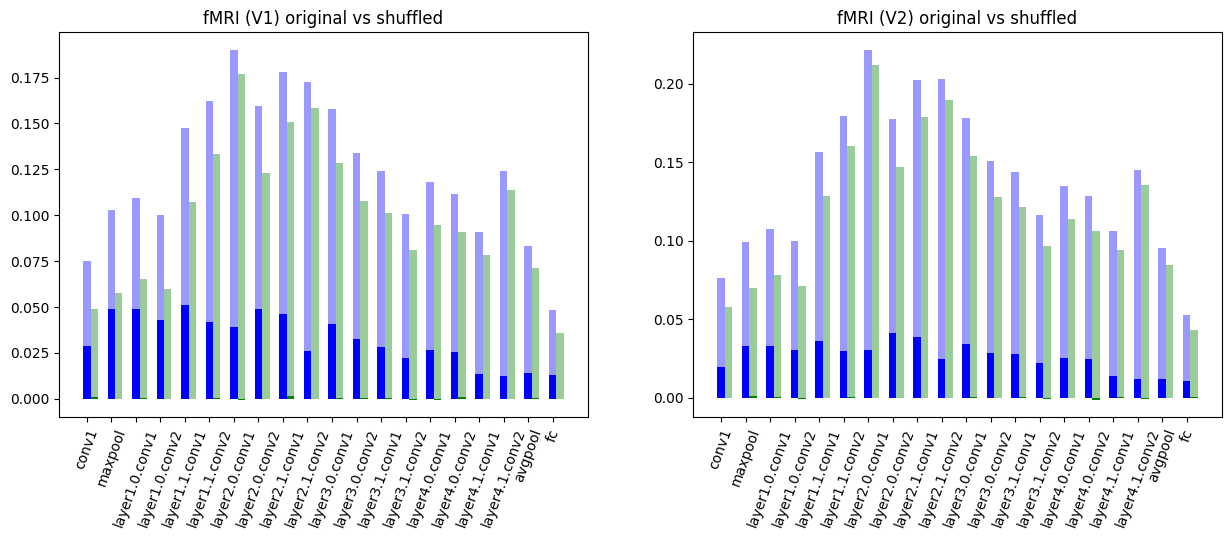

In [5]:
# V1
sub1_fMRI_V1_resnet_orig = np.load(data_dir / 'fMRI_results' / 'resnet18_sub01_V1_alignments_original_order.npy')
sub1_fMRI_V1_resnet_rand = np.load(data_dir / 'fMRI_results' / 'resnet18_sub01_V1_alignments_random_data.npy')
sub1_fMRI_V1_resnet_shuf = np.load(data_dir / 'fMRI_results' / 'resnet18_sub01_V1_alignments_shuffled_order.npy')

sub2_fMRI_V1_resnet_orig = np.load(data_dir / 'fMRI_results' / 'resnet18_sub02_V1_alignments_original_order.npy')
sub2_fMRI_V1_resnet_rand = np.load(data_dir / 'fMRI_results' / 'resnet18_sub02_V1_alignments_random_data.npy')
sub2_fMRI_V1_resnet_shuf = np.load(data_dir / 'fMRI_results' / 'resnet18_sub02_V1_alignments_shuffled_order.npy')

sub3_fMRI_V1_resnet_orig = np.load(data_dir / 'fMRI_results' / 'resnet18_sub03_V1_alignments_original_order.npy')
sub3_fMRI_V1_resnet_rand = np.load(data_dir / 'fMRI_results' / 'resnet18_sub03_V1_alignments_random_data.npy')
sub3_fMRI_V1_resnet_shuf = np.load(data_dir / 'fMRI_results' / 'resnet18_sub03_V1_alignments_shuffled_order.npy')

# V2
sub1_fMRI_V2_resnet_orig = np.load(data_dir / 'fMRI_results' / 'resnet18_sub01_V2_alignments_original_order.npy')
sub1_fMRI_V2_resnet_rand = np.load(data_dir / 'fMRI_results' / 'resnet18_sub01_V2_alignments_random_data.npy')
sub1_fMRI_V2_resnet_shuf = np.load(data_dir / 'fMRI_results' / 'resnet18_sub01_V2_alignments_shuffled_order.npy')

sub2_fMRI_V2_resnet_orig = np.load(data_dir / 'fMRI_results' / 'resnet18_sub02_V2_alignments_original_order.npy')
sub2_fMRI_V2_resnet_rand = np.load(data_dir / 'fMRI_results' / 'resnet18_sub02_V2_alignments_random_data.npy')
sub2_fMRI_V2_resnet_shuf = np.load(data_dir / 'fMRI_results' / 'resnet18_sub02_V2_alignments_shuffled_order.npy')

sub3_fMRI_V2_resnet_orig = np.load(data_dir / 'fMRI_results' / 'resnet18_sub03_V2_alignments_original_order.npy')
sub3_fMRI_V2_resnet_rand = np.load(data_dir / 'fMRI_results' / 'resnet18_sub03_V2_alignments_random_data.npy')
sub3_fMRI_V2_resnet_shuf = np.load(data_dir / 'fMRI_results' / 'resnet18_sub03_V2_alignments_shuffled_order.npy')

confidence = 0.95
n = 15

# V1 - CKA biased
cka_biased = 0 # selects correct index, ignore semantics
tmp = np.hstack([sub1_fMRI_V1_resnet_orig[0, cka_biased, :], sub2_fMRI_V1_resnet_orig[0, cka_biased, :], sub3_fMRI_V1_resnet_orig[0, cka_biased, :]])
fMRI_V1_CKA_biased_orig_m, fMRI_V1_CKA_biased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_V1_CKA_biased_orig_h = fMRI_V1_CKA_biased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

tmp = np.hstack([sub1_fMRI_V1_resnet_rand[:, cka_biased, :], sub2_fMRI_V1_resnet_rand[:, cka_biased, :], sub3_fMRI_V1_resnet_rand[:, cka_biased, :]])
fMRI_V1_CKA_biased_rand_m, fMRI_V1_CKA_biased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_V1_CKA_biased_rand_h = fMRI_V1_CKA_biased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

tmp = np.hstack([sub1_fMRI_V1_resnet_shuf[:, cka_biased, :], sub2_fMRI_V1_resnet_shuf[:, cka_biased, :], sub3_fMRI_V1_resnet_shuf[:, cka_biased, :]])
fMRI_V1_CKA_biased_shuf_m, fMRI_V1_CKA_biased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_V1_CKA_biased_shuf_h = fMRI_V1_CKA_biased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

# V1 - CKA debiased
cka_biased = 1 # selects correct index, ignore semantics
tmp = np.hstack([sub1_fMRI_V1_resnet_orig[0, cka_biased, :], sub2_fMRI_V1_resnet_orig[0, cka_biased, :], sub3_fMRI_V1_resnet_orig[0, cka_biased, :]])
fMRI_V1_CKA_debiased_orig_m, fMRI_V1_CKA_debiased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_V1_CKA_debiased_orig_h = fMRI_V1_CKA_debiased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

tmp = np.hstack([sub1_fMRI_V1_resnet_rand[:, cka_biased, :], sub2_fMRI_V1_resnet_rand[:, cka_biased, :], sub3_fMRI_V1_resnet_rand[:, cka_biased, :]])
fMRI_V1_CKA_debiased_rand_m, fMRI_V1_CKA_debiased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_V1_CKA_debiased_rand_h = fMRI_V1_CKA_debiased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

tmp = np.hstack([sub1_fMRI_V1_resnet_shuf[:, cka_biased, :], sub2_fMRI_V1_resnet_shuf[:, cka_biased, :], sub3_fMRI_V1_resnet_shuf[:, cka_biased, :]])
fMRI_V1_CKA_debiased_shuf_m, fMRI_V1_CKA_debiased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_V1_CKA_debiased_shuf_h = fMRI_V1_CKA_debiased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

# V2-  CKA biased
cka_biased = 0 # selects correct index, ignore semantics
tmp = np.hstack([sub1_fMRI_V2_resnet_orig[0, cka_biased, :], sub2_fMRI_V2_resnet_orig[0, cka_biased, :], sub3_fMRI_V2_resnet_orig[0, cka_biased, :]])
fMRI_V2_CKA_biased_orig_m, fMRI_V2_CKA_biased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_V2_CKA_biased_orig_h = fMRI_V2_CKA_biased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

tmp = np.hstack([sub1_fMRI_V2_resnet_rand[:, cka_biased, :], sub2_fMRI_V2_resnet_rand[:, cka_biased, :], sub3_fMRI_V2_resnet_rand[:, cka_biased, :]])
fMRI_V2_CKA_biased_rand_m, fMRI_V2_CKA_biased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_V2_CKA_biased_rand_h = fMRI_V2_CKA_biased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

tmp = np.hstack([sub1_fMRI_V2_resnet_shuf[:, cka_biased, :], sub2_fMRI_V2_resnet_shuf[:, cka_biased, :], sub3_fMRI_V2_resnet_shuf[:, cka_biased, :]])
fMRI_V2_CKA_biased_shuf_m, fMRI_V2_CKA_biased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_V2_CKA_biased_shuf_h = fMRI_V2_CKA_biased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

# V2 - CKA debiased
cka_biased = 1 # selects correct index, ignore semantics
tmp = np.hstack([sub1_fMRI_V2_resnet_orig[0, cka_biased, :], sub2_fMRI_V2_resnet_orig[0, cka_biased, :], sub3_fMRI_V2_resnet_orig[0, cka_biased, :]])
fMRI_V2_CKA_debiased_orig_m, fMRI_V2_CKA_debiased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_V2_CKA_debiased_orig_h = fMRI_V2_CKA_debiased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

tmp = np.hstack([sub1_fMRI_V2_resnet_rand[:, cka_biased, :], sub2_fMRI_V2_resnet_rand[:, cka_biased, :], sub3_fMRI_V2_resnet_rand[:, cka_biased, :]])
fMRI_V2_CKA_debiased_rand_m, fMRI_V2_CKA_debiased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_V2_CKA_debiased_rand_h = fMRI_V2_CKA_debiased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

tmp = np.hstack([sub1_fMRI_V2_resnet_shuf[:, cka_biased, :], sub2_fMRI_V2_resnet_shuf[:, cka_biased, :], sub3_fMRI_V2_resnet_shuf[:, cka_biased, :]])
fMRI_V2_CKA_debiased_shuf_m, fMRI_V2_CKA_debiased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_V2_CKA_debiased_shuf_h = fMRI_V2_CKA_debiased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1) 


fig, axes = plt.subplots(1,2, figsize=(15,5))
axes = np.ravel(axes)

x_idx = list(range(len(layer_names_resnet18)))
width = 0.3
alpha_biased = 0.4
alpha_debiased = 1.0
errorbar_alpha = 0.4
offset = 0.3

for i, layer_name in enumerate(layer_names_resnet18):

    resnet_idx = i

    # V2-  CKA biased
    cka_biased = 0 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_V1_resnet_orig[0, cka_biased, resnet_idx], sub2_fMRI_V1_resnet_orig[0, cka_biased, resnet_idx], sub3_fMRI_V1_resnet_orig[0, cka_biased, resnet_idx]])
    fMRI_V1_CKA_biased_orig_m, fMRI_V1_CKA_biased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V1_CKA_biased_orig_h = fMRI_V1_CKA_biased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_V1_resnet_rand[:, cka_biased, resnet_idx], sub2_fMRI_V1_resnet_rand[:, cka_biased, resnet_idx], sub3_fMRI_V1_resnet_rand[:, cka_biased, resnet_idx]])
    fMRI_V1_CKA_biased_rand_m, fMRI_V1_CKA_biased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V1_CKA_biased_rand_h = fMRI_V1_CKA_biased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_V1_resnet_shuf[:, cka_biased, resnet_idx], sub2_fMRI_V1_resnet_shuf[:, cka_biased, resnet_idx], sub3_fMRI_V1_resnet_shuf[:, cka_biased, resnet_idx]])
    fMRI_V1_CKA_biased_shuf_m, fMRI_V1_CKA_biased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V1_CKA_biased_shuf_h = fMRI_V1_CKA_biased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    # V2 - CKA debiased
    cka_biased = 1 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_V1_resnet_orig[0, cka_biased, resnet_idx], sub2_fMRI_V1_resnet_orig[0, cka_biased, resnet_idx], sub3_fMRI_V1_resnet_orig[0, cka_biased, resnet_idx]])
    fMRI_V1_CKA_debiased_orig_m, fMRI_V1_CKA_debiased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V1_CKA_debiased_orig_h = fMRI_V1_CKA_debiased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_V1_resnet_rand[:, cka_biased, resnet_idx], sub2_fMRI_V1_resnet_rand[:, cka_biased, resnet_idx], sub3_fMRI_V1_resnet_rand[:, cka_biased, resnet_idx]])
    fMRI_V1_CKA_debiased_rand_m, fMRI_V1_CKA_debiased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V1_CKA_debiased_rand_h = fMRI_V1_CKA_debiased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_V1_resnet_shuf[:, cka_biased, resnet_idx], sub2_fMRI_V1_resnet_shuf[:, cka_biased, resnet_idx], sub3_fMRI_V1_resnet_shuf[:, cka_biased, resnet_idx]])
    fMRI_V1_CKA_debiased_shuf_m, fMRI_V1_CKA_debiased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V1_CKA_debiased_shuf_h = fMRI_V1_CKA_debiased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1) 

    #axes[0].bar(x_idx[i]-.2, fMRI_V2_CKA_biased_rand_m, color='red', width=width, alpha=alpha_biased)
    axes[0].bar(x_idx[i],    fMRI_V1_CKA_biased_orig_m, color='blue', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i], fMRI_V2_CKA_biased_orig_m, yerr=fMRI_V2_CKA_biased_orig_h, color='blue', alpha=errorbar_alpha)

    axes[0].bar(x_idx[i]+offset, fMRI_V1_CKA_biased_shuf_m, color='green', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i]+offset, fMRI_V2_CKA_biased_shuf_m, yerr=fMRI_V2_CKA_biased_orig_h, color='green', alpha=errorbar_alpha)

    #axes[0].bar(x_idx[i]-.2, fMRI_V2_CKA_debiased_rand_m, color='red', width=width, alpha=alpha_debiased)
    axes[0].bar(x_idx[i],    fMRI_V1_CKA_debiased_orig_m, color='blue', width=width, alpha=alpha_debiased)
    #axes[0].errorbar(x_idx[i], fMRI_V2_CKA_debiased_orig_m, yerr=fMRI_V2_CKA_debiased_orig_h, color='blue', alpha=errorbar_alpha)

    axes[0].bar(x_idx[i]+offset, fMRI_V1_CKA_debiased_shuf_m, color='green', width=width, alpha=alpha_debiased)

axes[0].set_title('fMRI (V1) original vs shuffled')
axes[0].set_xticks(x_idx, layer_names_resnet18, rotation=70);


for i, layer_name in enumerate(layer_names_resnet18):

    resnet_idx = i

    # V2-  CKA biased
    cka_biased = 0 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_V2_resnet_orig[0, cka_biased, resnet_idx], sub2_fMRI_V2_resnet_orig[0, cka_biased, resnet_idx], sub3_fMRI_V2_resnet_orig[0, cka_biased, resnet_idx]])
    fMRI_V2_CKA_biased_orig_m, fMRI_V2_CKA_biased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V2_CKA_biased_orig_h = fMRI_V2_CKA_biased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_V2_resnet_rand[:, cka_biased, resnet_idx], sub2_fMRI_V2_resnet_rand[:, cka_biased, resnet_idx], sub3_fMRI_V2_resnet_rand[:, cka_biased, resnet_idx]])
    fMRI_V2_CKA_biased_rand_m, fMRI_V2_CKA_biased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V2_CKA_biased_rand_h = fMRI_V2_CKA_biased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_V2_resnet_shuf[:, cka_biased, resnet_idx], sub2_fMRI_V2_resnet_shuf[:, cka_biased, resnet_idx], sub3_fMRI_V2_resnet_shuf[:, cka_biased, resnet_idx]])
    fMRI_V2_CKA_biased_shuf_m, fMRI_V2_CKA_biased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V2_CKA_biased_shuf_h = fMRI_V2_CKA_biased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    # V2 - CKA debiased
    cka_biased = 1 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_V2_resnet_orig[0, cka_biased, resnet_idx], sub2_fMRI_V2_resnet_orig[0, cka_biased, resnet_idx], sub3_fMRI_V2_resnet_orig[0, cka_biased, resnet_idx]])
    fMRI_V2_CKA_debiased_orig_m, fMRI_V2_CKA_debiased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V2_CKA_debiased_orig_h = fMRI_V2_CKA_debiased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_V2_resnet_rand[:, cka_biased, resnet_idx], sub2_fMRI_V2_resnet_rand[:, cka_biased, resnet_idx], sub3_fMRI_V2_resnet_rand[:, cka_biased, resnet_idx]])
    fMRI_V2_CKA_debiased_rand_m, fMRI_V2_CKA_debiased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V2_CKA_debiased_rand_h = fMRI_V2_CKA_debiased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_V2_resnet_shuf[:, cka_biased, resnet_idx], sub2_fMRI_V2_resnet_shuf[:, cka_biased, resnet_idx], sub3_fMRI_V2_resnet_shuf[:, cka_biased, resnet_idx]])
    fMRI_V2_CKA_debiased_shuf_m, fMRI_V2_CKA_debiased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V2_CKA_debiased_shuf_h = fMRI_V2_CKA_debiased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1) 

    #axes[0].bar(x_idx[i]-.2, fMRI_V2_CKA_biased_rand_m, color='red', width=width, alpha=alpha_biased)
    axes[1].bar(x_idx[i],    fMRI_V2_CKA_biased_orig_m, color='blue', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i], fMRI_V2_CKA_biased_orig_m, yerr=fMRI_V2_CKA_biased_orig_h, color='blue', alpha=errorbar_alpha)

    axes[1].bar(x_idx[i]+offset, fMRI_V2_CKA_biased_shuf_m, color='green', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i]+offset, fMRI_V2_CKA_biased_shuf_m, yerr=fMRI_V2_CKA_biased_orig_h, color='green', alpha=errorbar_alpha)

    #axes[0].bar(x_idx[i]-.2, fMRI_V2_CKA_debiased_rand_m, color='red', width=width, alpha=alpha_debiased)
    axes[1].bar(x_idx[i],    fMRI_V2_CKA_debiased_orig_m, color='blue', width=width, alpha=alpha_debiased)
    #axes[0].errorbar(x_idx[i], fMRI_V2_CKA_debiased_orig_m, yerr=fMRI_V2_CKA_debiased_orig_h, color='blue', alpha=errorbar_alpha)

    axes[1].bar(x_idx[i]+offset, fMRI_V2_CKA_debiased_shuf_m, color='green', width=width, alpha=alpha_debiased)

axes[1].set_title('fMRI (V2) original vs shuffled')
axes[1].set_xticks(x_idx, layer_names_resnet18, rotation=70);

    # first calculation is conv1 layer of ResNet18, V2, random, CKA biased and debiased

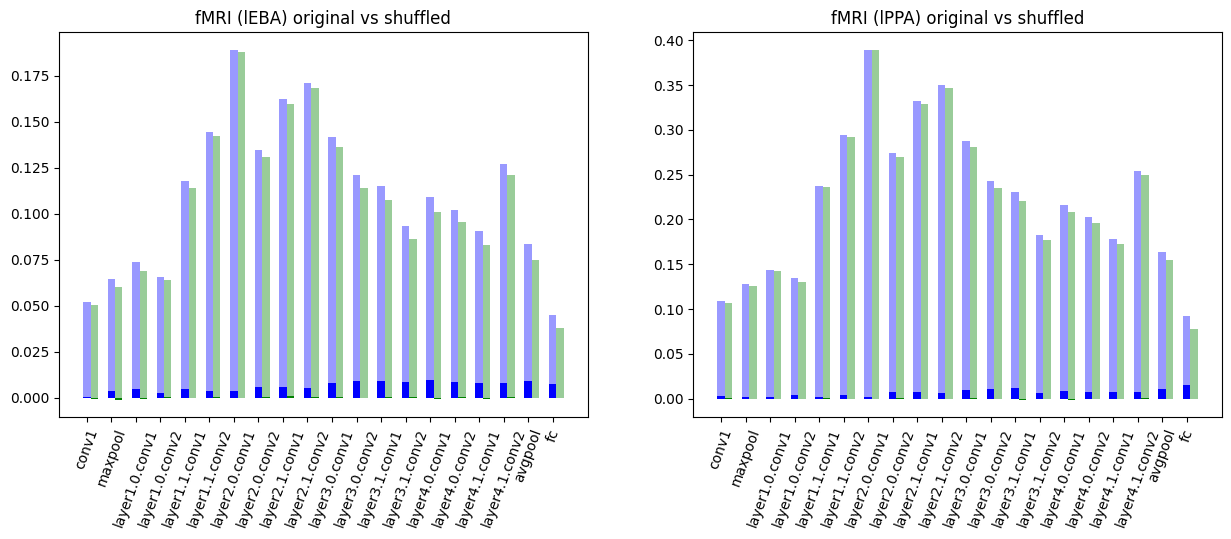

In [6]:
# lEBA
sub1_fMRI_lEBA_resnet_orig = np.load(data_dir / 'fMRI_results' / 'resnet18_sub01_lEBA_alignments_original_order.npy')
sub1_fMRI_lEBA_resnet_rand = np.load(data_dir / 'fMRI_results' / 'resnet18_sub01_lEBA_alignments_random_data.npy')
sub1_fMRI_lEBA_resnet_shuf = np.load(data_dir / 'fMRI_results' / 'resnet18_sub01_lEBA_alignments_shuffled_order.npy')

sub2_fMRI_lEBA_resnet_orig = np.load(data_dir / 'fMRI_results' / 'resnet18_sub02_lEBA_alignments_original_order.npy')
sub2_fMRI_lEBA_resnet_rand = np.load(data_dir / 'fMRI_results' / 'resnet18_sub02_lEBA_alignments_random_data.npy')
sub2_fMRI_lEBA_resnet_shuf = np.load(data_dir / 'fMRI_results' / 'resnet18_sub02_lEBA_alignments_shuffled_order.npy')

sub3_fMRI_lEBA_resnet_orig = np.load(data_dir / 'fMRI_results' / 'resnet18_sub03_lEBA_alignments_original_order.npy')
sub3_fMRI_lEBA_resnet_rand = np.load(data_dir / 'fMRI_results' / 'resnet18_sub03_lEBA_alignments_random_data.npy')
sub3_fMRI_lEBA_resnet_shuf = np.load(data_dir / 'fMRI_results' / 'resnet18_sub03_lEBA_alignments_shuffled_order.npy')

# lPPA
sub1_fMRI_lPPA_resnet_orig = np.load(data_dir / 'fMRI_results' / 'resnet18_sub01_lPPA_alignments_original_order.npy')
sub1_fMRI_lPPA_resnet_rand = np.load(data_dir / 'fMRI_results' / 'resnet18_sub01_lPPA_alignments_random_data.npy')
sub1_fMRI_lPPA_resnet_shuf = np.load(data_dir / 'fMRI_results' / 'resnet18_sub01_lPPA_alignments_shuffled_order.npy')

sub2_fMRI_lPPA_resnet_orig = np.load(data_dir / 'fMRI_results' / 'resnet18_sub02_lPPA_alignments_original_order.npy')
sub2_fMRI_lPPA_resnet_rand = np.load(data_dir / 'fMRI_results' / 'resnet18_sub02_lPPA_alignments_random_data.npy')
sub2_fMRI_lPPA_resnet_shuf = np.load(data_dir / 'fMRI_results' / 'resnet18_sub02_lPPA_alignments_shuffled_order.npy')

sub3_fMRI_lPPA_resnet_orig = np.load(data_dir / 'fMRI_results' / 'resnet18_sub03_lPPA_alignments_original_order.npy')
sub3_fMRI_lPPA_resnet_rand = np.load(data_dir / 'fMRI_results' / 'resnet18_sub03_lPPA_alignments_random_data.npy')
sub3_fMRI_lPPA_resnet_shuf = np.load(data_dir / 'fMRI_results' / 'resnet18_sub03_lPPA_alignments_shuffled_order.npy')

confidence = 0.95
n = 15

# lEBA - CKA biased
cka_biased = 0 # selects correct index, ignore semantics
tmp = np.hstack([sub1_fMRI_lEBA_resnet_orig[0, cka_biased, :], sub2_fMRI_lEBA_resnet_orig[0, cka_biased, :], sub3_fMRI_lEBA_resnet_orig[0, cka_biased, :]])
fMRI_lEBA_CKA_biased_orig_m, fMRI_lEBA_CKA_biased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_lEBA_CKA_biased_orig_h = fMRI_lEBA_CKA_biased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

tmp = np.hstack([sub1_fMRI_lEBA_resnet_rand[:, cka_biased, :], sub2_fMRI_lEBA_resnet_rand[:, cka_biased, :], sub3_fMRI_lEBA_resnet_rand[:, cka_biased, :]])
fMRI_lEBA_CKA_biased_rand_m, fMRI_lEBA_CKA_biased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_lEBA_CKA_biased_rand_h = fMRI_lEBA_CKA_biased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

tmp = np.hstack([sub1_fMRI_lEBA_resnet_shuf[:, cka_biased, :], sub2_fMRI_lEBA_resnet_shuf[:, cka_biased, :], sub3_fMRI_lEBA_resnet_shuf[:, cka_biased, :]])
fMRI_lEBA_CKA_biased_shuf_m, fMRI_lEBA_CKA_biased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_lEBA_CKA_biased_shuf_h = fMRI_lEBA_CKA_biased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

# lEBA - CKA debiased
cka_biased = 1 # selects correct index, ignore semantics
tmp = np.hstack([sub1_fMRI_lEBA_resnet_orig[0, cka_biased, :], sub2_fMRI_lEBA_resnet_orig[0, cka_biased, :], sub3_fMRI_lEBA_resnet_orig[0, cka_biased, :]])
fMRI_lEBA_CKA_debiased_orig_m, fMRI_lEBA_CKA_debiased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_lEBA_CKA_debiased_orig_h = fMRI_lEBA_CKA_debiased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

tmp = np.hstack([sub1_fMRI_lEBA_resnet_rand[:, cka_biased, :], sub2_fMRI_lEBA_resnet_rand[:, cka_biased, :], sub3_fMRI_lEBA_resnet_rand[:, cka_biased, :]])
fMRI_lEBA_CKA_debiased_rand_m, fMRI_lEBA_CKA_debiased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_lEBA_CKA_debiased_rand_h = fMRI_lEBA_CKA_debiased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

tmp = np.hstack([sub1_fMRI_lEBA_resnet_shuf[:, cka_biased, :], sub2_fMRI_lEBA_resnet_shuf[:, cka_biased, :], sub3_fMRI_lEBA_resnet_shuf[:, cka_biased, :]])
fMRI_lEBA_CKA_debiased_shuf_m, fMRI_lEBA_CKA_debiased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_lEBA_CKA_debiased_shuf_h = fMRI_lEBA_CKA_debiased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

# lPPA-  CKA biased
cka_biased = 0 # selects correct index, ignore semantics
tmp = np.hstack([sub1_fMRI_lPPA_resnet_orig[0, cka_biased, :], sub2_fMRI_lPPA_resnet_orig[0, cka_biased, :], sub3_fMRI_lPPA_resnet_orig[0, cka_biased, :]])
fMRI_lPPA_CKA_biased_orig_m, fMRI_lPPA_CKA_biased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_lPPA_CKA_biased_orig_h = fMRI_lPPA_CKA_biased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

tmp = np.hstack([sub1_fMRI_lPPA_resnet_rand[:, cka_biased, :], sub2_fMRI_lPPA_resnet_rand[:, cka_biased, :], sub3_fMRI_lPPA_resnet_rand[:, cka_biased, :]])
fMRI_lPPA_CKA_biased_rand_m, fMRI_lPPA_CKA_biased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_lPPA_CKA_biased_rand_h = fMRI_lPPA_CKA_biased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

tmp = np.hstack([sub1_fMRI_lPPA_resnet_shuf[:, cka_biased, :], sub2_fMRI_lPPA_resnet_shuf[:, cka_biased, :], sub3_fMRI_lPPA_resnet_shuf[:, cka_biased, :]])
fMRI_lPPA_CKA_biased_shuf_m, fMRI_lPPA_CKA_biased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_lPPA_CKA_biased_shuf_h = fMRI_lPPA_CKA_biased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

# lPPA - CKA debiased
cka_biased = 1 # selects correct index, ignore semantics
tmp = np.hstack([sub1_fMRI_lPPA_resnet_orig[0, cka_biased, :], sub2_fMRI_lPPA_resnet_orig[0, cka_biased, :], sub3_fMRI_lPPA_resnet_orig[0, cka_biased, :]])
fMRI_lPPA_CKA_debiased_orig_m, fMRI_lPPA_CKA_debiased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_lPPA_CKA_debiased_orig_h = fMRI_lPPA_CKA_debiased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

tmp = np.hstack([sub1_fMRI_lPPA_resnet_rand[:, cka_biased, :], sub2_fMRI_lPPA_resnet_rand[:, cka_biased, :], sub3_fMRI_lPPA_resnet_rand[:, cka_biased, :]])
fMRI_lPPA_CKA_debiased_rand_m, fMRI_lPPA_CKA_debiased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_lPPA_CKA_debiased_rand_h = fMRI_lPPA_CKA_debiased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

tmp = np.hstack([sub1_fMRI_lPPA_resnet_shuf[:, cka_biased, :], sub2_fMRI_lPPA_resnet_shuf[:, cka_biased, :], sub3_fMRI_lPPA_resnet_shuf[:, cka_biased, :]])
fMRI_lPPA_CKA_debiased_shuf_m, fMRI_lPPA_CKA_debiased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_lPPA_CKA_debiased_shuf_h = fMRI_lPPA_CKA_debiased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1) 


fig, axes = plt.subplots(1,2, figsize=(15,5))
axes = np.ravel(axes)

x_idx = list(range(len(layer_names_resnet18)))
width = 0.3
alpha_biased = 0.4
alpha_debiased = 1.0
errorbar_alpha = 0.4
offset = 0.3

for i, layer_name in enumerate(layer_names_resnet18):

    resnet_idx = i

    # lPPA-  CKA biased
    cka_biased = 0 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_lEBA_resnet_orig[0, cka_biased, resnet_idx], sub2_fMRI_lEBA_resnet_orig[0, cka_biased, resnet_idx], sub3_fMRI_lEBA_resnet_orig[0, cka_biased, resnet_idx]])
    fMRI_lEBA_CKA_biased_orig_m, fMRI_lEBA_CKA_biased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lEBA_CKA_biased_orig_h = fMRI_lEBA_CKA_biased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_lEBA_resnet_rand[:, cka_biased, resnet_idx], sub2_fMRI_lEBA_resnet_rand[:, cka_biased, resnet_idx], sub3_fMRI_lEBA_resnet_rand[:, cka_biased, resnet_idx]])
    fMRI_lEBA_CKA_biased_rand_m, fMRI_lEBA_CKA_biased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lEBA_CKA_biased_rand_h = fMRI_lEBA_CKA_biased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_lEBA_resnet_shuf[:, cka_biased, resnet_idx], sub2_fMRI_lEBA_resnet_shuf[:, cka_biased, resnet_idx], sub3_fMRI_lEBA_resnet_shuf[:, cka_biased, resnet_idx]])
    fMRI_lEBA_CKA_biased_shuf_m, fMRI_lEBA_CKA_biased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lEBA_CKA_biased_shuf_h = fMRI_lEBA_CKA_biased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    # lPPA - CKA debiased
    cka_biased = 1 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_lEBA_resnet_orig[0, cka_biased, resnet_idx], sub2_fMRI_lEBA_resnet_orig[0, cka_biased, resnet_idx], sub3_fMRI_lEBA_resnet_orig[0, cka_biased, resnet_idx]])
    fMRI_lEBA_CKA_debiased_orig_m, fMRI_lEBA_CKA_debiased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lEBA_CKA_debiased_orig_h = fMRI_lEBA_CKA_debiased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_lEBA_resnet_rand[:, cka_biased, resnet_idx], sub2_fMRI_lEBA_resnet_rand[:, cka_biased, resnet_idx], sub3_fMRI_lEBA_resnet_rand[:, cka_biased, resnet_idx]])
    fMRI_lEBA_CKA_debiased_rand_m, fMRI_lEBA_CKA_debiased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lEBA_CKA_debiased_rand_h = fMRI_lEBA_CKA_debiased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_lEBA_resnet_shuf[:, cka_biased, resnet_idx], sub2_fMRI_lEBA_resnet_shuf[:, cka_biased, resnet_idx], sub3_fMRI_lEBA_resnet_shuf[:, cka_biased, resnet_idx]])
    fMRI_lEBA_CKA_debiased_shuf_m, fMRI_lEBA_CKA_debiased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lEBA_CKA_debiased_shuf_h = fMRI_lEBA_CKA_debiased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1) 

    #axes[0].bar(x_idx[i]-.2, fMRI_lPPA_CKA_biased_rand_m, color='red', width=width, alpha=alpha_biased)
    axes[0].bar(x_idx[i],    fMRI_lEBA_CKA_biased_orig_m, color='blue', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i], fMRI_lPPA_CKA_biased_orig_m, yerr=fMRI_lPPA_CKA_biased_orig_h, color='blue', alpha=errorbar_alpha)

    axes[0].bar(x_idx[i]+offset, fMRI_lEBA_CKA_biased_shuf_m, color='green', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i]+offset, fMRI_lPPA_CKA_biased_shuf_m, yerr=fMRI_lPPA_CKA_biased_orig_h, color='green', alpha=errorbar_alpha)

    #axes[0].bar(x_idx[i]-.2, fMRI_lPPA_CKA_debiased_rand_m, color='red', width=width, alpha=alpha_debiased)
    axes[0].bar(x_idx[i],    fMRI_lEBA_CKA_debiased_orig_m, color='blue', width=width, alpha=alpha_debiased)
    #axes[0].errorbar(x_idx[i], fMRI_lPPA_CKA_debiased_orig_m, yerr=fMRI_lPPA_CKA_debiased_orig_h, color='blue', alpha=errorbar_alpha)

    axes[0].bar(x_idx[i]+offset, fMRI_lEBA_CKA_debiased_shuf_m, color='green', width=width, alpha=alpha_debiased)

axes[0].set_title('fMRI (lEBA) original vs shuffled')
axes[0].set_xticks(x_idx, layer_names_resnet18, rotation=70);


for i, layer_name in enumerate(layer_names_resnet18):

    resnet_idx = i

    # lPPA-  CKA biased
    cka_biased = 0 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_lPPA_resnet_orig[0, cka_biased, resnet_idx], sub2_fMRI_lPPA_resnet_orig[0, cka_biased, resnet_idx], sub3_fMRI_lPPA_resnet_orig[0, cka_biased, resnet_idx]])
    fMRI_lPPA_CKA_biased_orig_m, fMRI_lPPA_CKA_biased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lPPA_CKA_biased_orig_h = fMRI_lPPA_CKA_biased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_lPPA_resnet_rand[:, cka_biased, resnet_idx], sub2_fMRI_lPPA_resnet_rand[:, cka_biased, resnet_idx], sub3_fMRI_lPPA_resnet_rand[:, cka_biased, resnet_idx]])
    fMRI_lPPA_CKA_biased_rand_m, fMRI_lPPA_CKA_biased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lPPA_CKA_biased_rand_h = fMRI_lPPA_CKA_biased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_lPPA_resnet_shuf[:, cka_biased, resnet_idx], sub2_fMRI_lPPA_resnet_shuf[:, cka_biased, resnet_idx], sub3_fMRI_lPPA_resnet_shuf[:, cka_biased, resnet_idx]])
    fMRI_lPPA_CKA_biased_shuf_m, fMRI_lPPA_CKA_biased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lPPA_CKA_biased_shuf_h = fMRI_lPPA_CKA_biased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    # lPPA - CKA debiased
    cka_biased = 1 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_lPPA_resnet_orig[0, cka_biased, resnet_idx], sub2_fMRI_lPPA_resnet_orig[0, cka_biased, resnet_idx], sub3_fMRI_lPPA_resnet_orig[0, cka_biased, resnet_idx]])
    fMRI_lPPA_CKA_debiased_orig_m, fMRI_lPPA_CKA_debiased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lPPA_CKA_debiased_orig_h = fMRI_lPPA_CKA_debiased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_lPPA_resnet_rand[:, cka_biased, resnet_idx], sub2_fMRI_lPPA_resnet_rand[:, cka_biased, resnet_idx], sub3_fMRI_lPPA_resnet_rand[:, cka_biased, resnet_idx]])
    fMRI_lPPA_CKA_debiased_rand_m, fMRI_lPPA_CKA_debiased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lPPA_CKA_debiased_rand_h = fMRI_lPPA_CKA_debiased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_lPPA_resnet_shuf[:, cka_biased, resnet_idx], sub2_fMRI_lPPA_resnet_shuf[:, cka_biased, resnet_idx], sub3_fMRI_lPPA_resnet_shuf[:, cka_biased, resnet_idx]])
    fMRI_lPPA_CKA_debiased_shuf_m, fMRI_lPPA_CKA_debiased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lPPA_CKA_debiased_shuf_h = fMRI_lPPA_CKA_debiased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1) 

    #axes[0].bar(x_idx[i]-.2, fMRI_lPPA_CKA_biased_rand_m, color='red', width=width, alpha=alpha_biased)
    axes[1].bar(x_idx[i],    fMRI_lPPA_CKA_biased_orig_m, color='blue', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i], fMRI_lPPA_CKA_biased_orig_m, yerr=fMRI_lPPA_CKA_biased_orig_h, color='blue', alpha=errorbar_alpha)

    axes[1].bar(x_idx[i]+offset, fMRI_lPPA_CKA_biased_shuf_m, color='green', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i]+offset, fMRI_lPPA_CKA_biased_shuf_m, yerr=fMRI_lPPA_CKA_biased_orig_h, color='green', alpha=errorbar_alpha)

    #axes[0].bar(x_idx[i]-.2, fMRI_lPPA_CKA_debiased_rand_m, color='red', width=width, alpha=alpha_debiased)
    axes[1].bar(x_idx[i],    fMRI_lPPA_CKA_debiased_orig_m, color='blue', width=width, alpha=alpha_debiased)
    #axes[0].errorbar(x_idx[i], fMRI_lPPA_CKA_debiased_orig_m, yerr=fMRI_lPPA_CKA_debiased_orig_h, color='blue', alpha=errorbar_alpha)

    axes[1].bar(x_idx[i]+offset, fMRI_lPPA_CKA_debiased_shuf_m, color='green', width=width, alpha=alpha_debiased)

axes[1].set_title('fMRI (lPPA) original vs shuffled')
axes[1].set_xticks(x_idx, layer_names_resnet18, rotation=70);

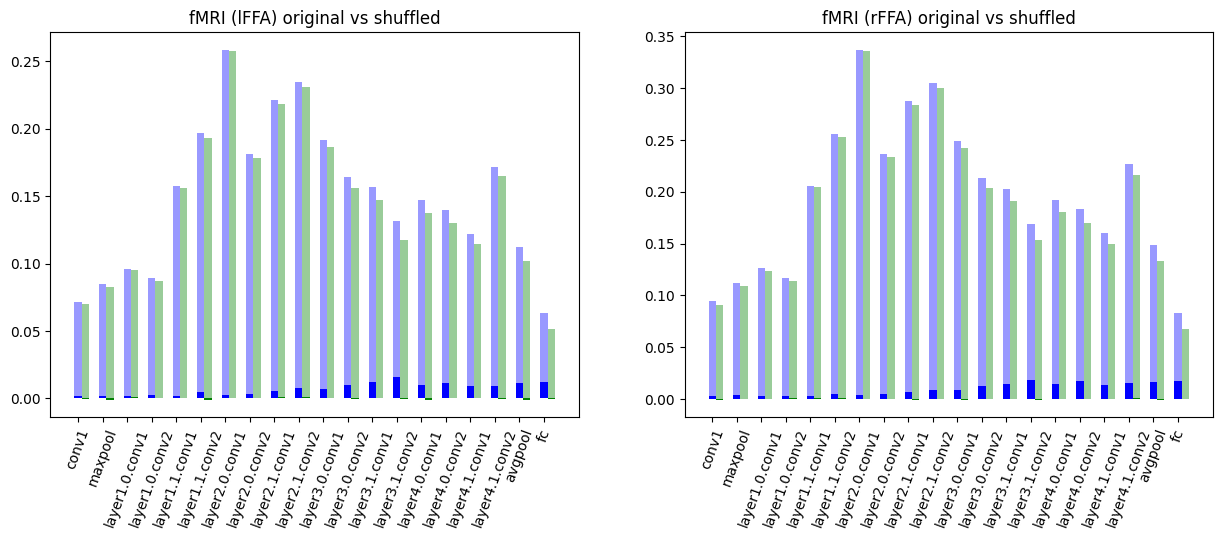

In [7]:
# lFFA
sub1_fMRI_lFFA_resnet_orig = np.load(data_dir / 'fMRI_results' / 'resnet18_sub01_lFFA_alignments_original_order.npy')
sub1_fMRI_lFFA_resnet_rand = np.load(data_dir / 'fMRI_results' / 'resnet18_sub01_lFFA_alignments_random_data.npy')
sub1_fMRI_lFFA_resnet_shuf = np.load(data_dir / 'fMRI_results' / 'resnet18_sub01_lFFA_alignments_shuffled_order.npy')

sub2_fMRI_lFFA_resnet_orig = np.load(data_dir / 'fMRI_results' / 'resnet18_sub02_lFFA_alignments_original_order.npy')
sub2_fMRI_lFFA_resnet_rand = np.load(data_dir / 'fMRI_results' / 'resnet18_sub02_lFFA_alignments_random_data.npy')
sub2_fMRI_lFFA_resnet_shuf = np.load(data_dir / 'fMRI_results' / 'resnet18_sub02_lFFA_alignments_shuffled_order.npy')

sub3_fMRI_lFFA_resnet_orig = np.load(data_dir / 'fMRI_results' / 'resnet18_sub03_lFFA_alignments_original_order.npy')
sub3_fMRI_lFFA_resnet_rand = np.load(data_dir / 'fMRI_results' / 'resnet18_sub03_lFFA_alignments_random_data.npy')
sub3_fMRI_lFFA_resnet_shuf = np.load(data_dir / 'fMRI_results' / 'resnet18_sub03_lFFA_alignments_shuffled_order.npy')

# rFFA
sub1_fMRI_rFFA_resnet_orig = np.load(data_dir / 'fMRI_results' / 'resnet18_sub01_rFFA_alignments_original_order.npy')
sub1_fMRI_rFFA_resnet_rand = np.load(data_dir / 'fMRI_results' / 'resnet18_sub01_rFFA_alignments_random_data.npy')
sub1_fMRI_rFFA_resnet_shuf = np.load(data_dir / 'fMRI_results' / 'resnet18_sub01_rFFA_alignments_shuffled_order.npy')

sub2_fMRI_rFFA_resnet_orig = np.load(data_dir / 'fMRI_results' / 'resnet18_sub02_rFFA_alignments_original_order.npy')
sub2_fMRI_rFFA_resnet_rand = np.load(data_dir / 'fMRI_results' / 'resnet18_sub02_rFFA_alignments_random_data.npy')
sub2_fMRI_rFFA_resnet_shuf = np.load(data_dir / 'fMRI_results' / 'resnet18_sub02_rFFA_alignments_shuffled_order.npy')

sub3_fMRI_rFFA_resnet_orig = np.load(data_dir / 'fMRI_results' / 'resnet18_sub03_rFFA_alignments_original_order.npy')
sub3_fMRI_rFFA_resnet_rand = np.load(data_dir / 'fMRI_results' / 'resnet18_sub03_rFFA_alignments_random_data.npy')
sub3_fMRI_rFFA_resnet_shuf = np.load(data_dir / 'fMRI_results' / 'resnet18_sub03_rFFA_alignments_shuffled_order.npy')

confidence = 0.95
n = 15

# lFFA - CKA biased
cka_biased = 0 # selects correct index, ignore semantics
tmp = np.hstack([sub1_fMRI_lFFA_resnet_orig[0, cka_biased, :], sub2_fMRI_lFFA_resnet_orig[0, cka_biased, :], sub3_fMRI_lFFA_resnet_orig[0, cka_biased, :]])
fMRI_lFFA_CKA_biased_orig_m, fMRI_lFFA_CKA_biased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_lFFA_CKA_biased_orig_h = fMRI_lFFA_CKA_biased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

tmp = np.hstack([sub1_fMRI_lFFA_resnet_rand[:, cka_biased, :], sub2_fMRI_lFFA_resnet_rand[:, cka_biased, :], sub3_fMRI_lFFA_resnet_rand[:, cka_biased, :]])
fMRI_lFFA_CKA_biased_rand_m, fMRI_lFFA_CKA_biased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_lFFA_CKA_biased_rand_h = fMRI_lFFA_CKA_biased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

tmp = np.hstack([sub1_fMRI_lFFA_resnet_shuf[:, cka_biased, :], sub2_fMRI_lFFA_resnet_shuf[:, cka_biased, :], sub3_fMRI_lFFA_resnet_shuf[:, cka_biased, :]])
fMRI_lFFA_CKA_biased_shuf_m, fMRI_lFFA_CKA_biased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_lFFA_CKA_biased_shuf_h = fMRI_lFFA_CKA_biased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

# lFFA - CKA debiased
cka_biased = 1 # selects correct index, ignore semantics
tmp = np.hstack([sub1_fMRI_lFFA_resnet_orig[0, cka_biased, :], sub2_fMRI_lFFA_resnet_orig[0, cka_biased, :], sub3_fMRI_lFFA_resnet_orig[0, cka_biased, :]])
fMRI_lFFA_CKA_debiased_orig_m, fMRI_lFFA_CKA_debiased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_lFFA_CKA_debiased_orig_h = fMRI_lFFA_CKA_debiased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

tmp = np.hstack([sub1_fMRI_lFFA_resnet_rand[:, cka_biased, :], sub2_fMRI_lFFA_resnet_rand[:, cka_biased, :], sub3_fMRI_lFFA_resnet_rand[:, cka_biased, :]])
fMRI_lFFA_CKA_debiased_rand_m, fMRI_lFFA_CKA_debiased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_lFFA_CKA_debiased_rand_h = fMRI_lFFA_CKA_debiased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

tmp = np.hstack([sub1_fMRI_lFFA_resnet_shuf[:, cka_biased, :], sub2_fMRI_lFFA_resnet_shuf[:, cka_biased, :], sub3_fMRI_lFFA_resnet_shuf[:, cka_biased, :]])
fMRI_lFFA_CKA_debiased_shuf_m, fMRI_lFFA_CKA_debiased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_lFFA_CKA_debiased_shuf_h = fMRI_lFFA_CKA_debiased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

# rFFA-  CKA biased
cka_biased = 0 # selects correct index, ignore semantics
tmp = np.hstack([sub1_fMRI_rFFA_resnet_orig[0, cka_biased, :], sub2_fMRI_rFFA_resnet_orig[0, cka_biased, :], sub3_fMRI_rFFA_resnet_orig[0, cka_biased, :]])
fMRI_rFFA_CKA_biased_orig_m, fMRI_rFFA_CKA_biased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_rFFA_CKA_biased_orig_h = fMRI_rFFA_CKA_biased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

tmp = np.hstack([sub1_fMRI_rFFA_resnet_rand[:, cka_biased, :], sub2_fMRI_rFFA_resnet_rand[:, cka_biased, :], sub3_fMRI_rFFA_resnet_rand[:, cka_biased, :]])
fMRI_rFFA_CKA_biased_rand_m, fMRI_rFFA_CKA_biased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_rFFA_CKA_biased_rand_h = fMRI_rFFA_CKA_biased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

tmp = np.hstack([sub1_fMRI_rFFA_resnet_shuf[:, cka_biased, :], sub2_fMRI_rFFA_resnet_shuf[:, cka_biased, :], sub3_fMRI_rFFA_resnet_shuf[:, cka_biased, :]])
fMRI_rFFA_CKA_biased_shuf_m, fMRI_rFFA_CKA_biased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_rFFA_CKA_biased_shuf_h = fMRI_rFFA_CKA_biased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

# rFFA - CKA debiased
cka_biased = 1 # selects correct index, ignore semantics
tmp = np.hstack([sub1_fMRI_rFFA_resnet_orig[0, cka_biased, :], sub2_fMRI_rFFA_resnet_orig[0, cka_biased, :], sub3_fMRI_rFFA_resnet_orig[0, cka_biased, :]])
fMRI_rFFA_CKA_debiased_orig_m, fMRI_rFFA_CKA_debiased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_rFFA_CKA_debiased_orig_h = fMRI_rFFA_CKA_debiased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

tmp = np.hstack([sub1_fMRI_rFFA_resnet_rand[:, cka_biased, :], sub2_fMRI_rFFA_resnet_rand[:, cka_biased, :], sub3_fMRI_rFFA_resnet_rand[:, cka_biased, :]])
fMRI_rFFA_CKA_debiased_rand_m, fMRI_rFFA_CKA_debiased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_rFFA_CKA_debiased_rand_h = fMRI_rFFA_CKA_debiased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

tmp = np.hstack([sub1_fMRI_rFFA_resnet_shuf[:, cka_biased, :], sub2_fMRI_rFFA_resnet_shuf[:, cka_biased, :], sub3_fMRI_rFFA_resnet_shuf[:, cka_biased, :]])
fMRI_rFFA_CKA_debiased_shuf_m, fMRI_rFFA_CKA_debiased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_rFFA_CKA_debiased_shuf_h = fMRI_rFFA_CKA_debiased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1) 


fig, axes = plt.subplots(1,2, figsize=(15,5))
axes = np.ravel(axes)

x_idx = list(range(len(layer_names_resnet18)))
width = 0.3
alpha_biased = 0.4
alpha_debiased = 1.0
errorbar_alpha = 0.4
offset = 0.3

for i, layer_name in enumerate(layer_names_resnet18):

    resnet_idx = i

    # rFFA-  CKA biased
    cka_biased = 0 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_lFFA_resnet_orig[0, cka_biased, resnet_idx], sub2_fMRI_lFFA_resnet_orig[0, cka_biased, resnet_idx], sub3_fMRI_lFFA_resnet_orig[0, cka_biased, resnet_idx]])
    fMRI_lFFA_CKA_biased_orig_m, fMRI_lFFA_CKA_biased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lFFA_CKA_biased_orig_h = fMRI_lFFA_CKA_biased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_lFFA_resnet_rand[:, cka_biased, resnet_idx], sub2_fMRI_lFFA_resnet_rand[:, cka_biased, resnet_idx], sub3_fMRI_lFFA_resnet_rand[:, cka_biased, resnet_idx]])
    fMRI_lFFA_CKA_biased_rand_m, fMRI_lFFA_CKA_biased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lFFA_CKA_biased_rand_h = fMRI_lFFA_CKA_biased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_lFFA_resnet_shuf[:, cka_biased, resnet_idx], sub2_fMRI_lFFA_resnet_shuf[:, cka_biased, resnet_idx], sub3_fMRI_lFFA_resnet_shuf[:, cka_biased, resnet_idx]])
    fMRI_lFFA_CKA_biased_shuf_m, fMRI_lFFA_CKA_biased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lFFA_CKA_biased_shuf_h = fMRI_lFFA_CKA_biased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    # rFFA - CKA debiased
    cka_biased = 1 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_lFFA_resnet_orig[0, cka_biased, resnet_idx], sub2_fMRI_lFFA_resnet_orig[0, cka_biased, resnet_idx], sub3_fMRI_lFFA_resnet_orig[0, cka_biased, resnet_idx]])
    fMRI_lFFA_CKA_debiased_orig_m, fMRI_lFFA_CKA_debiased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lFFA_CKA_debiased_orig_h = fMRI_lFFA_CKA_debiased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_lFFA_resnet_rand[:, cka_biased, resnet_idx], sub2_fMRI_lFFA_resnet_rand[:, cka_biased, resnet_idx], sub3_fMRI_lFFA_resnet_rand[:, cka_biased, resnet_idx]])
    fMRI_lFFA_CKA_debiased_rand_m, fMRI_lFFA_CKA_debiased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lFFA_CKA_debiased_rand_h = fMRI_lFFA_CKA_debiased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_lFFA_resnet_shuf[:, cka_biased, resnet_idx], sub2_fMRI_lFFA_resnet_shuf[:, cka_biased, resnet_idx], sub3_fMRI_lFFA_resnet_shuf[:, cka_biased, resnet_idx]])
    fMRI_lFFA_CKA_debiased_shuf_m, fMRI_lFFA_CKA_debiased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lFFA_CKA_debiased_shuf_h = fMRI_lFFA_CKA_debiased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1) 

    #axes[0].bar(x_idx[i]-.2, fMRI_rFFA_CKA_biased_rand_m, color='red', width=width, alpha=alpha_biased)
    axes[0].bar(x_idx[i],    fMRI_lFFA_CKA_biased_orig_m, color='blue', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i], fMRI_rFFA_CKA_biased_orig_m, yerr=fMRI_rFFA_CKA_biased_orig_h, color='blue', alpha=errorbar_alpha)

    axes[0].bar(x_idx[i]+offset, fMRI_lFFA_CKA_biased_shuf_m, color='green', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i]+offset, fMRI_rFFA_CKA_biased_shuf_m, yerr=fMRI_rFFA_CKA_biased_orig_h, color='green', alpha=errorbar_alpha)

    #axes[0].bar(x_idx[i]-.2, fMRI_rFFA_CKA_debiased_rand_m, color='red', width=width, alpha=alpha_debiased)
    axes[0].bar(x_idx[i],    fMRI_lFFA_CKA_debiased_orig_m, color='blue', width=width, alpha=alpha_debiased)
    #axes[0].errorbar(x_idx[i], fMRI_rFFA_CKA_debiased_orig_m, yerr=fMRI_rFFA_CKA_debiased_orig_h, color='blue', alpha=errorbar_alpha)

    axes[0].bar(x_idx[i]+offset, fMRI_lFFA_CKA_debiased_shuf_m, color='green', width=width, alpha=alpha_debiased)

axes[0].set_title('fMRI (lFFA) original vs shuffled')
axes[0].set_xticks(x_idx, layer_names_resnet18, rotation=70);


for i, layer_name in enumerate(layer_names_resnet18):

    resnet_idx = i

    # rFFA-  CKA biased
    cka_biased = 0 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_rFFA_resnet_orig[0, cka_biased, resnet_idx], sub2_fMRI_rFFA_resnet_orig[0, cka_biased, resnet_idx], sub3_fMRI_rFFA_resnet_orig[0, cka_biased, resnet_idx]])
    fMRI_rFFA_CKA_biased_orig_m, fMRI_rFFA_CKA_biased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_rFFA_CKA_biased_orig_h = fMRI_rFFA_CKA_biased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_rFFA_resnet_rand[:, cka_biased, resnet_idx], sub2_fMRI_rFFA_resnet_rand[:, cka_biased, resnet_idx], sub3_fMRI_rFFA_resnet_rand[:, cka_biased, resnet_idx]])
    fMRI_rFFA_CKA_biased_rand_m, fMRI_rFFA_CKA_biased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_rFFA_CKA_biased_rand_h = fMRI_rFFA_CKA_biased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_rFFA_resnet_shuf[:, cka_biased, resnet_idx], sub2_fMRI_rFFA_resnet_shuf[:, cka_biased, resnet_idx], sub3_fMRI_rFFA_resnet_shuf[:, cka_biased, resnet_idx]])
    fMRI_rFFA_CKA_biased_shuf_m, fMRI_rFFA_CKA_biased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_rFFA_CKA_biased_shuf_h = fMRI_rFFA_CKA_biased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    # rFFA - CKA debiased
    cka_biased = 1 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_rFFA_resnet_orig[0, cka_biased, resnet_idx], sub2_fMRI_rFFA_resnet_orig[0, cka_biased, resnet_idx], sub3_fMRI_rFFA_resnet_orig[0, cka_biased, resnet_idx]])
    fMRI_rFFA_CKA_debiased_orig_m, fMRI_rFFA_CKA_debiased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_rFFA_CKA_debiased_orig_h = fMRI_rFFA_CKA_debiased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_rFFA_resnet_rand[:, cka_biased, resnet_idx], sub2_fMRI_rFFA_resnet_rand[:, cka_biased, resnet_idx], sub3_fMRI_rFFA_resnet_rand[:, cka_biased, resnet_idx]])
    fMRI_rFFA_CKA_debiased_rand_m, fMRI_rFFA_CKA_debiased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_rFFA_CKA_debiased_rand_h = fMRI_rFFA_CKA_debiased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_rFFA_resnet_shuf[:, cka_biased, resnet_idx], sub2_fMRI_rFFA_resnet_shuf[:, cka_biased, resnet_idx], sub3_fMRI_rFFA_resnet_shuf[:, cka_biased, resnet_idx]])
    fMRI_rFFA_CKA_debiased_shuf_m, fMRI_rFFA_CKA_debiased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_rFFA_CKA_debiased_shuf_h = fMRI_rFFA_CKA_debiased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1) 

    #axes[0].bar(x_idx[i]-.2, fMRI_rFFA_CKA_biased_rand_m, color='red', width=width, alpha=alpha_biased)
    axes[1].bar(x_idx[i],    fMRI_rFFA_CKA_biased_orig_m, color='blue', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i], fMRI_rFFA_CKA_biased_orig_m, yerr=fMRI_rFFA_CKA_biased_orig_h, color='blue', alpha=errorbar_alpha)

    axes[1].bar(x_idx[i]+offset, fMRI_rFFA_CKA_biased_shuf_m, color='green', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i]+offset, fMRI_rFFA_CKA_biased_shuf_m, yerr=fMRI_rFFA_CKA_biased_orig_h, color='green', alpha=errorbar_alpha)

    #axes[0].bar(x_idx[i]-.2, fMRI_rFFA_CKA_debiased_rand_m, color='red', width=width, alpha=alpha_debiased)
    axes[1].bar(x_idx[i],    fMRI_rFFA_CKA_debiased_orig_m, color='blue', width=width, alpha=alpha_debiased)
    #axes[0].errorbar(x_idx[i], fMRI_rFFA_CKA_debiased_orig_m, yerr=fMRI_rFFA_CKA_debiased_orig_h, color='blue', alpha=errorbar_alpha)

    axes[1].bar(x_idx[i]+offset, fMRI_rFFA_CKA_debiased_shuf_m, color='green', width=width, alpha=alpha_debiased)

axes[1].set_title('fMRI (rFFA) original vs shuffled')
axes[1].set_xticks(x_idx, layer_names_resnet18, rotation=70);

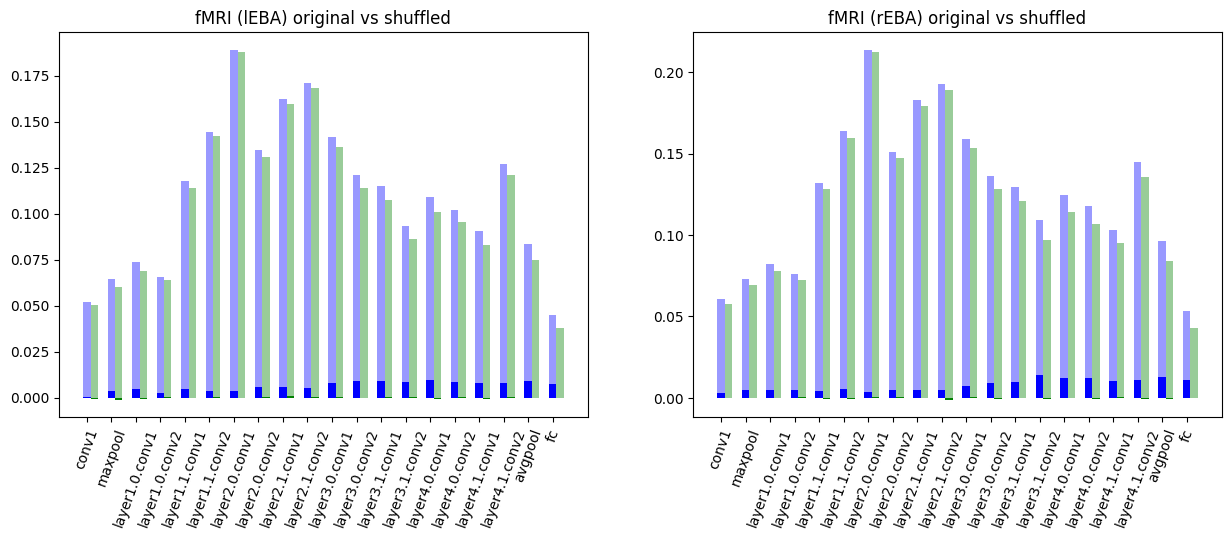

In [8]:
# lEBA
sub1_fMRI_lEBA_resnet_orig = np.load(data_dir / 'fMRI_results' / 'resnet18_sub01_lEBA_alignments_original_order.npy')
sub1_fMRI_lEBA_resnet_rand = np.load(data_dir / 'fMRI_results' / 'resnet18_sub01_lEBA_alignments_random_data.npy')
sub1_fMRI_lEBA_resnet_shuf = np.load(data_dir / 'fMRI_results' / 'resnet18_sub01_lEBA_alignments_shuffled_order.npy')

sub2_fMRI_lEBA_resnet_orig = np.load(data_dir / 'fMRI_results' / 'resnet18_sub02_lEBA_alignments_original_order.npy')
sub2_fMRI_lEBA_resnet_rand = np.load(data_dir / 'fMRI_results' / 'resnet18_sub02_lEBA_alignments_random_data.npy')
sub2_fMRI_lEBA_resnet_shuf = np.load(data_dir / 'fMRI_results' / 'resnet18_sub02_lEBA_alignments_shuffled_order.npy')

sub3_fMRI_lEBA_resnet_orig = np.load(data_dir / 'fMRI_results' / 'resnet18_sub03_lEBA_alignments_original_order.npy')
sub3_fMRI_lEBA_resnet_rand = np.load(data_dir / 'fMRI_results' / 'resnet18_sub03_lEBA_alignments_random_data.npy')
sub3_fMRI_lEBA_resnet_shuf = np.load(data_dir / 'fMRI_results' / 'resnet18_sub03_lEBA_alignments_shuffled_order.npy')

# rEBA
sub1_fMRI_rEBA_resnet_orig = np.load(data_dir / 'fMRI_results' / 'resnet18_sub01_rEBA_alignments_original_order.npy')
sub1_fMRI_rEBA_resnet_rand = np.load(data_dir / 'fMRI_results' / 'resnet18_sub01_rEBA_alignments_random_data.npy')
sub1_fMRI_rEBA_resnet_shuf = np.load(data_dir / 'fMRI_results' / 'resnet18_sub01_rEBA_alignments_shuffled_order.npy')

sub2_fMRI_rEBA_resnet_orig = np.load(data_dir / 'fMRI_results' / 'resnet18_sub02_rEBA_alignments_original_order.npy')
sub2_fMRI_rEBA_resnet_rand = np.load(data_dir / 'fMRI_results' / 'resnet18_sub02_rEBA_alignments_random_data.npy')
sub2_fMRI_rEBA_resnet_shuf = np.load(data_dir / 'fMRI_results' / 'resnet18_sub02_rEBA_alignments_shuffled_order.npy')

sub3_fMRI_rEBA_resnet_orig = np.load(data_dir / 'fMRI_results' / 'resnet18_sub03_rEBA_alignments_original_order.npy')
sub3_fMRI_rEBA_resnet_rand = np.load(data_dir / 'fMRI_results' / 'resnet18_sub03_rEBA_alignments_random_data.npy')
sub3_fMRI_rEBA_resnet_shuf = np.load(data_dir / 'fMRI_results' / 'resnet18_sub03_rEBA_alignments_shuffled_order.npy')

confidence = 0.95
n = 15

# lEBA - CKA biased
cka_biased = 0 # selects correct index, ignore semantics
tmp = np.hstack([sub1_fMRI_lEBA_resnet_orig[0, cka_biased, :], sub2_fMRI_lEBA_resnet_orig[0, cka_biased, :], sub3_fMRI_lEBA_resnet_orig[0, cka_biased, :]])
fMRI_lEBA_CKA_biased_orig_m, fMRI_lEBA_CKA_biased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_lEBA_CKA_biased_orig_h = fMRI_lEBA_CKA_biased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

tmp = np.hstack([sub1_fMRI_lEBA_resnet_rand[:, cka_biased, :], sub2_fMRI_lEBA_resnet_rand[:, cka_biased, :], sub3_fMRI_lEBA_resnet_rand[:, cka_biased, :]])
fMRI_lEBA_CKA_biased_rand_m, fMRI_lEBA_CKA_biased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_lEBA_CKA_biased_rand_h = fMRI_lEBA_CKA_biased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

tmp = np.hstack([sub1_fMRI_lEBA_resnet_shuf[:, cka_biased, :], sub2_fMRI_lEBA_resnet_shuf[:, cka_biased, :], sub3_fMRI_lEBA_resnet_shuf[:, cka_biased, :]])
fMRI_lEBA_CKA_biased_shuf_m, fMRI_lEBA_CKA_biased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_lEBA_CKA_biased_shuf_h = fMRI_lEBA_CKA_biased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

# lEBA - CKA debiased
cka_biased = 1 # selects correct index, ignore semantics
tmp = np.hstack([sub1_fMRI_lEBA_resnet_orig[0, cka_biased, :], sub2_fMRI_lEBA_resnet_orig[0, cka_biased, :], sub3_fMRI_lEBA_resnet_orig[0, cka_biased, :]])
fMRI_lEBA_CKA_debiased_orig_m, fMRI_lEBA_CKA_debiased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_lEBA_CKA_debiased_orig_h = fMRI_lEBA_CKA_debiased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

tmp = np.hstack([sub1_fMRI_lEBA_resnet_rand[:, cka_biased, :], sub2_fMRI_lEBA_resnet_rand[:, cka_biased, :], sub3_fMRI_lEBA_resnet_rand[:, cka_biased, :]])
fMRI_lEBA_CKA_debiased_rand_m, fMRI_lEBA_CKA_debiased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_lEBA_CKA_debiased_rand_h = fMRI_lEBA_CKA_debiased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

tmp = np.hstack([sub1_fMRI_lEBA_resnet_shuf[:, cka_biased, :], sub2_fMRI_lEBA_resnet_shuf[:, cka_biased, :], sub3_fMRI_lEBA_resnet_shuf[:, cka_biased, :]])
fMRI_lEBA_CKA_debiased_shuf_m, fMRI_lEBA_CKA_debiased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_lEBA_CKA_debiased_shuf_h = fMRI_lEBA_CKA_debiased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

# rEBA-  CKA biased
cka_biased = 0 # selects correct index, ignore semantics
tmp = np.hstack([sub1_fMRI_rEBA_resnet_orig[0, cka_biased, :], sub2_fMRI_rEBA_resnet_orig[0, cka_biased, :], sub3_fMRI_rEBA_resnet_orig[0, cka_biased, :]])
fMRI_rEBA_CKA_biased_orig_m, fMRI_rEBA_CKA_biased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_rEBA_CKA_biased_orig_h = fMRI_rEBA_CKA_biased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

tmp = np.hstack([sub1_fMRI_rEBA_resnet_rand[:, cka_biased, :], sub2_fMRI_rEBA_resnet_rand[:, cka_biased, :], sub3_fMRI_rEBA_resnet_rand[:, cka_biased, :]])
fMRI_rEBA_CKA_biased_rand_m, fMRI_rEBA_CKA_biased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_rEBA_CKA_biased_rand_h = fMRI_rEBA_CKA_biased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

tmp = np.hstack([sub1_fMRI_rEBA_resnet_shuf[:, cka_biased, :], sub2_fMRI_rEBA_resnet_shuf[:, cka_biased, :], sub3_fMRI_rEBA_resnet_shuf[:, cka_biased, :]])
fMRI_rEBA_CKA_biased_shuf_m, fMRI_rEBA_CKA_biased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_rEBA_CKA_biased_shuf_h = fMRI_rEBA_CKA_biased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

# rEBA - CKA debiased
cka_biased = 1 # selects correct index, ignore semantics
tmp = np.hstack([sub1_fMRI_rEBA_resnet_orig[0, cka_biased, :], sub2_fMRI_rEBA_resnet_orig[0, cka_biased, :], sub3_fMRI_rEBA_resnet_orig[0, cka_biased, :]])
fMRI_rEBA_CKA_debiased_orig_m, fMRI_rEBA_CKA_debiased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_rEBA_CKA_debiased_orig_h = fMRI_rEBA_CKA_debiased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

tmp = np.hstack([sub1_fMRI_rEBA_resnet_rand[:, cka_biased, :], sub2_fMRI_rEBA_resnet_rand[:, cka_biased, :], sub3_fMRI_rEBA_resnet_rand[:, cka_biased, :]])
fMRI_rEBA_CKA_debiased_rand_m, fMRI_rEBA_CKA_debiased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_rEBA_CKA_debiased_rand_h = fMRI_rEBA_CKA_debiased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

tmp = np.hstack([sub1_fMRI_rEBA_resnet_shuf[:, cka_biased, :], sub2_fMRI_rEBA_resnet_shuf[:, cka_biased, :], sub3_fMRI_rEBA_resnet_shuf[:, cka_biased, :]])
fMRI_rEBA_CKA_debiased_shuf_m, fMRI_rEBA_CKA_debiased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_rEBA_CKA_debiased_shuf_h = fMRI_rEBA_CKA_debiased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1) 


fig, axes = plt.subplots(1,2, figsize=(15,5))
axes = np.ravel(axes)

x_idx = list(range(len(layer_names_resnet18)))
width = 0.3
alpha_biased = 0.4
alpha_debiased = 1.0
errorbar_alpha = 0.4
offset = 0.3

for i, layer_name in enumerate(layer_names_resnet18):

    resnet_idx = i

    # rEBA-  CKA biased
    cka_biased = 0 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_lEBA_resnet_orig[0, cka_biased, resnet_idx], sub2_fMRI_lEBA_resnet_orig[0, cka_biased, resnet_idx], sub3_fMRI_lEBA_resnet_orig[0, cka_biased, resnet_idx]])
    fMRI_lEBA_CKA_biased_orig_m, fMRI_lEBA_CKA_biased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lEBA_CKA_biased_orig_h = fMRI_lEBA_CKA_biased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_lEBA_resnet_rand[:, cka_biased, resnet_idx], sub2_fMRI_lEBA_resnet_rand[:, cka_biased, resnet_idx], sub3_fMRI_lEBA_resnet_rand[:, cka_biased, resnet_idx]])
    fMRI_lEBA_CKA_biased_rand_m, fMRI_lEBA_CKA_biased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lEBA_CKA_biased_rand_h = fMRI_lEBA_CKA_biased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_lEBA_resnet_shuf[:, cka_biased, resnet_idx], sub2_fMRI_lEBA_resnet_shuf[:, cka_biased, resnet_idx], sub3_fMRI_lEBA_resnet_shuf[:, cka_biased, resnet_idx]])
    fMRI_lEBA_CKA_biased_shuf_m, fMRI_lEBA_CKA_biased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lEBA_CKA_biased_shuf_h = fMRI_lEBA_CKA_biased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    # rEBA - CKA debiased
    cka_biased = 1 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_lEBA_resnet_orig[0, cka_biased, resnet_idx], sub2_fMRI_lEBA_resnet_orig[0, cka_biased, resnet_idx], sub3_fMRI_lEBA_resnet_orig[0, cka_biased, resnet_idx]])
    fMRI_lEBA_CKA_debiased_orig_m, fMRI_lEBA_CKA_debiased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lEBA_CKA_debiased_orig_h = fMRI_lEBA_CKA_debiased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_lEBA_resnet_rand[:, cka_biased, resnet_idx], sub2_fMRI_lEBA_resnet_rand[:, cka_biased, resnet_idx], sub3_fMRI_lEBA_resnet_rand[:, cka_biased, resnet_idx]])
    fMRI_lEBA_CKA_debiased_rand_m, fMRI_lEBA_CKA_debiased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lEBA_CKA_debiased_rand_h = fMRI_lEBA_CKA_debiased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_lEBA_resnet_shuf[:, cka_biased, resnet_idx], sub2_fMRI_lEBA_resnet_shuf[:, cka_biased, resnet_idx], sub3_fMRI_lEBA_resnet_shuf[:, cka_biased, resnet_idx]])
    fMRI_lEBA_CKA_debiased_shuf_m, fMRI_lEBA_CKA_debiased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lEBA_CKA_debiased_shuf_h = fMRI_lEBA_CKA_debiased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1) 

    #axes[0].bar(x_idx[i]-.2, fMRI_rEBA_CKA_biased_rand_m, color='red', width=width, alpha=alpha_biased)
    axes[0].bar(x_idx[i],    fMRI_lEBA_CKA_biased_orig_m, color='blue', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i], fMRI_rEBA_CKA_biased_orig_m, yerr=fMRI_rEBA_CKA_biased_orig_h, color='blue', alpha=errorbar_alpha)

    axes[0].bar(x_idx[i]+offset, fMRI_lEBA_CKA_biased_shuf_m, color='green', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i]+offset, fMRI_rEBA_CKA_biased_shuf_m, yerr=fMRI_rEBA_CKA_biased_orig_h, color='green', alpha=errorbar_alpha)

    #axes[0].bar(x_idx[i]-.2, fMRI_rEBA_CKA_debiased_rand_m, color='red', width=width, alpha=alpha_debiased)
    axes[0].bar(x_idx[i],    fMRI_lEBA_CKA_debiased_orig_m, color='blue', width=width, alpha=alpha_debiased)
    #axes[0].errorbar(x_idx[i], fMRI_rEBA_CKA_debiased_orig_m, yerr=fMRI_rEBA_CKA_debiased_orig_h, color='blue', alpha=errorbar_alpha)

    axes[0].bar(x_idx[i]+offset, fMRI_lEBA_CKA_debiased_shuf_m, color='green', width=width, alpha=alpha_debiased)

axes[0].set_title('fMRI (lEBA) original vs shuffled')
axes[0].set_xticks(x_idx, layer_names_resnet18, rotation=70);


for i, layer_name in enumerate(layer_names_resnet18):

    resnet_idx = i

    # rEBA-  CKA biased
    cka_biased = 0 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_rEBA_resnet_orig[0, cka_biased, resnet_idx], sub2_fMRI_rEBA_resnet_orig[0, cka_biased, resnet_idx], sub3_fMRI_rEBA_resnet_orig[0, cka_biased, resnet_idx]])
    fMRI_rEBA_CKA_biased_orig_m, fMRI_rEBA_CKA_biased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_rEBA_CKA_biased_orig_h = fMRI_rEBA_CKA_biased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_rEBA_resnet_rand[:, cka_biased, resnet_idx], sub2_fMRI_rEBA_resnet_rand[:, cka_biased, resnet_idx], sub3_fMRI_rEBA_resnet_rand[:, cka_biased, resnet_idx]])
    fMRI_rEBA_CKA_biased_rand_m, fMRI_rEBA_CKA_biased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_rEBA_CKA_biased_rand_h = fMRI_rEBA_CKA_biased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_rEBA_resnet_shuf[:, cka_biased, resnet_idx], sub2_fMRI_rEBA_resnet_shuf[:, cka_biased, resnet_idx], sub3_fMRI_rEBA_resnet_shuf[:, cka_biased, resnet_idx]])
    fMRI_rEBA_CKA_biased_shuf_m, fMRI_rEBA_CKA_biased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_rEBA_CKA_biased_shuf_h = fMRI_rEBA_CKA_biased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    # rEBA - CKA debiased
    cka_biased = 1 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_rEBA_resnet_orig[0, cka_biased, resnet_idx], sub2_fMRI_rEBA_resnet_orig[0, cka_biased, resnet_idx], sub3_fMRI_rEBA_resnet_orig[0, cka_biased, resnet_idx]])
    fMRI_rEBA_CKA_debiased_orig_m, fMRI_rEBA_CKA_debiased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_rEBA_CKA_debiased_orig_h = fMRI_rEBA_CKA_debiased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_rEBA_resnet_rand[:, cka_biased, resnet_idx], sub2_fMRI_rEBA_resnet_rand[:, cka_biased, resnet_idx], sub3_fMRI_rEBA_resnet_rand[:, cka_biased, resnet_idx]])
    fMRI_rEBA_CKA_debiased_rand_m, fMRI_rEBA_CKA_debiased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_rEBA_CKA_debiased_rand_h = fMRI_rEBA_CKA_debiased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_rEBA_resnet_shuf[:, cka_biased, resnet_idx], sub2_fMRI_rEBA_resnet_shuf[:, cka_biased, resnet_idx], sub3_fMRI_rEBA_resnet_shuf[:, cka_biased, resnet_idx]])
    fMRI_rEBA_CKA_debiased_shuf_m, fMRI_rEBA_CKA_debiased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_rEBA_CKA_debiased_shuf_h = fMRI_rEBA_CKA_debiased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1) 

    #axes[0].bar(x_idx[i]-.2, fMRI_rEBA_CKA_biased_rand_m, color='red', width=width, alpha=alpha_biased)
    axes[1].bar(x_idx[i],    fMRI_rEBA_CKA_biased_orig_m, color='blue', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i], fMRI_rEBA_CKA_biased_orig_m, yerr=fMRI_rEBA_CKA_biased_orig_h, color='blue', alpha=errorbar_alpha)

    axes[1].bar(x_idx[i]+offset, fMRI_rEBA_CKA_biased_shuf_m, color='green', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i]+offset, fMRI_rEBA_CKA_biased_shuf_m, yerr=fMRI_rEBA_CKA_biased_orig_h, color='green', alpha=errorbar_alpha)

    #axes[0].bar(x_idx[i]-.2, fMRI_rEBA_CKA_debiased_rand_m, color='red', width=width, alpha=alpha_debiased)
    axes[1].bar(x_idx[i],    fMRI_rEBA_CKA_debiased_orig_m, color='blue', width=width, alpha=alpha_debiased)
    #axes[0].errorbar(x_idx[i], fMRI_rEBA_CKA_debiased_orig_m, yerr=fMRI_rEBA_CKA_debiased_orig_h, color='blue', alpha=errorbar_alpha)

    axes[1].bar(x_idx[i]+offset, fMRI_rEBA_CKA_debiased_shuf_m, color='green', width=width, alpha=alpha_debiased)

axes[1].set_title('fMRI (rEBA) original vs shuffled')
axes[1].set_xticks(x_idx, layer_names_resnet18, rotation=70);

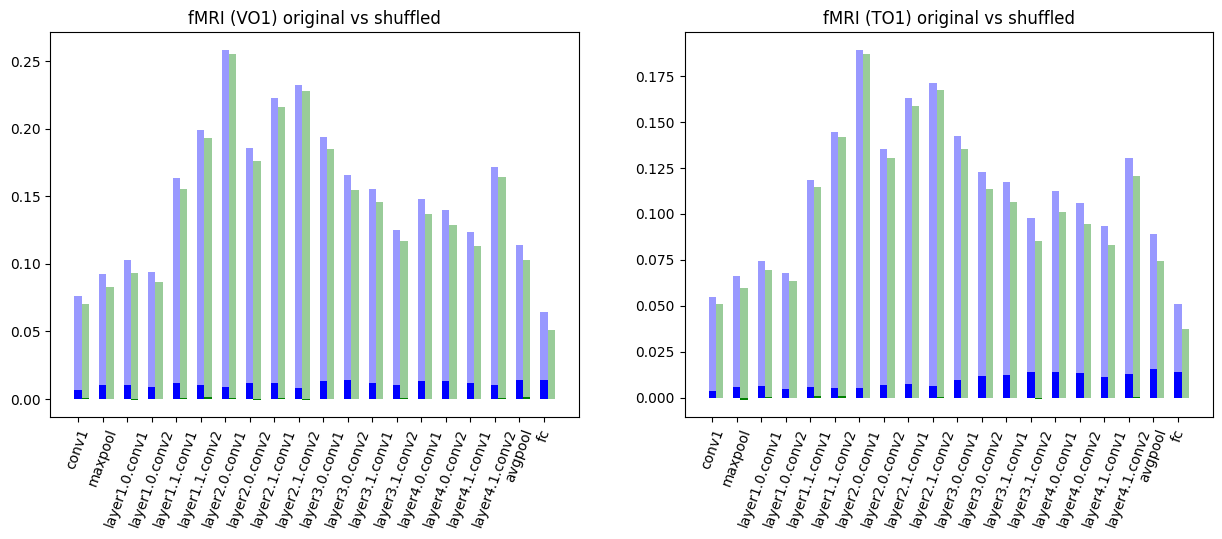

In [9]:
# VO1
sub1_fMRI_VO1_resnet_orig = np.load(data_dir / 'fMRI_results' / 'resnet18_sub01_VO1_alignments_original_order.npy')
sub1_fMRI_VO1_resnet_rand = np.load(data_dir / 'fMRI_results' / 'resnet18_sub01_VO1_alignments_random_data.npy')
sub1_fMRI_VO1_resnet_shuf = np.load(data_dir / 'fMRI_results' / 'resnet18_sub01_VO1_alignments_shuffled_order.npy')

sub2_fMRI_VO1_resnet_orig = np.load(data_dir / 'fMRI_results' / 'resnet18_sub02_VO1_alignments_original_order.npy')
sub2_fMRI_VO1_resnet_rand = np.load(data_dir / 'fMRI_results' / 'resnet18_sub02_VO1_alignments_random_data.npy')
sub2_fMRI_VO1_resnet_shuf = np.load(data_dir / 'fMRI_results' / 'resnet18_sub02_VO1_alignments_shuffled_order.npy')

sub3_fMRI_VO1_resnet_orig = np.load(data_dir / 'fMRI_results' / 'resnet18_sub03_VO1_alignments_original_order.npy')
sub3_fMRI_VO1_resnet_rand = np.load(data_dir / 'fMRI_results' / 'resnet18_sub03_VO1_alignments_random_data.npy')
sub3_fMRI_VO1_resnet_shuf = np.load(data_dir / 'fMRI_results' / 'resnet18_sub03_VO1_alignments_shuffled_order.npy')

# TO1
sub1_fMRI_TO1_resnet_orig = np.load(data_dir / 'fMRI_results' / 'resnet18_sub01_TO1_alignments_original_order.npy')
sub1_fMRI_TO1_resnet_rand = np.load(data_dir / 'fMRI_results' / 'resnet18_sub01_TO1_alignments_random_data.npy')
sub1_fMRI_TO1_resnet_shuf = np.load(data_dir / 'fMRI_results' / 'resnet18_sub01_TO1_alignments_shuffled_order.npy')

sub2_fMRI_TO1_resnet_orig = np.load(data_dir / 'fMRI_results' / 'resnet18_sub02_TO1_alignments_original_order.npy')
sub2_fMRI_TO1_resnet_rand = np.load(data_dir / 'fMRI_results' / 'resnet18_sub02_TO1_alignments_random_data.npy')
sub2_fMRI_TO1_resnet_shuf = np.load(data_dir / 'fMRI_results' / 'resnet18_sub02_TO1_alignments_shuffled_order.npy')

sub3_fMRI_TO1_resnet_orig = np.load(data_dir / 'fMRI_results' / 'resnet18_sub03_TO1_alignments_original_order.npy')
sub3_fMRI_TO1_resnet_rand = np.load(data_dir / 'fMRI_results' / 'resnet18_sub03_TO1_alignments_random_data.npy')
sub3_fMRI_TO1_resnet_shuf = np.load(data_dir / 'fMRI_results' / 'resnet18_sub03_TO1_alignments_shuffled_order.npy')

confidence = 0.95
n = 15

# VO1 - CKA biased
cka_biased = 0 # selects correct index, ignore semantics
tmp = np.hstack([sub1_fMRI_VO1_resnet_orig[0, cka_biased, :], sub2_fMRI_VO1_resnet_orig[0, cka_biased, :], sub3_fMRI_VO1_resnet_orig[0, cka_biased, :]])
fMRI_VO1_CKA_biased_orig_m, fMRI_VO1_CKA_biased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_VO1_CKA_biased_orig_h = fMRI_VO1_CKA_biased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

tmp = np.hstack([sub1_fMRI_VO1_resnet_rand[:, cka_biased, :], sub2_fMRI_VO1_resnet_rand[:, cka_biased, :], sub3_fMRI_VO1_resnet_rand[:, cka_biased, :]])
fMRI_VO1_CKA_biased_rand_m, fMRI_VO1_CKA_biased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_VO1_CKA_biased_rand_h = fMRI_VO1_CKA_biased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

tmp = np.hstack([sub1_fMRI_VO1_resnet_shuf[:, cka_biased, :], sub2_fMRI_VO1_resnet_shuf[:, cka_biased, :], sub3_fMRI_VO1_resnet_shuf[:, cka_biased, :]])
fMRI_VO1_CKA_biased_shuf_m, fMRI_VO1_CKA_biased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_VO1_CKA_biased_shuf_h = fMRI_VO1_CKA_biased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

# VO1 - CKA debiased
cka_biased = 1 # selects correct index, ignore semantics
tmp = np.hstack([sub1_fMRI_VO1_resnet_orig[0, cka_biased, :], sub2_fMRI_VO1_resnet_orig[0, cka_biased, :], sub3_fMRI_VO1_resnet_orig[0, cka_biased, :]])
fMRI_VO1_CKA_debiased_orig_m, fMRI_VO1_CKA_debiased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_VO1_CKA_debiased_orig_h = fMRI_VO1_CKA_debiased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

tmp = np.hstack([sub1_fMRI_VO1_resnet_rand[:, cka_biased, :], sub2_fMRI_VO1_resnet_rand[:, cka_biased, :], sub3_fMRI_VO1_resnet_rand[:, cka_biased, :]])
fMRI_VO1_CKA_debiased_rand_m, fMRI_VO1_CKA_debiased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_VO1_CKA_debiased_rand_h = fMRI_VO1_CKA_debiased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

tmp = np.hstack([sub1_fMRI_VO1_resnet_shuf[:, cka_biased, :], sub2_fMRI_VO1_resnet_shuf[:, cka_biased, :], sub3_fMRI_VO1_resnet_shuf[:, cka_biased, :]])
fMRI_VO1_CKA_debiased_shuf_m, fMRI_VO1_CKA_debiased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_VO1_CKA_debiased_shuf_h = fMRI_VO1_CKA_debiased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

# TO1-  CKA biased
cka_biased = 0 # selects correct index, ignore semantics
tmp = np.hstack([sub1_fMRI_TO1_resnet_orig[0, cka_biased, :], sub2_fMRI_TO1_resnet_orig[0, cka_biased, :], sub3_fMRI_TO1_resnet_orig[0, cka_biased, :]])
fMRI_TO1_CKA_biased_orig_m, fMRI_TO1_CKA_biased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_TO1_CKA_biased_orig_h = fMRI_TO1_CKA_biased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

tmp = np.hstack([sub1_fMRI_TO1_resnet_rand[:, cka_biased, :], sub2_fMRI_TO1_resnet_rand[:, cka_biased, :], sub3_fMRI_TO1_resnet_rand[:, cka_biased, :]])
fMRI_TO1_CKA_biased_rand_m, fMRI_TO1_CKA_biased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_TO1_CKA_biased_rand_h = fMRI_TO1_CKA_biased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

tmp = np.hstack([sub1_fMRI_TO1_resnet_shuf[:, cka_biased, :], sub2_fMRI_TO1_resnet_shuf[:, cka_biased, :], sub3_fMRI_TO1_resnet_shuf[:, cka_biased, :]])
fMRI_TO1_CKA_biased_shuf_m, fMRI_TO1_CKA_biased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_TO1_CKA_biased_shuf_h = fMRI_TO1_CKA_biased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

# TO1 - CKA debiased
cka_biased = 1 # selects correct index, ignore semantics
tmp = np.hstack([sub1_fMRI_TO1_resnet_orig[0, cka_biased, :], sub2_fMRI_TO1_resnet_orig[0, cka_biased, :], sub3_fMRI_TO1_resnet_orig[0, cka_biased, :]])
fMRI_TO1_CKA_debiased_orig_m, fMRI_TO1_CKA_debiased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_TO1_CKA_debiased_orig_h = fMRI_TO1_CKA_debiased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

tmp = np.hstack([sub1_fMRI_TO1_resnet_rand[:, cka_biased, :], sub2_fMRI_TO1_resnet_rand[:, cka_biased, :], sub3_fMRI_TO1_resnet_rand[:, cka_biased, :]])
fMRI_TO1_CKA_debiased_rand_m, fMRI_TO1_CKA_debiased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_TO1_CKA_debiased_rand_h = fMRI_TO1_CKA_debiased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

tmp = np.hstack([sub1_fMRI_TO1_resnet_shuf[:, cka_biased, :], sub2_fMRI_TO1_resnet_shuf[:, cka_biased, :], sub3_fMRI_TO1_resnet_shuf[:, cka_biased, :]])
fMRI_TO1_CKA_debiased_shuf_m, fMRI_TO1_CKA_debiased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_TO1_CKA_debiased_shuf_h = fMRI_TO1_CKA_debiased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1) 


fig, axes = plt.subplots(1,2, figsize=(15,5))
axes = np.ravel(axes)

x_idx = list(range(len(layer_names_resnet18)))
width = 0.3
alpha_biased = 0.4
alpha_debiased = 1.0
errorbar_alpha = 0.4
offset = 0.3

for i, layer_name in enumerate(layer_names_resnet18):

    resnet_idx = i

    # VO1-  CKA biased
    cka_biased = 0 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_VO1_resnet_orig[0, cka_biased, resnet_idx], sub2_fMRI_VO1_resnet_orig[0, cka_biased, resnet_idx], sub3_fMRI_VO1_resnet_orig[0, cka_biased, resnet_idx]])
    fMRI_VO1_CKA_biased_orig_m, fMRI_VO1_CKA_biased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_VO1_CKA_biased_orig_h = fMRI_VO1_CKA_biased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_VO1_resnet_rand[:, cka_biased, resnet_idx], sub2_fMRI_VO1_resnet_rand[:, cka_biased, resnet_idx], sub3_fMRI_VO1_resnet_rand[:, cka_biased, resnet_idx]])
    fMRI_VO1_CKA_biased_rand_m, fMRI_VO1_CKA_biased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_VO1_CKA_biased_rand_h = fMRI_VO1_CKA_biased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_VO1_resnet_shuf[:, cka_biased, resnet_idx], sub2_fMRI_VO1_resnet_shuf[:, cka_biased, resnet_idx], sub3_fMRI_VO1_resnet_shuf[:, cka_biased, resnet_idx]])
    fMRI_VO1_CKA_biased_shuf_m, fMRI_VO1_CKA_biased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_VO1_CKA_biased_shuf_h = fMRI_VO1_CKA_biased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    # VO1 - CKA debiased
    cka_biased = 1 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_VO1_resnet_orig[0, cka_biased, resnet_idx], sub2_fMRI_VO1_resnet_orig[0, cka_biased, resnet_idx], sub3_fMRI_VO1_resnet_orig[0, cka_biased, resnet_idx]])
    fMRI_VO1_CKA_debiased_orig_m, fMRI_VO1_CKA_debiased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_VO1_CKA_debiased_orig_h = fMRI_VO1_CKA_debiased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_VO1_resnet_rand[:, cka_biased, resnet_idx], sub2_fMRI_VO1_resnet_rand[:, cka_biased, resnet_idx], sub3_fMRI_VO1_resnet_rand[:, cka_biased, resnet_idx]])
    fMRI_VO1_CKA_debiased_rand_m, fMRI_VO1_CKA_debiased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_VO1_CKA_debiased_rand_h = fMRI_VO1_CKA_debiased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_VO1_resnet_shuf[:, cka_biased, resnet_idx], sub2_fMRI_VO1_resnet_shuf[:, cka_biased, resnet_idx], sub3_fMRI_VO1_resnet_shuf[:, cka_biased, resnet_idx]])
    fMRI_VO1_CKA_debiased_shuf_m, fMRI_VO1_CKA_debiased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_VO1_CKA_debiased_shuf_h = fMRI_VO1_CKA_debiased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1) 

    #axes[0].bar(x_idx[i]-.2, fMRI_TO1_CKA_biased_rand_m, color='red', width=width, alpha=alpha_biased)
    axes[0].bar(x_idx[i],    fMRI_VO1_CKA_biased_orig_m, color='blue', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i], fMRI_TO1_CKA_biased_orig_m, yerr=fMRI_TO1_CKA_biased_orig_h, color='blue', alpha=errorbar_alpha)

    axes[0].bar(x_idx[i]+offset, fMRI_VO1_CKA_biased_shuf_m, color='green', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i]+offset, fMRI_TO1_CKA_biased_shuf_m, yerr=fMRI_TO1_CKA_biased_orig_h, color='green', alpha=errorbar_alpha)

    #axes[0].bar(x_idx[i]-.2, fMRI_TO1_CKA_debiased_rand_m, color='red', width=width, alpha=alpha_debiased)
    axes[0].bar(x_idx[i],    fMRI_VO1_CKA_debiased_orig_m, color='blue', width=width, alpha=alpha_debiased)
    #axes[0].errorbar(x_idx[i], fMRI_TO1_CKA_debiased_orig_m, yerr=fMRI_TO1_CKA_debiased_orig_h, color='blue', alpha=errorbar_alpha)

    axes[0].bar(x_idx[i]+offset, fMRI_VO1_CKA_debiased_shuf_m, color='green', width=width, alpha=alpha_debiased)

axes[0].set_title('fMRI (VO1) original vs shuffled')
axes[0].set_xticks(x_idx, layer_names_resnet18, rotation=70);


for i, layer_name in enumerate(layer_names_resnet18):

    resnet_idx = i

    # TO1-  CKA biased
    cka_biased = 0 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_TO1_resnet_orig[0, cka_biased, resnet_idx], sub2_fMRI_TO1_resnet_orig[0, cka_biased, resnet_idx], sub3_fMRI_TO1_resnet_orig[0, cka_biased, resnet_idx]])
    fMRI_TO1_CKA_biased_orig_m, fMRI_TO1_CKA_biased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_TO1_CKA_biased_orig_h = fMRI_TO1_CKA_biased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_TO1_resnet_rand[:, cka_biased, resnet_idx], sub2_fMRI_TO1_resnet_rand[:, cka_biased, resnet_idx], sub3_fMRI_TO1_resnet_rand[:, cka_biased, resnet_idx]])
    fMRI_TO1_CKA_biased_rand_m, fMRI_TO1_CKA_biased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_TO1_CKA_biased_rand_h = fMRI_TO1_CKA_biased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_TO1_resnet_shuf[:, cka_biased, resnet_idx], sub2_fMRI_TO1_resnet_shuf[:, cka_biased, resnet_idx], sub3_fMRI_TO1_resnet_shuf[:, cka_biased, resnet_idx]])
    fMRI_TO1_CKA_biased_shuf_m, fMRI_TO1_CKA_biased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_TO1_CKA_biased_shuf_h = fMRI_TO1_CKA_biased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    # TO1 - CKA debiased
    cka_biased = 1 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_TO1_resnet_orig[0, cka_biased, resnet_idx], sub2_fMRI_TO1_resnet_orig[0, cka_biased, resnet_idx], sub3_fMRI_TO1_resnet_orig[0, cka_biased, resnet_idx]])
    fMRI_TO1_CKA_debiased_orig_m, fMRI_TO1_CKA_debiased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_TO1_CKA_debiased_orig_h = fMRI_TO1_CKA_debiased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_TO1_resnet_rand[:, cka_biased, resnet_idx], sub2_fMRI_TO1_resnet_rand[:, cka_biased, resnet_idx], sub3_fMRI_TO1_resnet_rand[:, cka_biased, resnet_idx]])
    fMRI_TO1_CKA_debiased_rand_m, fMRI_TO1_CKA_debiased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_TO1_CKA_debiased_rand_h = fMRI_TO1_CKA_debiased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_TO1_resnet_shuf[:, cka_biased, resnet_idx], sub2_fMRI_TO1_resnet_shuf[:, cka_biased, resnet_idx], sub3_fMRI_TO1_resnet_shuf[:, cka_biased, resnet_idx]])
    fMRI_TO1_CKA_debiased_shuf_m, fMRI_TO1_CKA_debiased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_TO1_CKA_debiased_shuf_h = fMRI_TO1_CKA_debiased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1) 

    #axes[0].bar(x_idx[i]-.2, fMRI_TO1_CKA_biased_rand_m, color='red', width=width, alpha=alpha_biased)
    axes[1].bar(x_idx[i],    fMRI_TO1_CKA_biased_orig_m, color='blue', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i], fMRI_TO1_CKA_biased_orig_m, yerr=fMRI_TO1_CKA_biased_orig_h, color='blue', alpha=errorbar_alpha)

    axes[1].bar(x_idx[i]+offset, fMRI_TO1_CKA_biased_shuf_m, color='green', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i]+offset, fMRI_TO1_CKA_biased_shuf_m, yerr=fMRI_TO1_CKA_biased_orig_h, color='green', alpha=errorbar_alpha)

    #axes[0].bar(x_idx[i]-.2, fMRI_TO1_CKA_debiased_rand_m, color='red', width=width, alpha=alpha_debiased)
    axes[1].bar(x_idx[i],    fMRI_TO1_CKA_debiased_orig_m, color='blue', width=width, alpha=alpha_debiased)
    #axes[0].errorbar(x_idx[i], fMRI_TO1_CKA_debiased_orig_m, yerr=fMRI_TO1_CKA_debiased_orig_h, color='blue', alpha=errorbar_alpha)

    axes[1].bar(x_idx[i]+offset, fMRI_TO1_CKA_debiased_shuf_m, color='green', width=width, alpha=alpha_debiased)

axes[1].set_title('fMRI (TO1) original vs shuffled')
axes[1].set_xticks(x_idx, layer_names_resnet18, rotation=70);

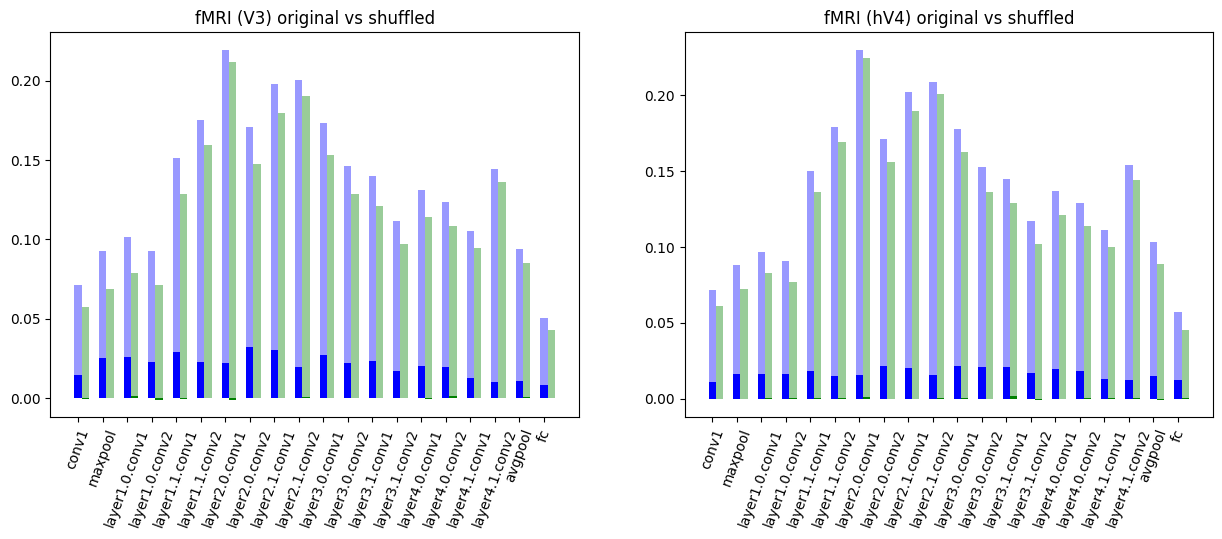

In [10]:
# V3
sub1_fMRI_V3_resnet_orig = np.load(data_dir / 'fMRI_results' / 'resnet18_sub01_V3_alignments_original_order.npy')
sub1_fMRI_V3_resnet_rand = np.load(data_dir / 'fMRI_results' / 'resnet18_sub01_V3_alignments_random_data.npy')
sub1_fMRI_V3_resnet_shuf = np.load(data_dir / 'fMRI_results' / 'resnet18_sub01_V3_alignments_shuffled_order.npy')

sub2_fMRI_V3_resnet_orig = np.load(data_dir / 'fMRI_results' / 'resnet18_sub02_V3_alignments_original_order.npy')
sub2_fMRI_V3_resnet_rand = np.load(data_dir / 'fMRI_results' / 'resnet18_sub02_V3_alignments_random_data.npy')
sub2_fMRI_V3_resnet_shuf = np.load(data_dir / 'fMRI_results' / 'resnet18_sub02_V3_alignments_shuffled_order.npy')

sub3_fMRI_V3_resnet_orig = np.load(data_dir / 'fMRI_results' / 'resnet18_sub03_V3_alignments_original_order.npy')
sub3_fMRI_V3_resnet_rand = np.load(data_dir / 'fMRI_results' / 'resnet18_sub03_V3_alignments_random_data.npy')
sub3_fMRI_V3_resnet_shuf = np.load(data_dir / 'fMRI_results' / 'resnet18_sub03_V3_alignments_shuffled_order.npy')

# hV4
sub1_fMRI_hV4_resnet_orig = np.load(data_dir / 'fMRI_results' / 'resnet18_sub01_hV4_alignments_original_order.npy')
sub1_fMRI_hV4_resnet_rand = np.load(data_dir / 'fMRI_results' / 'resnet18_sub01_hV4_alignments_random_data.npy')
sub1_fMRI_hV4_resnet_shuf = np.load(data_dir / 'fMRI_results' / 'resnet18_sub01_hV4_alignments_shuffled_order.npy')

sub2_fMRI_hV4_resnet_orig = np.load(data_dir / 'fMRI_results' / 'resnet18_sub02_hV4_alignments_original_order.npy')
sub2_fMRI_hV4_resnet_rand = np.load(data_dir / 'fMRI_results' / 'resnet18_sub02_hV4_alignments_random_data.npy')
sub2_fMRI_hV4_resnet_shuf = np.load(data_dir / 'fMRI_results' / 'resnet18_sub02_hV4_alignments_shuffled_order.npy')

sub3_fMRI_hV4_resnet_orig = np.load(data_dir / 'fMRI_results' / 'resnet18_sub03_hV4_alignments_original_order.npy')
sub3_fMRI_hV4_resnet_rand = np.load(data_dir / 'fMRI_results' / 'resnet18_sub03_hV4_alignments_random_data.npy')
sub3_fMRI_hV4_resnet_shuf = np.load(data_dir / 'fMRI_results' / 'resnet18_sub03_hV4_alignments_shuffled_order.npy')

confidence = 0.95
n = 15

# V3 - CKA biased
cka_biased = 0 # selects correct index, ignore semantics
tmp = np.hstack([sub1_fMRI_V3_resnet_orig[0, cka_biased, :], sub2_fMRI_V3_resnet_orig[0, cka_biased, :], sub3_fMRI_V3_resnet_orig[0, cka_biased, :]])
fMRI_V3_CKA_biased_orig_m, fMRI_V3_CKA_biased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_V3_CKA_biased_orig_h = fMRI_V3_CKA_biased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

tmp = np.hstack([sub1_fMRI_V3_resnet_rand[:, cka_biased, :], sub2_fMRI_V3_resnet_rand[:, cka_biased, :], sub3_fMRI_V3_resnet_rand[:, cka_biased, :]])
fMRI_V3_CKA_biased_rand_m, fMRI_V3_CKA_biased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_V3_CKA_biased_rand_h = fMRI_V3_CKA_biased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

tmp = np.hstack([sub1_fMRI_V3_resnet_shuf[:, cka_biased, :], sub2_fMRI_V3_resnet_shuf[:, cka_biased, :], sub3_fMRI_V3_resnet_shuf[:, cka_biased, :]])
fMRI_V3_CKA_biased_shuf_m, fMRI_V3_CKA_biased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_V3_CKA_biased_shuf_h = fMRI_V3_CKA_biased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

# V3 - CKA debiased
cka_biased = 1 # selects correct index, ignore semantics
tmp = np.hstack([sub1_fMRI_V3_resnet_orig[0, cka_biased, :], sub2_fMRI_V3_resnet_orig[0, cka_biased, :], sub3_fMRI_V3_resnet_orig[0, cka_biased, :]])
fMRI_V3_CKA_debiased_orig_m, fMRI_V3_CKA_debiased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_V3_CKA_debiased_orig_h = fMRI_V3_CKA_debiased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

tmp = np.hstack([sub1_fMRI_V3_resnet_rand[:, cka_biased, :], sub2_fMRI_V3_resnet_rand[:, cka_biased, :], sub3_fMRI_V3_resnet_rand[:, cka_biased, :]])
fMRI_V3_CKA_debiased_rand_m, fMRI_V3_CKA_debiased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_V3_CKA_debiased_rand_h = fMRI_V3_CKA_debiased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

tmp = np.hstack([sub1_fMRI_V3_resnet_shuf[:, cka_biased, :], sub2_fMRI_V3_resnet_shuf[:, cka_biased, :], sub3_fMRI_V3_resnet_shuf[:, cka_biased, :]])
fMRI_V3_CKA_debiased_shuf_m, fMRI_V3_CKA_debiased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_V3_CKA_debiased_shuf_h = fMRI_V3_CKA_debiased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

# hV4-  CKA biased
cka_biased = 0 # selects correct index, ignore semantics
tmp = np.hstack([sub1_fMRI_hV4_resnet_orig[0, cka_biased, :], sub2_fMRI_hV4_resnet_orig[0, cka_biased, :], sub3_fMRI_hV4_resnet_orig[0, cka_biased, :]])
fMRI_hV4_CKA_biased_orig_m, fMRI_hV4_CKA_biased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_hV4_CKA_biased_orig_h = fMRI_hV4_CKA_biased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

tmp = np.hstack([sub1_fMRI_hV4_resnet_rand[:, cka_biased, :], sub2_fMRI_hV4_resnet_rand[:, cka_biased, :], sub3_fMRI_hV4_resnet_rand[:, cka_biased, :]])
fMRI_hV4_CKA_biased_rand_m, fMRI_hV4_CKA_biased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_hV4_CKA_biased_rand_h = fMRI_hV4_CKA_biased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

tmp = np.hstack([sub1_fMRI_hV4_resnet_shuf[:, cka_biased, :], sub2_fMRI_hV4_resnet_shuf[:, cka_biased, :], sub3_fMRI_hV4_resnet_shuf[:, cka_biased, :]])
fMRI_hV4_CKA_biased_shuf_m, fMRI_hV4_CKA_biased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_hV4_CKA_biased_shuf_h = fMRI_hV4_CKA_biased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

# hV4 - CKA debiased
cka_biased = 1 # selects correct index, ignore semantics
tmp = np.hstack([sub1_fMRI_hV4_resnet_orig[0, cka_biased, :], sub2_fMRI_hV4_resnet_orig[0, cka_biased, :], sub3_fMRI_hV4_resnet_orig[0, cka_biased, :]])
fMRI_hV4_CKA_debiased_orig_m, fMRI_hV4_CKA_debiased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_hV4_CKA_debiased_orig_h = fMRI_hV4_CKA_debiased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

tmp = np.hstack([sub1_fMRI_hV4_resnet_rand[:, cka_biased, :], sub2_fMRI_hV4_resnet_rand[:, cka_biased, :], sub3_fMRI_hV4_resnet_rand[:, cka_biased, :]])
fMRI_hV4_CKA_debiased_rand_m, fMRI_hV4_CKA_debiased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_hV4_CKA_debiased_rand_h = fMRI_hV4_CKA_debiased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

tmp = np.hstack([sub1_fMRI_hV4_resnet_shuf[:, cka_biased, :], sub2_fMRI_hV4_resnet_shuf[:, cka_biased, :], sub3_fMRI_hV4_resnet_shuf[:, cka_biased, :]])
fMRI_hV4_CKA_debiased_shuf_m, fMRI_hV4_CKA_debiased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
fMRI_hV4_CKA_debiased_shuf_h = fMRI_hV4_CKA_debiased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1) 


fig, axes = plt.subplots(1,2, figsize=(15,5))
axes = np.ravel(axes)

x_idx = list(range(len(layer_names_resnet18)))
width = 0.3
alpha_biased = 0.4
alpha_debiased = 1.0
errorbar_alpha = 0.4
offset = 0.3

for i, layer_name in enumerate(layer_names_resnet18):

    resnet_idx = i

    # hV4-  CKA biased
    cka_biased = 0 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_V3_resnet_orig[0, cka_biased, resnet_idx], sub2_fMRI_V3_resnet_orig[0, cka_biased, resnet_idx], sub3_fMRI_V3_resnet_orig[0, cka_biased, resnet_idx]])
    fMRI_V3_CKA_biased_orig_m, fMRI_V3_CKA_biased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V3_CKA_biased_orig_h = fMRI_V3_CKA_biased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_V3_resnet_rand[:, cka_biased, resnet_idx], sub2_fMRI_V3_resnet_rand[:, cka_biased, resnet_idx], sub3_fMRI_V3_resnet_rand[:, cka_biased, resnet_idx]])
    fMRI_V3_CKA_biased_rand_m, fMRI_V3_CKA_biased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V3_CKA_biased_rand_h = fMRI_V3_CKA_biased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_V3_resnet_shuf[:, cka_biased, resnet_idx], sub2_fMRI_V3_resnet_shuf[:, cka_biased, resnet_idx], sub3_fMRI_V3_resnet_shuf[:, cka_biased, resnet_idx]])
    fMRI_V3_CKA_biased_shuf_m, fMRI_V3_CKA_biased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V3_CKA_biased_shuf_h = fMRI_V3_CKA_biased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    # hV4 - CKA debiased
    cka_biased = 1 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_V3_resnet_orig[0, cka_biased, resnet_idx], sub2_fMRI_V3_resnet_orig[0, cka_biased, resnet_idx], sub3_fMRI_V3_resnet_orig[0, cka_biased, resnet_idx]])
    fMRI_V3_CKA_debiased_orig_m, fMRI_V3_CKA_debiased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V3_CKA_debiased_orig_h = fMRI_V3_CKA_debiased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_V3_resnet_rand[:, cka_biased, resnet_idx], sub2_fMRI_V3_resnet_rand[:, cka_biased, resnet_idx], sub3_fMRI_V3_resnet_rand[:, cka_biased, resnet_idx]])
    fMRI_V3_CKA_debiased_rand_m, fMRI_V3_CKA_debiased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V3_CKA_debiased_rand_h = fMRI_V3_CKA_debiased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_V3_resnet_shuf[:, cka_biased, resnet_idx], sub2_fMRI_V3_resnet_shuf[:, cka_biased, resnet_idx], sub3_fMRI_V3_resnet_shuf[:, cka_biased, resnet_idx]])
    fMRI_V3_CKA_debiased_shuf_m, fMRI_V3_CKA_debiased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V3_CKA_debiased_shuf_h = fMRI_V3_CKA_debiased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1) 

    #axes[0].bar(x_idx[i]-.2, fMRI_hV4_CKA_biased_rand_m, color='red', width=width, alpha=alpha_biased)
    axes[0].bar(x_idx[i],    fMRI_V3_CKA_biased_orig_m, color='blue', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i], fMRI_hV4_CKA_biased_orig_m, yerr=fMRI_hV4_CKA_biased_orig_h, color='blue', alpha=errorbar_alpha)

    axes[0].bar(x_idx[i]+offset, fMRI_V3_CKA_biased_shuf_m, color='green', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i]+offset, fMRI_hV4_CKA_biased_shuf_m, yerr=fMRI_hV4_CKA_biased_orig_h, color='green', alpha=errorbar_alpha)

    #axes[0].bar(x_idx[i]-.2, fMRI_hV4_CKA_debiased_rand_m, color='red', width=width, alpha=alpha_debiased)
    axes[0].bar(x_idx[i],    fMRI_V3_CKA_debiased_orig_m, color='blue', width=width, alpha=alpha_debiased)
    #axes[0].errorbar(x_idx[i], fMRI_hV4_CKA_debiased_orig_m, yerr=fMRI_hV4_CKA_debiased_orig_h, color='blue', alpha=errorbar_alpha)

    axes[0].bar(x_idx[i]+offset, fMRI_V3_CKA_debiased_shuf_m, color='green', width=width, alpha=alpha_debiased)

axes[0].set_title('fMRI (V3) original vs shuffled')
axes[0].set_xticks(x_idx, layer_names_resnet18, rotation=70);


for i, layer_name in enumerate(layer_names_resnet18):

    resnet_idx = i

    # hV4-  CKA biased
    cka_biased = 0 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_hV4_resnet_orig[0, cka_biased, resnet_idx], sub2_fMRI_hV4_resnet_orig[0, cka_biased, resnet_idx], sub3_fMRI_hV4_resnet_orig[0, cka_biased, resnet_idx]])
    fMRI_hV4_CKA_biased_orig_m, fMRI_hV4_CKA_biased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_hV4_CKA_biased_orig_h = fMRI_hV4_CKA_biased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_hV4_resnet_rand[:, cka_biased, resnet_idx], sub2_fMRI_hV4_resnet_rand[:, cka_biased, resnet_idx], sub3_fMRI_hV4_resnet_rand[:, cka_biased, resnet_idx]])
    fMRI_hV4_CKA_biased_rand_m, fMRI_hV4_CKA_biased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_hV4_CKA_biased_rand_h = fMRI_hV4_CKA_biased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_hV4_resnet_shuf[:, cka_biased, resnet_idx], sub2_fMRI_hV4_resnet_shuf[:, cka_biased, resnet_idx], sub3_fMRI_hV4_resnet_shuf[:, cka_biased, resnet_idx]])
    fMRI_hV4_CKA_biased_shuf_m, fMRI_hV4_CKA_biased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_hV4_CKA_biased_shuf_h = fMRI_hV4_CKA_biased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    # hV4 - CKA debiased
    cka_biased = 1 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_hV4_resnet_orig[0, cka_biased, resnet_idx], sub2_fMRI_hV4_resnet_orig[0, cka_biased, resnet_idx], sub3_fMRI_hV4_resnet_orig[0, cka_biased, resnet_idx]])
    fMRI_hV4_CKA_debiased_orig_m, fMRI_hV4_CKA_debiased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_hV4_CKA_debiased_orig_h = fMRI_hV4_CKA_debiased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_hV4_resnet_rand[:, cka_biased, resnet_idx], sub2_fMRI_hV4_resnet_rand[:, cka_biased, resnet_idx], sub3_fMRI_hV4_resnet_rand[:, cka_biased, resnet_idx]])
    fMRI_hV4_CKA_debiased_rand_m, fMRI_hV4_CKA_debiased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_hV4_CKA_debiased_rand_h = fMRI_hV4_CKA_debiased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_hV4_resnet_shuf[:, cka_biased, resnet_idx], sub2_fMRI_hV4_resnet_shuf[:, cka_biased, resnet_idx], sub3_fMRI_hV4_resnet_shuf[:, cka_biased, resnet_idx]])
    fMRI_hV4_CKA_debiased_shuf_m, fMRI_hV4_CKA_debiased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_hV4_CKA_debiased_shuf_h = fMRI_hV4_CKA_debiased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1) 

    #axes[0].bar(x_idx[i]-.2, fMRI_hV4_CKA_biased_rand_m, color='red', width=width, alpha=alpha_biased)
    axes[1].bar(x_idx[i],    fMRI_hV4_CKA_biased_orig_m, color='blue', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i], fMRI_hV4_CKA_biased_orig_m, yerr=fMRI_hV4_CKA_biased_orig_h, color='blue', alpha=errorbar_alpha)

    axes[1].bar(x_idx[i]+offset, fMRI_hV4_CKA_biased_shuf_m, color='green', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i]+offset, fMRI_hV4_CKA_biased_shuf_m, yerr=fMRI_hV4_CKA_biased_orig_h, color='green', alpha=errorbar_alpha)

    #axes[0].bar(x_idx[i]-.2, fMRI_hV4_CKA_debiased_rand_m, color='red', width=width, alpha=alpha_debiased)
    axes[1].bar(x_idx[i],    fMRI_hV4_CKA_debiased_orig_m, color='blue', width=width, alpha=alpha_debiased)
    #axes[0].errorbar(x_idx[i], fMRI_hV4_CKA_debiased_orig_m, yerr=fMRI_hV4_CKA_debiased_orig_h, color='blue', alpha=errorbar_alpha)

    axes[1].bar(x_idx[i]+offset, fMRI_hV4_CKA_debiased_shuf_m, color='green', width=width, alpha=alpha_debiased)

axes[1].set_title('fMRI (hV4) original vs shuffled')
axes[1].set_xticks(x_idx, layer_names_resnet18, rotation=70);

## Next

Make a (3,3): early, mid, late.
* Early: V1, V2, V3
* Mid: hV4, VO1, TO1
* Late: lEBA, lFFA, lPPA

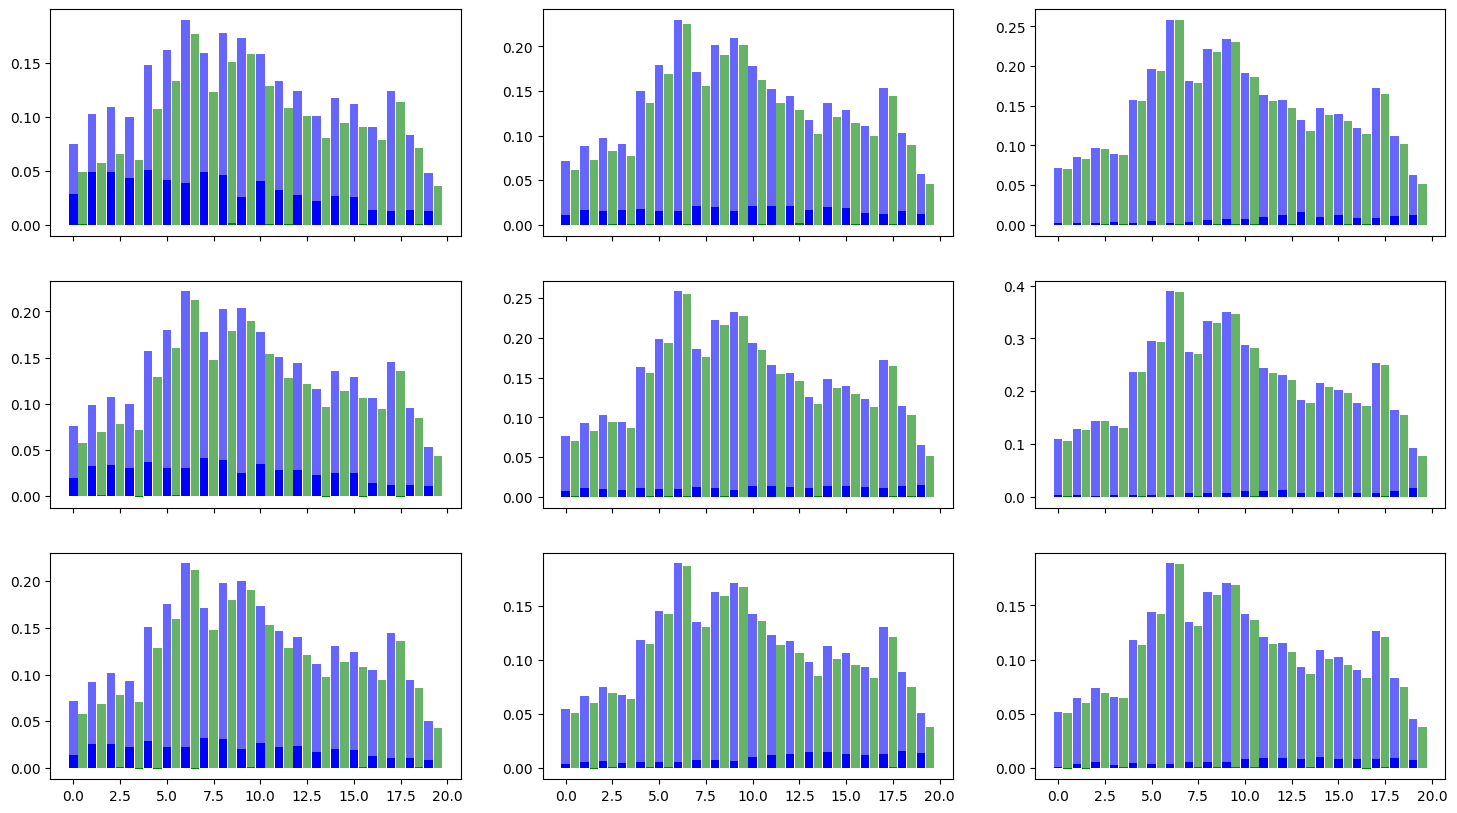

In [11]:
fig, axes = plt.subplots(3,3, figsize=(18,10), sharex=True)
x_idx = list(range(len(layer_names_resnet18)))
width = 0.45
alpha_biased = 0.6
alpha_debiased = 1.0
errorbar_alpha = 0.4
offset = 0.5

for i, layer_name in enumerate(layer_names_resnet18):

    resnet_idx = i

    # V1 -  CKA biased
    cka_biased = 0 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_V1_resnet_orig[0, cka_biased, resnet_idx], sub2_fMRI_V1_resnet_orig[0, cka_biased, resnet_idx], sub3_fMRI_V1_resnet_orig[0, cka_biased, resnet_idx]])
    fMRI_V1_CKA_biased_orig_m, fMRI_V1_CKA_biased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V1_CKA_biased_orig_h = fMRI_V1_CKA_biased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_V1_resnet_rand[:, cka_biased, resnet_idx], sub2_fMRI_V1_resnet_rand[:, cka_biased, resnet_idx], sub3_fMRI_V1_resnet_rand[:, cka_biased, resnet_idx]])
    fMRI_V1_CKA_biased_rand_m, fMRI_V1_CKA_biased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V1_CKA_biased_rand_h = fMRI_V1_CKA_biased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_V1_resnet_shuf[:, cka_biased, resnet_idx], sub2_fMRI_V1_resnet_shuf[:, cka_biased, resnet_idx], sub3_fMRI_V1_resnet_shuf[:, cka_biased, resnet_idx]])
    fMRI_V1_CKA_biased_shuf_m, fMRI_V1_CKA_biased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V1_CKA_biased_shuf_h = fMRI_V1_CKA_biased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    # V1 - CKA debiased
    cka_biased = 1 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_V1_resnet_orig[0, cka_biased, resnet_idx], sub2_fMRI_V1_resnet_orig[0, cka_biased, resnet_idx], sub3_fMRI_V1_resnet_orig[0, cka_biased, resnet_idx]])
    fMRI_V1_CKA_debiased_orig_m, fMRI_V1_CKA_debiased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V1_CKA_debiased_orig_h = fMRI_V1_CKA_debiased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_V1_resnet_rand[:, cka_biased, resnet_idx], sub2_fMRI_V1_resnet_rand[:, cka_biased, resnet_idx], sub3_fMRI_V1_resnet_rand[:, cka_biased, resnet_idx]])
    fMRI_V1_CKA_debiased_rand_m, fMRI_V1_CKA_debiased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V1_CKA_debiased_rand_h = fMRI_V1_CKA_debiased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_V1_resnet_shuf[:, cka_biased, resnet_idx], sub2_fMRI_V1_resnet_shuf[:, cka_biased, resnet_idx], sub3_fMRI_V1_resnet_shuf[:, cka_biased, resnet_idx]])
    fMRI_V1_CKA_debiased_shuf_m, fMRI_V1_CKA_debiased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V1_CKA_debiased_shuf_h = fMRI_V1_CKA_debiased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1) 

    #axes[0].bar(x_idx[i]-.2, fMRI_V2_CKA_biased_rand_m, color='red', width=width, alpha=alpha_biased)
    axes[0,0].bar(x_idx[i],    fMRI_V1_CKA_biased_orig_m, color='blue', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i], fMRI_V2_CKA_biased_orig_m, yerr=fMRI_V2_CKA_biased_orig_h, color='blue', alpha=errorbar_alpha)
    axes[0,0].bar(x_idx[i]+offset, fMRI_V1_CKA_biased_shuf_m, color='green', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i]+offset, fMRI_V2_CKA_biased_shuf_m, yerr=fMRI_V2_CKA_biased_orig_h, color='green', alpha=errorbar_alpha)
    #axes[0].bar(x_idx[i]-.2, fMRI_V2_CKA_debiased_rand_m, color='red', width=width, alpha=alpha_debiased)
    axes[0,0].bar(x_idx[i],    fMRI_V1_CKA_debiased_orig_m, color='blue', width=width, alpha=alpha_debiased)
    #axes[0].errorbar(x_idx[i], fMRI_V2_CKA_debiased_orig_m, yerr=fMRI_V2_CKA_debiased_orig_h, color='blue', alpha=errorbar_alpha)
    axes[0,0].bar(x_idx[i]+offset, fMRI_V1_CKA_debiased_shuf_m, color='green', width=width, alpha=alpha_debiased)

    # V2-  CKA biased
    cka_biased = 0 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_V2_resnet_orig[0, cka_biased, resnet_idx], sub2_fMRI_V2_resnet_orig[0, cka_biased, resnet_idx], sub3_fMRI_V2_resnet_orig[0, cka_biased, resnet_idx]])
    fMRI_V2_CKA_biased_orig_m, fMRI_V2_CKA_biased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V2_CKA_biased_orig_h = fMRI_V2_CKA_biased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_V2_resnet_rand[:, cka_biased, resnet_idx], sub2_fMRI_V2_resnet_rand[:, cka_biased, resnet_idx], sub3_fMRI_V2_resnet_rand[:, cka_biased, resnet_idx]])
    fMRI_V2_CKA_biased_rand_m, fMRI_V2_CKA_biased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V2_CKA_biased_rand_h = fMRI_V2_CKA_biased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_V2_resnet_shuf[:, cka_biased, resnet_idx], sub2_fMRI_V2_resnet_shuf[:, cka_biased, resnet_idx], sub3_fMRI_V2_resnet_shuf[:, cka_biased, resnet_idx]])
    fMRI_V2_CKA_biased_shuf_m, fMRI_V2_CKA_biased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V2_CKA_biased_shuf_h = fMRI_V2_CKA_biased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    # V2 - CKA debiased
    cka_biased = 1 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_V2_resnet_orig[0, cka_biased, resnet_idx], sub2_fMRI_V2_resnet_orig[0, cka_biased, resnet_idx], sub3_fMRI_V2_resnet_orig[0, cka_biased, resnet_idx]])
    fMRI_V2_CKA_debiased_orig_m, fMRI_V2_CKA_debiased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V2_CKA_debiased_orig_h = fMRI_V2_CKA_debiased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_V2_resnet_rand[:, cka_biased, resnet_idx], sub2_fMRI_V2_resnet_rand[:, cka_biased, resnet_idx], sub3_fMRI_V2_resnet_rand[:, cka_biased, resnet_idx]])
    fMRI_V2_CKA_debiased_rand_m, fMRI_V2_CKA_debiased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V2_CKA_debiased_rand_h = fMRI_V2_CKA_debiased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_V2_resnet_shuf[:, cka_biased, resnet_idx], sub2_fMRI_V2_resnet_shuf[:, cka_biased, resnet_idx], sub3_fMRI_V2_resnet_shuf[:, cka_biased, resnet_idx]])
    fMRI_V2_CKA_debiased_shuf_m, fMRI_V2_CKA_debiased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V2_CKA_debiased_shuf_h = fMRI_V2_CKA_debiased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1) 

    #axes[0].bar(x_idx[i]-.2, fMRI_V2_CKA_biased_rand_m, color='red', width=width, alpha=alpha_biased)
    axes[1,0].bar(x_idx[i],    fMRI_V2_CKA_biased_orig_m, color='blue', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i], fMRI_V2_CKA_biased_orig_m, yerr=fMRI_V2_CKA_biased_orig_h, color='blue', alpha=errorbar_alpha)
    axes[1,0].bar(x_idx[i]+offset, fMRI_V2_CKA_biased_shuf_m, color='green', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i]+offset, fMRI_V2_CKA_biased_shuf_m, yerr=fMRI_V2_CKA_biased_orig_h, color='green', alpha=errorbar_alpha)
    #axes[0].bar(x_idx[i]-.2, fMRI_V2_CKA_debiased_rand_m, color='red', width=width, alpha=alpha_debiased)
    axes[1,0].bar(x_idx[i],    fMRI_V2_CKA_debiased_orig_m, color='blue', width=width, alpha=alpha_debiased)
    #axes[0].errorbar(x_idx[i], fMRI_V2_CKA_debiased_orig_m, yerr=fMRI_V2_CKA_debiased_orig_h, color='blue', alpha=errorbar_alpha)
    axes[1,0].bar(x_idx[i]+offset, fMRI_V2_CKA_debiased_shuf_m, color='green', width=width, alpha=alpha_debiased)

    # V3  CKA biased
    cka_biased = 0 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_V3_resnet_orig[0, cka_biased, resnet_idx], sub2_fMRI_V3_resnet_orig[0, cka_biased, resnet_idx], sub3_fMRI_V3_resnet_orig[0, cka_biased, resnet_idx]])
    fMRI_V3_CKA_biased_orig_m, fMRI_V3_CKA_biased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V3_CKA_biased_orig_h = fMRI_V3_CKA_biased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_V3_resnet_rand[:, cka_biased, resnet_idx], sub2_fMRI_V3_resnet_rand[:, cka_biased, resnet_idx], sub3_fMRI_V3_resnet_rand[:, cka_biased, resnet_idx]])
    fMRI_V3_CKA_biased_rand_m, fMRI_V3_CKA_biased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V3_CKA_biased_rand_h = fMRI_V3_CKA_biased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_V3_resnet_shuf[:, cka_biased, resnet_idx], sub2_fMRI_V3_resnet_shuf[:, cka_biased, resnet_idx], sub3_fMRI_V3_resnet_shuf[:, cka_biased, resnet_idx]])
    fMRI_V3_CKA_biased_shuf_m, fMRI_V3_CKA_biased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V3_CKA_biased_shuf_h = fMRI_V3_CKA_biased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    # hV4 - CKA debiased
    cka_biased = 1 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_V3_resnet_orig[0, cka_biased, resnet_idx], sub2_fMRI_V3_resnet_orig[0, cka_biased, resnet_idx], sub3_fMRI_V3_resnet_orig[0, cka_biased, resnet_idx]])
    fMRI_V3_CKA_debiased_orig_m, fMRI_V3_CKA_debiased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V3_CKA_debiased_orig_h = fMRI_V3_CKA_debiased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_V3_resnet_rand[:, cka_biased, resnet_idx], sub2_fMRI_V3_resnet_rand[:, cka_biased, resnet_idx], sub3_fMRI_V3_resnet_rand[:, cka_biased, resnet_idx]])
    fMRI_V3_CKA_debiased_rand_m, fMRI_V3_CKA_debiased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V3_CKA_debiased_rand_h = fMRI_V3_CKA_debiased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_V3_resnet_shuf[:, cka_biased, resnet_idx], sub2_fMRI_V3_resnet_shuf[:, cka_biased, resnet_idx], sub3_fMRI_V3_resnet_shuf[:, cka_biased, resnet_idx]])
    fMRI_V3_CKA_debiased_shuf_m, fMRI_V3_CKA_debiased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V3_CKA_debiased_shuf_h = fMRI_V3_CKA_debiased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1) 

    #axes[0].bar(x_idx[i]-.2, fMRI_hV4_CKA_biased_rand_m, color='red', width=width, alpha=alpha_biased)
    axes[2,0].bar(x_idx[i],    fMRI_V3_CKA_biased_orig_m, color='blue', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i], fMRI_hV4_CKA_biased_orig_m, yerr=fMRI_hV4_CKA_biased_orig_h, color='blue', alpha=errorbar_alpha)
    axes[2,0].bar(x_idx[i]+offset, fMRI_V3_CKA_biased_shuf_m, color='green', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i]+offset, fMRI_hV4_CKA_biased_shuf_m, yerr=fMRI_hV4_CKA_biased_orig_h, color='green', alpha=errorbar_alpha)
    #axes[0].bar(x_idx[i]-.2, fMRI_hV4_CKA_debiased_rand_m, color='red', width=width, alpha=alpha_debiased)
    axes[2,0].bar(x_idx[i],    fMRI_V3_CKA_debiased_orig_m, color='blue', width=width, alpha=alpha_debiased)
    #axes[0].errorbar(x_idx[i], fMRI_hV4_CKA_debiased_orig_m, yerr=fMRI_hV4_CKA_debiased_orig_h, color='blue', alpha=errorbar_alpha)
    axes[2,0].bar(x_idx[i]+offset, fMRI_V3_CKA_debiased_shuf_m, color='green', width=width, alpha=alpha_debiased)

       # hV4-  CKA biased
    cka_biased = 0 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_hV4_resnet_orig[0, cka_biased, resnet_idx], sub2_fMRI_hV4_resnet_orig[0, cka_biased, resnet_idx], sub3_fMRI_hV4_resnet_orig[0, cka_biased, resnet_idx]])
    fMRI_hV4_CKA_biased_orig_m, fMRI_hV4_CKA_biased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_hV4_CKA_biased_orig_h = fMRI_hV4_CKA_biased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_hV4_resnet_rand[:, cka_biased, resnet_idx], sub2_fMRI_hV4_resnet_rand[:, cka_biased, resnet_idx], sub3_fMRI_hV4_resnet_rand[:, cka_biased, resnet_idx]])
    fMRI_hV4_CKA_biased_rand_m, fMRI_hV4_CKA_biased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_hV4_CKA_biased_rand_h = fMRI_hV4_CKA_biased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_hV4_resnet_shuf[:, cka_biased, resnet_idx], sub2_fMRI_hV4_resnet_shuf[:, cka_biased, resnet_idx], sub3_fMRI_hV4_resnet_shuf[:, cka_biased, resnet_idx]])
    fMRI_hV4_CKA_biased_shuf_m, fMRI_hV4_CKA_biased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_hV4_CKA_biased_shuf_h = fMRI_hV4_CKA_biased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    # hV4 - CKA debiased
    cka_biased = 1 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_hV4_resnet_orig[0, cka_biased, resnet_idx], sub2_fMRI_hV4_resnet_orig[0, cka_biased, resnet_idx], sub3_fMRI_hV4_resnet_orig[0, cka_biased, resnet_idx]])
    fMRI_hV4_CKA_debiased_orig_m, fMRI_hV4_CKA_debiased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_hV4_CKA_debiased_orig_h = fMRI_hV4_CKA_debiased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_hV4_resnet_rand[:, cka_biased, resnet_idx], sub2_fMRI_hV4_resnet_rand[:, cka_biased, resnet_idx], sub3_fMRI_hV4_resnet_rand[:, cka_biased, resnet_idx]])
    fMRI_hV4_CKA_debiased_rand_m, fMRI_hV4_CKA_debiased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_hV4_CKA_debiased_rand_h = fMRI_hV4_CKA_debiased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_hV4_resnet_shuf[:, cka_biased, resnet_idx], sub2_fMRI_hV4_resnet_shuf[:, cka_biased, resnet_idx], sub3_fMRI_hV4_resnet_shuf[:, cka_biased, resnet_idx]])
    fMRI_hV4_CKA_debiased_shuf_m, fMRI_hV4_CKA_debiased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_hV4_CKA_debiased_shuf_h = fMRI_hV4_CKA_debiased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1) 

    #axes[0].bar(x_idx[i]-.2, fMRI_hV4_CKA_biased_rand_m, color='red', width=width, alpha=alpha_biased)
    axes[0,1].bar(x_idx[i],    fMRI_hV4_CKA_biased_orig_m, color='blue', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i], fMRI_hV4_CKA_biased_orig_m, yerr=fMRI_hV4_CKA_biased_orig_h, color='blue', alpha=errorbar_alpha)
    axes[0,1].bar(x_idx[i]+offset, fMRI_hV4_CKA_biased_shuf_m, color='green', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i]+offset, fMRI_hV4_CKA_biased_shuf_m, yerr=fMRI_hV4_CKA_biased_orig_h, color='green', alpha=errorbar_alpha)
    #axes[0].bar(x_idx[i]-.2, fMRI_hV4_CKA_debiased_rand_m, color='red', width=width, alpha=alpha_debiased)
    axes[0,1].bar(x_idx[i],    fMRI_hV4_CKA_debiased_orig_m, color='blue', width=width, alpha=alpha_debiased)
    #axes[0].errorbar(x_idx[i], fMRI_hV4_CKA_debiased_orig_m, yerr=fMRI_hV4_CKA_debiased_orig_h, color='blue', alpha=errorbar_alpha)
    axes[0,1].bar(x_idx[i]+offset, fMRI_hV4_CKA_debiased_shuf_m, color='green', width=width, alpha=alpha_debiased)

    # VO1-  CKA biased
    cka_biased = 0 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_VO1_resnet_orig[0, cka_biased, resnet_idx], sub2_fMRI_VO1_resnet_orig[0, cka_biased, resnet_idx], sub3_fMRI_VO1_resnet_orig[0, cka_biased, resnet_idx]])
    fMRI_VO1_CKA_biased_orig_m, fMRI_VO1_CKA_biased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_VO1_CKA_biased_orig_h = fMRI_VO1_CKA_biased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_VO1_resnet_rand[:, cka_biased, resnet_idx], sub2_fMRI_VO1_resnet_rand[:, cka_biased, resnet_idx], sub3_fMRI_VO1_resnet_rand[:, cka_biased, resnet_idx]])
    fMRI_VO1_CKA_biased_rand_m, fMRI_VO1_CKA_biased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_VO1_CKA_biased_rand_h = fMRI_VO1_CKA_biased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_VO1_resnet_shuf[:, cka_biased, resnet_idx], sub2_fMRI_VO1_resnet_shuf[:, cka_biased, resnet_idx], sub3_fMRI_VO1_resnet_shuf[:, cka_biased, resnet_idx]])
    fMRI_VO1_CKA_biased_shuf_m, fMRI_VO1_CKA_biased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_VO1_CKA_biased_shuf_h = fMRI_VO1_CKA_biased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    # VO1 - CKA debiased
    cka_biased = 1 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_VO1_resnet_orig[0, cka_biased, resnet_idx], sub2_fMRI_VO1_resnet_orig[0, cka_biased, resnet_idx], sub3_fMRI_VO1_resnet_orig[0, cka_biased, resnet_idx]])
    fMRI_VO1_CKA_debiased_orig_m, fMRI_VO1_CKA_debiased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_VO1_CKA_debiased_orig_h = fMRI_VO1_CKA_debiased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_VO1_resnet_rand[:, cka_biased, resnet_idx], sub2_fMRI_VO1_resnet_rand[:, cka_biased, resnet_idx], sub3_fMRI_VO1_resnet_rand[:, cka_biased, resnet_idx]])
    fMRI_VO1_CKA_debiased_rand_m, fMRI_VO1_CKA_debiased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_VO1_CKA_debiased_rand_h = fMRI_VO1_CKA_debiased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_VO1_resnet_shuf[:, cka_biased, resnet_idx], sub2_fMRI_VO1_resnet_shuf[:, cka_biased, resnet_idx], sub3_fMRI_VO1_resnet_shuf[:, cka_biased, resnet_idx]])
    fMRI_VO1_CKA_debiased_shuf_m, fMRI_VO1_CKA_debiased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_VO1_CKA_debiased_shuf_h = fMRI_VO1_CKA_debiased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1) 

    #axes[0].bar(x_idx[i]-.2, fMRI_TO1_CKA_biased_rand_m, color='red', width=width, alpha=alpha_biased)
    axes[1,1].bar(x_idx[i],    fMRI_VO1_CKA_biased_orig_m, color='blue', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i], fMRI_TO1_CKA_biased_orig_m, yerr=fMRI_TO1_CKA_biased_orig_h, color='blue', alpha=errorbar_alpha)
    axes[1,1].bar(x_idx[i]+offset, fMRI_VO1_CKA_biased_shuf_m, color='green', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i]+offset, fMRI_TO1_CKA_biased_shuf_m, yerr=fMRI_TO1_CKA_biased_orig_h, color='green', alpha=errorbar_alpha)
    #axes[0].bar(x_idx[i]-.2, fMRI_TO1_CKA_debiased_rand_m, color='red', width=width, alpha=alpha_debiased)
    axes[1,1].bar(x_idx[i],    fMRI_VO1_CKA_debiased_orig_m, color='blue', width=width, alpha=alpha_debiased)
    #axes[0].errorbar(x_idx[i], fMRI_TO1_CKA_debiased_orig_m, yerr=fMRI_TO1_CKA_debiased_orig_h, color='blue', alpha=errorbar_alpha)
    axes[1,1].bar(x_idx[i]+offset, fMRI_VO1_CKA_debiased_shuf_m, color='green', width=width, alpha=alpha_debiased)

   # TO1-  CKA biased
    cka_biased = 0 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_TO1_resnet_orig[0, cka_biased, resnet_idx], sub2_fMRI_TO1_resnet_orig[0, cka_biased, resnet_idx], sub3_fMRI_TO1_resnet_orig[0, cka_biased, resnet_idx]])
    fMRI_TO1_CKA_biased_orig_m, fMRI_TO1_CKA_biased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_TO1_CKA_biased_orig_h = fMRI_TO1_CKA_biased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_TO1_resnet_rand[:, cka_biased, resnet_idx], sub2_fMRI_TO1_resnet_rand[:, cka_biased, resnet_idx], sub3_fMRI_TO1_resnet_rand[:, cka_biased, resnet_idx]])
    fMRI_TO1_CKA_biased_rand_m, fMRI_TO1_CKA_biased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_TO1_CKA_biased_rand_h = fMRI_TO1_CKA_biased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_TO1_resnet_shuf[:, cka_biased, resnet_idx], sub2_fMRI_TO1_resnet_shuf[:, cka_biased, resnet_idx], sub3_fMRI_TO1_resnet_shuf[:, cka_biased, resnet_idx]])
    fMRI_TO1_CKA_biased_shuf_m, fMRI_TO1_CKA_biased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_TO1_CKA_biased_shuf_h = fMRI_TO1_CKA_biased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    # TO1 - CKA debiased
    cka_biased = 1 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_TO1_resnet_orig[0, cka_biased, resnet_idx], sub2_fMRI_TO1_resnet_orig[0, cka_biased, resnet_idx], sub3_fMRI_TO1_resnet_orig[0, cka_biased, resnet_idx]])
    fMRI_TO1_CKA_debiased_orig_m, fMRI_TO1_CKA_debiased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_TO1_CKA_debiased_orig_h = fMRI_TO1_CKA_debiased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_TO1_resnet_rand[:, cka_biased, resnet_idx], sub2_fMRI_TO1_resnet_rand[:, cka_biased, resnet_idx], sub3_fMRI_TO1_resnet_rand[:, cka_biased, resnet_idx]])
    fMRI_TO1_CKA_debiased_rand_m, fMRI_TO1_CKA_debiased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_TO1_CKA_debiased_rand_h = fMRI_TO1_CKA_debiased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_TO1_resnet_shuf[:, cka_biased, resnet_idx], sub2_fMRI_TO1_resnet_shuf[:, cka_biased, resnet_idx], sub3_fMRI_TO1_resnet_shuf[:, cka_biased, resnet_idx]])
    fMRI_TO1_CKA_debiased_shuf_m, fMRI_TO1_CKA_debiased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_TO1_CKA_debiased_shuf_h = fMRI_TO1_CKA_debiased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1) 

    #axes[0].bar(x_idx[i]-.2, fMRI_TO1_CKA_biased_rand_m, color='red', width=width, alpha=alpha_biased)
    axes[2,1].bar(x_idx[i],    fMRI_TO1_CKA_biased_orig_m, color='blue', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i], fMRI_TO1_CKA_biased_orig_m, yerr=fMRI_TO1_CKA_biased_orig_h, color='blue', alpha=errorbar_alpha)
    axes[2,1].bar(x_idx[i]+offset, fMRI_TO1_CKA_biased_shuf_m, color='green', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i]+offset, fMRI_TO1_CKA_biased_shuf_m, yerr=fMRI_TO1_CKA_biased_orig_h, color='green', alpha=errorbar_alpha)
    #axes[0].bar(x_idx[i]-.2, fMRI_TO1_CKA_debiased_rand_m, color='red', width=width, alpha=alpha_debiased)
    axes[2,1].bar(x_idx[i],    fMRI_TO1_CKA_debiased_orig_m, color='blue', width=width, alpha=alpha_debiased)
    #axes[0].errorbar(x_idx[i], fMRI_TO1_CKA_debiased_orig_m, yerr=fMRI_TO1_CKA_debiased_orig_h, color='blue', alpha=errorbar_alpha)
    axes[2,1].bar(x_idx[i]+offset, fMRI_TO1_CKA_debiased_shuf_m, color='green', width=width, alpha=alpha_debiased)

    # lFFA-  CKA biased
    cka_biased = 0 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_lFFA_resnet_orig[0, cka_biased, resnet_idx], sub2_fMRI_lFFA_resnet_orig[0, cka_biased, resnet_idx], sub3_fMRI_lFFA_resnet_orig[0, cka_biased, resnet_idx]])
    fMRI_lFFA_CKA_biased_orig_m, fMRI_lFFA_CKA_biased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lFFA_CKA_biased_orig_h = fMRI_lFFA_CKA_biased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_lFFA_resnet_rand[:, cka_biased, resnet_idx], sub2_fMRI_lFFA_resnet_rand[:, cka_biased, resnet_idx], sub3_fMRI_lFFA_resnet_rand[:, cka_biased, resnet_idx]])
    fMRI_lFFA_CKA_biased_rand_m, fMRI_lFFA_CKA_biased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lFFA_CKA_biased_rand_h = fMRI_lFFA_CKA_biased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_lFFA_resnet_shuf[:, cka_biased, resnet_idx], sub2_fMRI_lFFA_resnet_shuf[:, cka_biased, resnet_idx], sub3_fMRI_lFFA_resnet_shuf[:, cka_biased, resnet_idx]])
    fMRI_lFFA_CKA_biased_shuf_m, fMRI_lFFA_CKA_biased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lFFA_CKA_biased_shuf_h = fMRI_lFFA_CKA_biased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    # lFFA - CKA debiased
    cka_biased = 1 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_lFFA_resnet_orig[0, cka_biased, resnet_idx], sub2_fMRI_lFFA_resnet_orig[0, cka_biased, resnet_idx], sub3_fMRI_lFFA_resnet_orig[0, cka_biased, resnet_idx]])
    fMRI_lFFA_CKA_debiased_orig_m, fMRI_lFFA_CKA_debiased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lFFA_CKA_debiased_orig_h = fMRI_lFFA_CKA_debiased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_lFFA_resnet_rand[:, cka_biased, resnet_idx], sub2_fMRI_lFFA_resnet_rand[:, cka_biased, resnet_idx], sub3_fMRI_lFFA_resnet_rand[:, cka_biased, resnet_idx]])
    fMRI_lFFA_CKA_debiased_rand_m, fMRI_lFFA_CKA_debiased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lFFA_CKA_debiased_rand_h = fMRI_lFFA_CKA_debiased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_lFFA_resnet_shuf[:, cka_biased, resnet_idx], sub2_fMRI_lFFA_resnet_shuf[:, cka_biased, resnet_idx], sub3_fMRI_lFFA_resnet_shuf[:, cka_biased, resnet_idx]])
    fMRI_lFFA_CKA_debiased_shuf_m, fMRI_lFFA_CKA_debiased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lFFA_CKA_debiased_shuf_h = fMRI_lFFA_CKA_debiased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1) 

    #axes[0].bar(x_idx[i]-.2, fMRI_rFFA_CKA_biased_rand_m, color='red', width=width, alpha=alpha_biased)
    axes[0,2].bar(x_idx[i],    fMRI_lFFA_CKA_biased_orig_m, color='blue', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i], fMRI_rFFA_CKA_biased_orig_m, yerr=fMRI_rFFA_CKA_biased_orig_h, color='blue', alpha=errorbar_alpha)
    axes[0,2].bar(x_idx[i]+offset, fMRI_lFFA_CKA_biased_shuf_m, color='green', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i]+offset, fMRI_rFFA_CKA_biased_shuf_m, yerr=fMRI_rFFA_CKA_biased_orig_h, color='green', alpha=errorbar_alpha)
    #axes[0].bar(x_idx[i]-.2, fMRI_rFFA_CKA_debiased_rand_m, color='red', width=width, alpha=alpha_debiased)
    axes[0,2].bar(x_idx[i],    fMRI_lFFA_CKA_debiased_orig_m, color='blue', width=width, alpha=alpha_debiased)
    #axes[0].errorbar(x_idx[i], fMRI_rFFA_CKA_debiased_orig_m, yerr=fMRI_rFFA_CKA_debiased_orig_h, color='blue', alpha=errorbar_alpha)
    axes[0,2].bar(x_idx[i]+offset, fMRI_lFFA_CKA_debiased_shuf_m, color='green', width=width, alpha=alpha_debiased)

        # lPPA-  CKA biased
    cka_biased = 0 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_lPPA_resnet_orig[0, cka_biased, resnet_idx], sub2_fMRI_lPPA_resnet_orig[0, cka_biased, resnet_idx], sub3_fMRI_lPPA_resnet_orig[0, cka_biased, resnet_idx]])
    fMRI_lPPA_CKA_biased_orig_m, fMRI_lPPA_CKA_biased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lPPA_CKA_biased_orig_h = fMRI_lPPA_CKA_biased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_lPPA_resnet_rand[:, cka_biased, resnet_idx], sub2_fMRI_lPPA_resnet_rand[:, cka_biased, resnet_idx], sub3_fMRI_lPPA_resnet_rand[:, cka_biased, resnet_idx]])
    fMRI_lPPA_CKA_biased_rand_m, fMRI_lPPA_CKA_biased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lPPA_CKA_biased_rand_h = fMRI_lPPA_CKA_biased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_lPPA_resnet_shuf[:, cka_biased, resnet_idx], sub2_fMRI_lPPA_resnet_shuf[:, cka_biased, resnet_idx], sub3_fMRI_lPPA_resnet_shuf[:, cka_biased, resnet_idx]])
    fMRI_lPPA_CKA_biased_shuf_m, fMRI_lPPA_CKA_biased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lPPA_CKA_biased_shuf_h = fMRI_lPPA_CKA_biased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    # lPPA - CKA debiased
    cka_biased = 1 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_lPPA_resnet_orig[0, cka_biased, resnet_idx], sub2_fMRI_lPPA_resnet_orig[0, cka_biased, resnet_idx], sub3_fMRI_lPPA_resnet_orig[0, cka_biased, resnet_idx]])
    fMRI_lPPA_CKA_debiased_orig_m, fMRI_lPPA_CKA_debiased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lPPA_CKA_debiased_orig_h = fMRI_lPPA_CKA_debiased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_lPPA_resnet_rand[:, cka_biased, resnet_idx], sub2_fMRI_lPPA_resnet_rand[:, cka_biased, resnet_idx], sub3_fMRI_lPPA_resnet_rand[:, cka_biased, resnet_idx]])
    fMRI_lPPA_CKA_debiased_rand_m, fMRI_lPPA_CKA_debiased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lPPA_CKA_debiased_rand_h = fMRI_lPPA_CKA_debiased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_lPPA_resnet_shuf[:, cka_biased, resnet_idx], sub2_fMRI_lPPA_resnet_shuf[:, cka_biased, resnet_idx], sub3_fMRI_lPPA_resnet_shuf[:, cka_biased, resnet_idx]])
    fMRI_lPPA_CKA_debiased_shuf_m, fMRI_lPPA_CKA_debiased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lPPA_CKA_debiased_shuf_h = fMRI_lPPA_CKA_debiased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1) 

    #axes[0].bar(x_idx[i]-.2, fMRI_lPPA_CKA_biased_rand_m, color='red', width=width, alpha=alpha_biased)
    axes[1,2].bar(x_idx[i],    fMRI_lPPA_CKA_biased_orig_m, color='blue', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i], fMRI_lPPA_CKA_biased_orig_m, yerr=fMRI_lPPA_CKA_biased_orig_h, color='blue', alpha=errorbar_alpha)
    axes[1,2].bar(x_idx[i]+offset, fMRI_lPPA_CKA_biased_shuf_m, color='green', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i]+offset, fMRI_lPPA_CKA_biased_shuf_m, yerr=fMRI_lPPA_CKA_biased_orig_h, color='green', alpha=errorbar_alpha)
    #axes[0].bar(x_idx[i]-.2, fMRI_lPPA_CKA_debiased_rand_m, color='red', width=width, alpha=alpha_debiased)
    axes[1,2].bar(x_idx[i],    fMRI_lPPA_CKA_debiased_orig_m, color='blue', width=width, alpha=alpha_debiased)
    #axes[0].errorbar(x_idx[i], fMRI_lPPA_CKA_debiased_orig_m, yerr=fMRI_lPPA_CKA_debiased_orig_h, color='blue', alpha=errorbar_alpha)
    axes[1,2].bar(x_idx[i]+offset, fMRI_lPPA_CKA_debiased_shuf_m, color='green', width=width, alpha=alpha_debiased)

    # lEBA-  CKA biased
    cka_biased = 0 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_lEBA_resnet_orig[0, cka_biased, resnet_idx], sub2_fMRI_lEBA_resnet_orig[0, cka_biased, resnet_idx], sub3_fMRI_lEBA_resnet_orig[0, cka_biased, resnet_idx]])
    fMRI_lEBA_CKA_biased_orig_m, fMRI_lEBA_CKA_biased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lEBA_CKA_biased_orig_h = fMRI_lEBA_CKA_biased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_lEBA_resnet_rand[:, cka_biased, resnet_idx], sub2_fMRI_lEBA_resnet_rand[:, cka_biased, resnet_idx], sub3_fMRI_lEBA_resnet_rand[:, cka_biased, resnet_idx]])
    fMRI_lEBA_CKA_biased_rand_m, fMRI_lEBA_CKA_biased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lEBA_CKA_biased_rand_h = fMRI_lEBA_CKA_biased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_lEBA_resnet_shuf[:, cka_biased, resnet_idx], sub2_fMRI_lEBA_resnet_shuf[:, cka_biased, resnet_idx], sub3_fMRI_lEBA_resnet_shuf[:, cka_biased, resnet_idx]])
    fMRI_lEBA_CKA_biased_shuf_m, fMRI_lEBA_CKA_biased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lEBA_CKA_biased_shuf_h = fMRI_lEBA_CKA_biased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    # rEBA - CKA debiased
    cka_biased = 1 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_lEBA_resnet_orig[0, cka_biased, resnet_idx], sub2_fMRI_lEBA_resnet_orig[0, cka_biased, resnet_idx], sub3_fMRI_lEBA_resnet_orig[0, cka_biased, resnet_idx]])
    fMRI_lEBA_CKA_debiased_orig_m, fMRI_lEBA_CKA_debiased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lEBA_CKA_debiased_orig_h = fMRI_lEBA_CKA_debiased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_lEBA_resnet_rand[:, cka_biased, resnet_idx], sub2_fMRI_lEBA_resnet_rand[:, cka_biased, resnet_idx], sub3_fMRI_lEBA_resnet_rand[:, cka_biased, resnet_idx]])
    fMRI_lEBA_CKA_debiased_rand_m, fMRI_lEBA_CKA_debiased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lEBA_CKA_debiased_rand_h = fMRI_lEBA_CKA_debiased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_lEBA_resnet_shuf[:, cka_biased, resnet_idx], sub2_fMRI_lEBA_resnet_shuf[:, cka_biased, resnet_idx], sub3_fMRI_lEBA_resnet_shuf[:, cka_biased, resnet_idx]])
    fMRI_lEBA_CKA_debiased_shuf_m, fMRI_lEBA_CKA_debiased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lEBA_CKA_debiased_shuf_h = fMRI_lEBA_CKA_debiased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1) 

    #axes[0].bar(x_idx[i]-.2, fMRI_rEBA_CKA_biased_rand_m, color='red', width=width, alpha=alpha_biased)
    axes[2,2].bar(x_idx[i],    fMRI_lEBA_CKA_biased_orig_m, color='blue', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i], fMRI_rEBA_CKA_biased_orig_m, yerr=fMRI_rEBA_CKA_biased_orig_h, color='blue', alpha=errorbar_alpha)
    axes[2,2].bar(x_idx[i]+offset, fMRI_lEBA_CKA_biased_shuf_m, color='green', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i]+offset, fMRI_rEBA_CKA_biased_shuf_m, yerr=fMRI_rEBA_CKA_biased_orig_h, color='green', alpha=errorbar_alpha)
    #axes[0].bar(x_idx[i]-.2, fMRI_rEBA_CKA_debiased_rand_m, color='red', width=width, alpha=alpha_debiased)
    axes[2,2].bar(x_idx[i],    fMRI_lEBA_CKA_debiased_orig_m, color='blue', width=width, alpha=alpha_debiased)
    #axes[0].errorbar(x_idx[i], fMRI_rEBA_CKA_debiased_orig_m, yerr=fMRI_rEBA_CKA_debiased_orig_h, color='blue', alpha=errorbar_alpha)
    axes[2,2].bar(x_idx[i]+offset, fMRI_lEBA_CKA_debiased_shuf_m, color='green', width=width, alpha=alpha_debiased)

x_tick = range(len(layer_names_resnet18_short))
#axes[0,2].set_xticks(x_tick, layer_names_resnet18_short);
#axes[1,2].set_xticks(x_tick, layer_names_resnet18_short);
#axes[2,2].set_xticks(x_tick, layer_names_resnet18_short);
#plt.xticks(rotation = 90);

plt.savefig('../results/figures/resnet_ROIs_shuffled.svg', format='svg')
    

# CORnet-S now

In [12]:
# V1
sub1_fMRI_V1_cornet_orig = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub01_V1_alignments_original_order.npy')
sub1_fMRI_V1_cornet_rand = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub01_V1_alignments_random_data.npy')
sub1_fMRI_V1_cornet_shuf = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub01_V1_alignments_shuffled_order.npy')

sub2_fMRI_V1_cornet_orig = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub02_V1_alignments_original_order.npy')
sub2_fMRI_V1_cornet_rand = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub02_V1_alignments_random_data.npy')
sub2_fMRI_V1_cornet_shuf = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub02_V1_alignments_shuffled_order.npy')

sub3_fMRI_V1_cornet_orig = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub03_V1_alignments_original_order.npy')
sub3_fMRI_V1_cornet_rand = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub03_V1_alignments_random_data.npy')
sub3_fMRI_V1_cornet_shuf = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub03_V1_alignments_shuffled_order.npy')

# V2
sub1_fMRI_V2_cornet_orig = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub01_V2_alignments_original_order.npy')
sub1_fMRI_V2_cornet_rand = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub01_V2_alignments_random_data.npy')
sub1_fMRI_V2_cornet_shuf = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub01_V2_alignments_shuffled_order.npy')

sub2_fMRI_V2_cornet_orig = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub02_V2_alignments_original_order.npy')
sub2_fMRI_V2_cornet_rand = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub02_V2_alignments_random_data.npy')
sub2_fMRI_V2_cornet_shuf = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub02_V2_alignments_shuffled_order.npy')

sub3_fMRI_V2_cornet_orig = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub03_V2_alignments_original_order.npy')
sub3_fMRI_V2_cornet_rand = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub03_V2_alignments_random_data.npy')
sub3_fMRI_V2_cornet_shuf = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub03_V2_alignments_shuffled_order.npy')

# V3
sub1_fMRI_V3_cornet_orig = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub01_V3_alignments_original_order.npy')
sub1_fMRI_V3_cornet_rand = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub01_V3_alignments_random_data.npy')
sub1_fMRI_V3_cornet_shuf = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub01_V3_alignments_shuffled_order.npy')

sub2_fMRI_V3_cornet_orig = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub02_V3_alignments_original_order.npy')
sub2_fMRI_V3_cornet_rand = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub02_V3_alignments_random_data.npy')
sub2_fMRI_V3_cornet_shuf = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub02_V3_alignments_shuffled_order.npy')

sub3_fMRI_V3_cornet_orig = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub03_V3_alignments_original_order.npy')
sub3_fMRI_V3_cornet_rand = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub03_V3_alignments_random_data.npy')
sub3_fMRI_V3_cornet_shuf = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub03_V3_alignments_shuffled_order.npy')

# hV4
sub1_fMRI_hV4_cornet_orig = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub01_hV4_alignments_original_order.npy')
sub1_fMRI_hV4_cornet_rand = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub01_hV4_alignments_random_data.npy')
sub1_fMRI_hV4_cornet_shuf = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub01_hV4_alignments_shuffled_order.npy')

sub2_fMRI_hV4_cornet_orig = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub02_hV4_alignments_original_order.npy')
sub2_fMRI_hV4_cornet_rand = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub02_hV4_alignments_random_data.npy')
sub2_fMRI_hV4_cornet_shuf = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub02_hV4_alignments_shuffled_order.npy')

sub3_fMRI_hV4_cornet_orig = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub03_hV4_alignments_original_order.npy')
sub3_fMRI_hV4_cornet_rand = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub03_hV4_alignments_random_data.npy')
sub3_fMRI_hV4_cornet_shuf = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub03_hV4_alignments_shuffled_order.npy')

# VO1
sub1_fMRI_VO1_cornet_orig = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub01_VO1_alignments_original_order.npy')
sub1_fMRI_VO1_cornet_rand = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub01_VO1_alignments_random_data.npy')
sub1_fMRI_VO1_cornet_shuf = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub01_VO1_alignments_shuffled_order.npy')

sub2_fMRI_VO1_cornet_orig = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub02_VO1_alignments_original_order.npy')
sub2_fMRI_VO1_cornet_rand = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub02_VO1_alignments_random_data.npy')
sub2_fMRI_VO1_cornet_shuf = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub02_VO1_alignments_shuffled_order.npy')

sub3_fMRI_VO1_cornet_orig = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub03_VO1_alignments_original_order.npy')
sub3_fMRI_VO1_cornet_rand = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub03_VO1_alignments_random_data.npy')
sub3_fMRI_VO1_cornet_shuf = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub03_VO1_alignments_shuffled_order.npy')

# TO1
sub1_fMRI_TO1_cornet_orig = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub01_TO1_alignments_original_order.npy')
sub1_fMRI_TO1_cornet_rand = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub01_TO1_alignments_random_data.npy')
sub1_fMRI_TO1_cornet_shuf = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub01_TO1_alignments_shuffled_order.npy')

sub2_fMRI_TO1_cornet_orig = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub02_TO1_alignments_original_order.npy')
sub2_fMRI_TO1_cornet_rand = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub02_TO1_alignments_random_data.npy')
sub2_fMRI_TO1_cornet_shuf = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub02_TO1_alignments_shuffled_order.npy')

sub3_fMRI_TO1_cornet_orig = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub03_TO1_alignments_original_order.npy')
sub3_fMRI_TO1_cornet_rand = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub03_TO1_alignments_random_data.npy')
sub3_fMRI_TO1_cornet_shuf = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub03_TO1_alignments_shuffled_order.npy')

# lEBA
sub1_fMRI_lEBA_cornet_orig = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub01_lEBA_alignments_original_order.npy')
sub1_fMRI_lEBA_cornet_rand = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub01_lEBA_alignments_random_data.npy')
sub1_fMRI_lEBA_cornet_shuf = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub01_lEBA_alignments_shuffled_order.npy')

sub2_fMRI_lEBA_cornet_orig = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub02_lEBA_alignments_original_order.npy')
sub2_fMRI_lEBA_cornet_rand = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub02_lEBA_alignments_random_data.npy')
sub2_fMRI_lEBA_cornet_shuf = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub02_lEBA_alignments_shuffled_order.npy')

sub3_fMRI_lEBA_cornet_orig = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub03_lEBA_alignments_original_order.npy')
sub3_fMRI_lEBA_cornet_rand = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub03_lEBA_alignments_random_data.npy')
sub3_fMRI_lEBA_cornet_shuf = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub03_lEBA_alignments_shuffled_order.npy')

# lFFA
sub1_fMRI_lFFA_cornet_orig = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub01_lFFA_alignments_original_order.npy')
sub1_fMRI_lFFA_cornet_rand = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub01_lFFA_alignments_random_data.npy')
sub1_fMRI_lFFA_cornet_shuf = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub01_lFFA_alignments_shuffled_order.npy')

sub2_fMRI_lFFA_cornet_orig = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub02_lFFA_alignments_original_order.npy')
sub2_fMRI_lFFA_cornet_rand = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub02_lFFA_alignments_random_data.npy')
sub2_fMRI_lFFA_cornet_shuf = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub02_lFFA_alignments_shuffled_order.npy')

sub3_fMRI_lFFA_cornet_orig = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub03_lFFA_alignments_original_order.npy')
sub3_fMRI_lFFA_cornet_rand = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub03_lFFA_alignments_random_data.npy')
sub3_fMRI_lFFA_cornet_shuf = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub03_lFFA_alignments_shuffled_order.npy')

# lPPA
sub1_fMRI_lPPA_cornet_orig = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub01_lPPA_alignments_original_order.npy')
sub1_fMRI_lPPA_cornet_rand = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub01_lPPA_alignments_random_data.npy')
sub1_fMRI_lPPA_cornet_shuf = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub01_lPPA_alignments_shuffled_order.npy')

sub2_fMRI_lPPA_cornet_orig = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub02_lPPA_alignments_original_order.npy')
sub2_fMRI_lPPA_cornet_rand = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub02_lPPA_alignments_random_data.npy')
sub2_fMRI_lPPA_cornet_shuf = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub02_lPPA_alignments_shuffled_order.npy')

sub3_fMRI_lPPA_cornet_orig = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub03_lPPA_alignments_original_order.npy')
sub3_fMRI_lPPA_cornet_rand = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub03_lPPA_alignments_random_data.npy')
sub3_fMRI_lPPA_cornet_shuf = np.load(data_dir / 'fMRI_results' / 'cornet-s_sub03_lPPA_alignments_shuffled_order.npy')

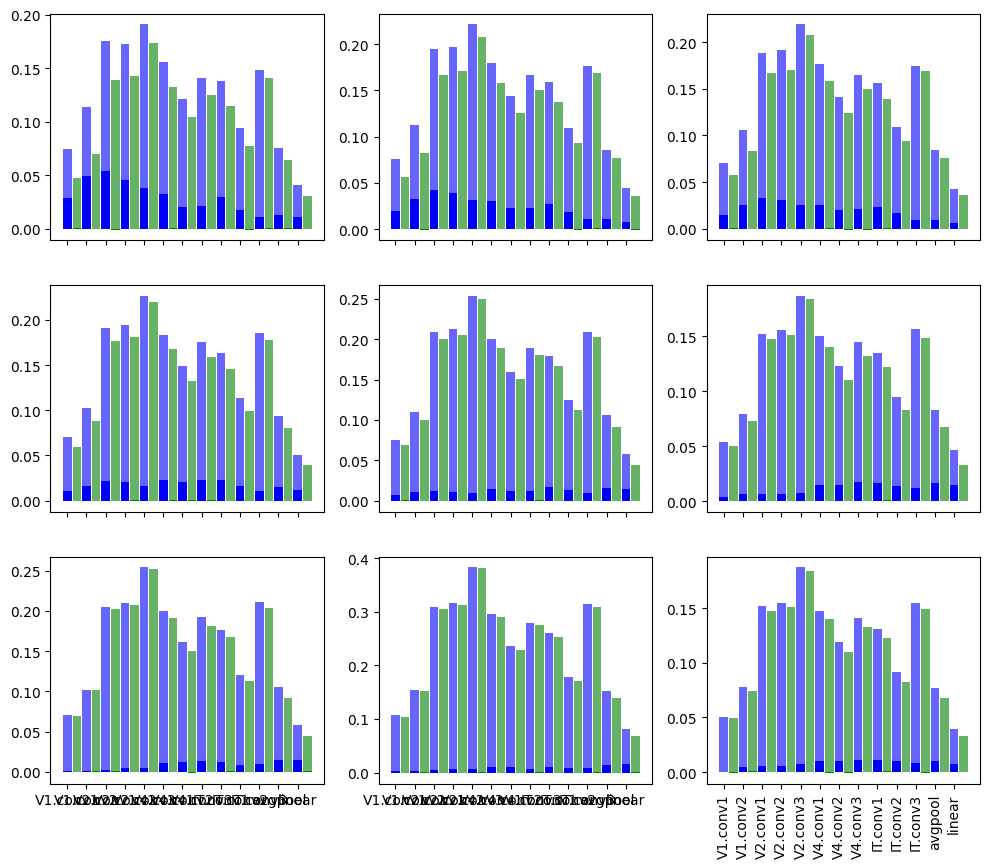

In [13]:
fig, axes = plt.subplots(3,3, figsize=(12,10), sharex=True)
x_idx = list(range(len(layer_names_cornet_s)))
width = 0.45
alpha_biased = 0.6
alpha_debiased = 1.0
errorbar_alpha = 0.4
offset = 0.5



for i, layer_name in enumerate(layer_names_cornet_s):

    cornet_idx = i

    # V1 -  CKA biased
    cka_biased = 0 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_V1_cornet_orig[0, cka_biased, cornet_idx], sub2_fMRI_V1_cornet_orig[0, cka_biased, cornet_idx], sub3_fMRI_V1_cornet_orig[0, cka_biased, cornet_idx]])
    fMRI_V1_CKA_biased_orig_m, fMRI_V1_CKA_biased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V1_CKA_biased_orig_h = fMRI_V1_CKA_biased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_V1_cornet_rand[:, cka_biased, cornet_idx], sub2_fMRI_V1_cornet_rand[:, cka_biased, cornet_idx], sub3_fMRI_V1_cornet_rand[:, cka_biased, cornet_idx]])
    fMRI_V1_CKA_biased_rand_m, fMRI_V1_CKA_biased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V1_CKA_biased_rand_h = fMRI_V1_CKA_biased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_V1_cornet_shuf[:, cka_biased, cornet_idx], sub2_fMRI_V1_cornet_shuf[:, cka_biased, cornet_idx], sub3_fMRI_V1_cornet_shuf[:, cka_biased, cornet_idx]])
    fMRI_V1_CKA_biased_shuf_m, fMRI_V1_CKA_biased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V1_CKA_biased_shuf_h = fMRI_V1_CKA_biased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    # V1 - CKA debiased
    cka_biased = 1 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_V1_cornet_orig[0, cka_biased, cornet_idx], sub2_fMRI_V1_cornet_orig[0, cka_biased, cornet_idx], sub3_fMRI_V1_cornet_orig[0, cka_biased, cornet_idx]])
    fMRI_V1_CKA_debiased_orig_m, fMRI_V1_CKA_debiased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V1_CKA_debiased_orig_h = fMRI_V1_CKA_debiased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_V1_cornet_rand[:, cka_biased, cornet_idx], sub2_fMRI_V1_cornet_rand[:, cka_biased, cornet_idx], sub3_fMRI_V1_cornet_rand[:, cka_biased, cornet_idx]])
    fMRI_V1_CKA_debiased_rand_m, fMRI_V1_CKA_debiased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V1_CKA_debiased_rand_h = fMRI_V1_CKA_debiased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_V1_cornet_shuf[:, cka_biased, cornet_idx], sub2_fMRI_V1_cornet_shuf[:, cka_biased, cornet_idx], sub3_fMRI_V1_cornet_shuf[:, cka_biased, cornet_idx]])
    fMRI_V1_CKA_debiased_shuf_m, fMRI_V1_CKA_debiased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V1_CKA_debiased_shuf_h = fMRI_V1_CKA_debiased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1) 

    #axes[0].bar(x_idx[i]-.2, fMRI_V2_CKA_biased_rand_m, color='red', width=width, alpha=alpha_biased)
    axes[0,0].bar(x_idx[i],    fMRI_V1_CKA_biased_orig_m, color='blue', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i], fMRI_V2_CKA_biased_orig_m, yerr=fMRI_V2_CKA_biased_orig_h, color='blue', alpha=errorbar_alpha)
    axes[0,0].bar(x_idx[i]+offset, fMRI_V1_CKA_biased_shuf_m, color='green', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i]+offset, fMRI_V2_CKA_biased_shuf_m, yerr=fMRI_V2_CKA_biased_orig_h, color='green', alpha=errorbar_alpha)
    #axes[0].bar(x_idx[i]-.2, fMRI_V2_CKA_debiased_rand_m, color='red', width=width, alpha=alpha_debiased)
    axes[0,0].bar(x_idx[i],    fMRI_V1_CKA_debiased_orig_m, color='blue', width=width, alpha=alpha_debiased)
    #axes[0].errorbar(x_idx[i], fMRI_V2_CKA_debiased_orig_m, yerr=fMRI_V2_CKA_debiased_orig_h, color='blue', alpha=errorbar_alpha)
    axes[0,0].bar(x_idx[i]+offset, fMRI_V1_CKA_debiased_shuf_m, color='green', width=width, alpha=alpha_debiased)

    # V2-  CKA biased
    cka_biased = 0 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_V2_cornet_orig[0, cka_biased, cornet_idx], sub2_fMRI_V2_cornet_orig[0, cka_biased, cornet_idx], sub3_fMRI_V2_cornet_orig[0, cka_biased, cornet_idx]])
    fMRI_V2_CKA_biased_orig_m, fMRI_V2_CKA_biased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V2_CKA_biased_orig_h = fMRI_V2_CKA_biased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_V2_cornet_rand[:, cka_biased, cornet_idx], sub2_fMRI_V2_cornet_rand[:, cka_biased, cornet_idx], sub3_fMRI_V2_cornet_rand[:, cka_biased, cornet_idx]])
    fMRI_V2_CKA_biased_rand_m, fMRI_V2_CKA_biased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V2_CKA_biased_rand_h = fMRI_V2_CKA_biased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_V2_cornet_shuf[:, cka_biased, cornet_idx], sub2_fMRI_V2_cornet_shuf[:, cka_biased, cornet_idx], sub3_fMRI_V2_cornet_shuf[:, cka_biased, cornet_idx]])
    fMRI_V2_CKA_biased_shuf_m, fMRI_V2_CKA_biased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V2_CKA_biased_shuf_h = fMRI_V2_CKA_biased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    # V2 - CKA debiased
    cka_biased = 1 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_V2_cornet_orig[0, cka_biased, cornet_idx], sub2_fMRI_V2_cornet_orig[0, cka_biased, cornet_idx], sub3_fMRI_V2_cornet_orig[0, cka_biased, cornet_idx]])
    fMRI_V2_CKA_debiased_orig_m, fMRI_V2_CKA_debiased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V2_CKA_debiased_orig_h = fMRI_V2_CKA_debiased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_V2_cornet_rand[:, cka_biased, cornet_idx], sub2_fMRI_V2_cornet_rand[:, cka_biased, cornet_idx], sub3_fMRI_V2_cornet_rand[:, cka_biased, cornet_idx]])
    fMRI_V2_CKA_debiased_rand_m, fMRI_V2_CKA_debiased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V2_CKA_debiased_rand_h = fMRI_V2_CKA_debiased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_V2_cornet_shuf[:, cka_biased, cornet_idx], sub2_fMRI_V2_cornet_shuf[:, cka_biased, cornet_idx], sub3_fMRI_V2_cornet_shuf[:, cka_biased, cornet_idx]])
    fMRI_V2_CKA_debiased_shuf_m, fMRI_V2_CKA_debiased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V2_CKA_debiased_shuf_h = fMRI_V2_CKA_debiased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1) 

    #axes[0].bar(x_idx[i]-.2, fMRI_V2_CKA_biased_rand_m, color='red', width=width, alpha=alpha_biased)
    axes[0,1].bar(x_idx[i],    fMRI_V2_CKA_biased_orig_m, color='blue', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i], fMRI_V2_CKA_biased_orig_m, yerr=fMRI_V2_CKA_biased_orig_h, color='blue', alpha=errorbar_alpha)
    axes[0,1].bar(x_idx[i]+offset, fMRI_V2_CKA_biased_shuf_m, color='green', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i]+offset, fMRI_V2_CKA_biased_shuf_m, yerr=fMRI_V2_CKA_biased_orig_h, color='green', alpha=errorbar_alpha)
    #axes[0].bar(x_idx[i]-.2, fMRI_V2_CKA_debiased_rand_m, color='red', width=width, alpha=alpha_debiased)
    axes[0,1].bar(x_idx[i],    fMRI_V2_CKA_debiased_orig_m, color='blue', width=width, alpha=alpha_debiased)
    #axes[0].errorbar(x_idx[i], fMRI_V2_CKA_debiased_orig_m, yerr=fMRI_V2_CKA_debiased_orig_h, color='blue', alpha=errorbar_alpha)
    axes[0,1].bar(x_idx[i]+offset, fMRI_V2_CKA_debiased_shuf_m, color='green', width=width, alpha=alpha_debiased)

    # V3  CKA biased
    cka_biased = 0 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_V3_cornet_orig[0, cka_biased, cornet_idx], sub2_fMRI_V3_cornet_orig[0, cka_biased, cornet_idx], sub3_fMRI_V3_cornet_orig[0, cka_biased, cornet_idx]])
    fMRI_V3_CKA_biased_orig_m, fMRI_V3_CKA_biased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V3_CKA_biased_orig_h = fMRI_V3_CKA_biased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_V3_cornet_rand[:, cka_biased, cornet_idx], sub2_fMRI_V3_cornet_rand[:, cka_biased, cornet_idx], sub3_fMRI_V3_cornet_rand[:, cka_biased, cornet_idx]])
    fMRI_V3_CKA_biased_rand_m, fMRI_V3_CKA_biased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V3_CKA_biased_rand_h = fMRI_V3_CKA_biased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_V3_cornet_shuf[:, cka_biased, cornet_idx], sub2_fMRI_V3_cornet_shuf[:, cka_biased, cornet_idx], sub3_fMRI_V3_cornet_shuf[:, cka_biased, cornet_idx]])
    fMRI_V3_CKA_biased_shuf_m, fMRI_V3_CKA_biased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V3_CKA_biased_shuf_h = fMRI_V3_CKA_biased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    # hV4 - CKA debiased
    cka_biased = 1 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_V3_cornet_orig[0, cka_biased, cornet_idx], sub2_fMRI_V3_cornet_orig[0, cka_biased, cornet_idx], sub3_fMRI_V3_cornet_orig[0, cka_biased, cornet_idx]])
    fMRI_V3_CKA_debiased_orig_m, fMRI_V3_CKA_debiased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V3_CKA_debiased_orig_h = fMRI_V3_CKA_debiased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_V3_cornet_rand[:, cka_biased, cornet_idx], sub2_fMRI_V3_cornet_rand[:, cka_biased, cornet_idx], sub3_fMRI_V3_cornet_rand[:, cka_biased, cornet_idx]])
    fMRI_V3_CKA_debiased_rand_m, fMRI_V3_CKA_debiased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V3_CKA_debiased_rand_h = fMRI_V3_CKA_debiased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_V3_cornet_shuf[:, cka_biased, cornet_idx], sub2_fMRI_V3_cornet_shuf[:, cka_biased, cornet_idx], sub3_fMRI_V3_cornet_shuf[:, cka_biased, cornet_idx]])
    fMRI_V3_CKA_debiased_shuf_m, fMRI_V3_CKA_debiased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_V3_CKA_debiased_shuf_h = fMRI_V3_CKA_debiased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1) 

    #axes[0].bar(x_idx[i]-.2, fMRI_hV4_CKA_biased_rand_m, color='red', width=width, alpha=alpha_biased)
    axes[0,2].bar(x_idx[i],    fMRI_V3_CKA_biased_orig_m, color='blue', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i], fMRI_hV4_CKA_biased_orig_m, yerr=fMRI_hV4_CKA_biased_orig_h, color='blue', alpha=errorbar_alpha)
    axes[0,2].bar(x_idx[i]+offset, fMRI_V3_CKA_biased_shuf_m, color='green', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i]+offset, fMRI_hV4_CKA_biased_shuf_m, yerr=fMRI_hV4_CKA_biased_orig_h, color='green', alpha=errorbar_alpha)
    #axes[0].bar(x_idx[i]-.2, fMRI_hV4_CKA_debiased_rand_m, color='red', width=width, alpha=alpha_debiased)
    axes[0,2].bar(x_idx[i],    fMRI_V3_CKA_debiased_orig_m, color='blue', width=width, alpha=alpha_debiased)
    #axes[0].errorbar(x_idx[i], fMRI_hV4_CKA_debiased_orig_m, yerr=fMRI_hV4_CKA_debiased_orig_h, color='blue', alpha=errorbar_alpha)
    axes[0,2].bar(x_idx[i]+offset, fMRI_V3_CKA_debiased_shuf_m, color='green', width=width, alpha=alpha_debiased)

       # hV4-  CKA biased
    cka_biased = 0 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_hV4_cornet_orig[0, cka_biased, cornet_idx], sub2_fMRI_hV4_cornet_orig[0, cka_biased, cornet_idx], sub3_fMRI_hV4_cornet_orig[0, cka_biased, cornet_idx]])
    fMRI_hV4_CKA_biased_orig_m, fMRI_hV4_CKA_biased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_hV4_CKA_biased_orig_h = fMRI_hV4_CKA_biased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_hV4_cornet_rand[:, cka_biased, cornet_idx], sub2_fMRI_hV4_cornet_rand[:, cka_biased, cornet_idx], sub3_fMRI_hV4_cornet_rand[:, cka_biased, cornet_idx]])
    fMRI_hV4_CKA_biased_rand_m, fMRI_hV4_CKA_biased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_hV4_CKA_biased_rand_h = fMRI_hV4_CKA_biased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_hV4_cornet_shuf[:, cka_biased, cornet_idx], sub2_fMRI_hV4_cornet_shuf[:, cka_biased, cornet_idx], sub3_fMRI_hV4_cornet_shuf[:, cka_biased, cornet_idx]])
    fMRI_hV4_CKA_biased_shuf_m, fMRI_hV4_CKA_biased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_hV4_CKA_biased_shuf_h = fMRI_hV4_CKA_biased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    # hV4 - CKA debiased
    cka_biased = 1 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_hV4_cornet_orig[0, cka_biased, cornet_idx], sub2_fMRI_hV4_cornet_orig[0, cka_biased, cornet_idx], sub3_fMRI_hV4_cornet_orig[0, cka_biased, cornet_idx]])
    fMRI_hV4_CKA_debiased_orig_m, fMRI_hV4_CKA_debiased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_hV4_CKA_debiased_orig_h = fMRI_hV4_CKA_debiased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_hV4_cornet_rand[:, cka_biased, cornet_idx], sub2_fMRI_hV4_cornet_rand[:, cka_biased, cornet_idx], sub3_fMRI_hV4_cornet_rand[:, cka_biased, cornet_idx]])
    fMRI_hV4_CKA_debiased_rand_m, fMRI_hV4_CKA_debiased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_hV4_CKA_debiased_rand_h = fMRI_hV4_CKA_debiased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_hV4_cornet_shuf[:, cka_biased, cornet_idx], sub2_fMRI_hV4_cornet_shuf[:, cka_biased, cornet_idx], sub3_fMRI_hV4_cornet_shuf[:, cka_biased, cornet_idx]])
    fMRI_hV4_CKA_debiased_shuf_m, fMRI_hV4_CKA_debiased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_hV4_CKA_debiased_shuf_h = fMRI_hV4_CKA_debiased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1) 

    #axes[0].bar(x_idx[i]-.2, fMRI_hV4_CKA_biased_rand_m, color='red', width=width, alpha=alpha_biased)
    axes[1,0].bar(x_idx[i],    fMRI_hV4_CKA_biased_orig_m, color='blue', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i], fMRI_hV4_CKA_biased_orig_m, yerr=fMRI_hV4_CKA_biased_orig_h, color='blue', alpha=errorbar_alpha)
    axes[1,0].bar(x_idx[i]+offset, fMRI_hV4_CKA_biased_shuf_m, color='green', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i]+offset, fMRI_hV4_CKA_biased_shuf_m, yerr=fMRI_hV4_CKA_biased_orig_h, color='green', alpha=errorbar_alpha)
    #axes[0].bar(x_idx[i]-.2, fMRI_hV4_CKA_debiased_rand_m, color='red', width=width, alpha=alpha_debiased)
    axes[1,0].bar(x_idx[i],    fMRI_hV4_CKA_debiased_orig_m, color='blue', width=width, alpha=alpha_debiased)
    #axes[0].errorbar(x_idx[i], fMRI_hV4_CKA_debiased_orig_m, yerr=fMRI_hV4_CKA_debiased_orig_h, color='blue', alpha=errorbar_alpha)
    axes[1,0].bar(x_idx[i]+offset, fMRI_hV4_CKA_debiased_shuf_m, color='green', width=width, alpha=alpha_debiased)

    # VO1-  CKA biased
    cka_biased = 0 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_VO1_cornet_orig[0, cka_biased, cornet_idx], sub2_fMRI_VO1_cornet_orig[0, cka_biased, cornet_idx], sub3_fMRI_VO1_cornet_orig[0, cka_biased, cornet_idx]])
    fMRI_VO1_CKA_biased_orig_m, fMRI_VO1_CKA_biased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_VO1_CKA_biased_orig_h = fMRI_VO1_CKA_biased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_VO1_cornet_rand[:, cka_biased, cornet_idx], sub2_fMRI_VO1_cornet_rand[:, cka_biased, cornet_idx], sub3_fMRI_VO1_cornet_rand[:, cka_biased, cornet_idx]])
    fMRI_VO1_CKA_biased_rand_m, fMRI_VO1_CKA_biased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_VO1_CKA_biased_rand_h = fMRI_VO1_CKA_biased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_VO1_cornet_shuf[:, cka_biased, cornet_idx], sub2_fMRI_VO1_cornet_shuf[:, cka_biased, cornet_idx], sub3_fMRI_VO1_cornet_shuf[:, cka_biased, cornet_idx]])
    fMRI_VO1_CKA_biased_shuf_m, fMRI_VO1_CKA_biased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_VO1_CKA_biased_shuf_h = fMRI_VO1_CKA_biased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    # VO1 - CKA debiased
    cka_biased = 1 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_VO1_cornet_orig[0, cka_biased, cornet_idx], sub2_fMRI_VO1_cornet_orig[0, cka_biased, cornet_idx], sub3_fMRI_VO1_cornet_orig[0, cka_biased, cornet_idx]])
    fMRI_VO1_CKA_debiased_orig_m, fMRI_VO1_CKA_debiased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_VO1_CKA_debiased_orig_h = fMRI_VO1_CKA_debiased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_VO1_cornet_rand[:, cka_biased, cornet_idx], sub2_fMRI_VO1_cornet_rand[:, cka_biased, cornet_idx], sub3_fMRI_VO1_cornet_rand[:, cka_biased, cornet_idx]])
    fMRI_VO1_CKA_debiased_rand_m, fMRI_VO1_CKA_debiased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_VO1_CKA_debiased_rand_h = fMRI_VO1_CKA_debiased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_VO1_cornet_shuf[:, cka_biased, cornet_idx], sub2_fMRI_VO1_cornet_shuf[:, cka_biased, cornet_idx], sub3_fMRI_VO1_cornet_shuf[:, cka_biased, cornet_idx]])
    fMRI_VO1_CKA_debiased_shuf_m, fMRI_VO1_CKA_debiased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_VO1_CKA_debiased_shuf_h = fMRI_VO1_CKA_debiased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1) 

    #axes[0].bar(x_idx[i]-.2, fMRI_TO1_CKA_biased_rand_m, color='red', width=width, alpha=alpha_biased)
    axes[1,1].bar(x_idx[i],    fMRI_VO1_CKA_biased_orig_m, color='blue', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i], fMRI_TO1_CKA_biased_orig_m, yerr=fMRI_TO1_CKA_biased_orig_h, color='blue', alpha=errorbar_alpha)
    axes[1,1].bar(x_idx[i]+offset, fMRI_VO1_CKA_biased_shuf_m, color='green', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i]+offset, fMRI_TO1_CKA_biased_shuf_m, yerr=fMRI_TO1_CKA_biased_orig_h, color='green', alpha=errorbar_alpha)
    #axes[0].bar(x_idx[i]-.2, fMRI_TO1_CKA_debiased_rand_m, color='red', width=width, alpha=alpha_debiased)
    axes[1,1].bar(x_idx[i],    fMRI_VO1_CKA_debiased_orig_m, color='blue', width=width, alpha=alpha_debiased)
    #axes[0].errorbar(x_idx[i], fMRI_TO1_CKA_debiased_orig_m, yerr=fMRI_TO1_CKA_debiased_orig_h, color='blue', alpha=errorbar_alpha)
    axes[1,1].bar(x_idx[i]+offset, fMRI_VO1_CKA_debiased_shuf_m, color='green', width=width, alpha=alpha_debiased)

   # TO1-  CKA biased
    cka_biased = 0 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_TO1_cornet_orig[0, cka_biased, cornet_idx], sub2_fMRI_TO1_cornet_orig[0, cka_biased, cornet_idx], sub3_fMRI_TO1_cornet_orig[0, cka_biased, cornet_idx]])
    fMRI_TO1_CKA_biased_orig_m, fMRI_TO1_CKA_biased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_TO1_CKA_biased_orig_h = fMRI_TO1_CKA_biased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_TO1_cornet_rand[:, cka_biased, cornet_idx], sub2_fMRI_TO1_cornet_rand[:, cka_biased, cornet_idx], sub3_fMRI_TO1_cornet_rand[:, cka_biased, cornet_idx]])
    fMRI_TO1_CKA_biased_rand_m, fMRI_TO1_CKA_biased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_TO1_CKA_biased_rand_h = fMRI_TO1_CKA_biased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_TO1_cornet_shuf[:, cka_biased, cornet_idx], sub2_fMRI_TO1_cornet_shuf[:, cka_biased, cornet_idx], sub3_fMRI_TO1_cornet_shuf[:, cka_biased, cornet_idx]])
    fMRI_TO1_CKA_biased_shuf_m, fMRI_TO1_CKA_biased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_TO1_CKA_biased_shuf_h = fMRI_TO1_CKA_biased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    # TO1 - CKA debiased
    cka_biased = 1 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_TO1_cornet_orig[0, cka_biased, cornet_idx], sub2_fMRI_TO1_cornet_orig[0, cka_biased, cornet_idx], sub3_fMRI_TO1_cornet_orig[0, cka_biased, cornet_idx]])
    fMRI_TO1_CKA_debiased_orig_m, fMRI_TO1_CKA_debiased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_TO1_CKA_debiased_orig_h = fMRI_TO1_CKA_debiased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_TO1_cornet_rand[:, cka_biased, cornet_idx], sub2_fMRI_TO1_cornet_rand[:, cka_biased, cornet_idx], sub3_fMRI_TO1_cornet_rand[:, cka_biased, cornet_idx]])
    fMRI_TO1_CKA_debiased_rand_m, fMRI_TO1_CKA_debiased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_TO1_CKA_debiased_rand_h = fMRI_TO1_CKA_debiased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_TO1_cornet_shuf[:, cka_biased, cornet_idx], sub2_fMRI_TO1_cornet_shuf[:, cka_biased, cornet_idx], sub3_fMRI_TO1_cornet_shuf[:, cka_biased, cornet_idx]])
    fMRI_TO1_CKA_debiased_shuf_m, fMRI_TO1_CKA_debiased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_TO1_CKA_debiased_shuf_h = fMRI_TO1_CKA_debiased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1) 

    #axes[0].bar(x_idx[i]-.2, fMRI_TO1_CKA_biased_rand_m, color='red', width=width, alpha=alpha_biased)
    axes[1,2].bar(x_idx[i],    fMRI_TO1_CKA_biased_orig_m, color='blue', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i], fMRI_TO1_CKA_biased_orig_m, yerr=fMRI_TO1_CKA_biased_orig_h, color='blue', alpha=errorbar_alpha)
    axes[1,2].bar(x_idx[i]+offset, fMRI_TO1_CKA_biased_shuf_m, color='green', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i]+offset, fMRI_TO1_CKA_biased_shuf_m, yerr=fMRI_TO1_CKA_biased_orig_h, color='green', alpha=errorbar_alpha)
    #axes[0].bar(x_idx[i]-.2, fMRI_TO1_CKA_debiased_rand_m, color='red', width=width, alpha=alpha_debiased)
    axes[1,2].bar(x_idx[i],    fMRI_TO1_CKA_debiased_orig_m, color='blue', width=width, alpha=alpha_debiased)
    #axes[0].errorbar(x_idx[i], fMRI_TO1_CKA_debiased_orig_m, yerr=fMRI_TO1_CKA_debiased_orig_h, color='blue', alpha=errorbar_alpha)
    axes[1,2].bar(x_idx[i]+offset, fMRI_TO1_CKA_debiased_shuf_m, color='green', width=width, alpha=alpha_debiased)

    # lFFA-  CKA biased
    cka_biased = 0 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_lFFA_cornet_orig[0, cka_biased, cornet_idx], sub2_fMRI_lFFA_cornet_orig[0, cka_biased, cornet_idx], sub3_fMRI_lFFA_cornet_orig[0, cka_biased, cornet_idx]])
    fMRI_lFFA_CKA_biased_orig_m, fMRI_lFFA_CKA_biased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lFFA_CKA_biased_orig_h = fMRI_lFFA_CKA_biased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_lFFA_cornet_rand[:, cka_biased, cornet_idx], sub2_fMRI_lFFA_cornet_rand[:, cka_biased, cornet_idx], sub3_fMRI_lFFA_cornet_rand[:, cka_biased, cornet_idx]])
    fMRI_lFFA_CKA_biased_rand_m, fMRI_lFFA_CKA_biased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lFFA_CKA_biased_rand_h = fMRI_lFFA_CKA_biased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_lFFA_cornet_shuf[:, cka_biased, cornet_idx], sub2_fMRI_lFFA_cornet_shuf[:, cka_biased, cornet_idx], sub3_fMRI_lFFA_cornet_shuf[:, cka_biased, cornet_idx]])
    fMRI_lFFA_CKA_biased_shuf_m, fMRI_lFFA_CKA_biased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lFFA_CKA_biased_shuf_h = fMRI_lFFA_CKA_biased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    # lFFA - CKA debiased
    cka_biased = 1 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_lFFA_cornet_orig[0, cka_biased, cornet_idx], sub2_fMRI_lFFA_cornet_orig[0, cka_biased, cornet_idx], sub3_fMRI_lFFA_cornet_orig[0, cka_biased, cornet_idx]])
    fMRI_lFFA_CKA_debiased_orig_m, fMRI_lFFA_CKA_debiased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lFFA_CKA_debiased_orig_h = fMRI_lFFA_CKA_debiased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_lFFA_cornet_rand[:, cka_biased, cornet_idx], sub2_fMRI_lFFA_cornet_rand[:, cka_biased, cornet_idx], sub3_fMRI_lFFA_cornet_rand[:, cka_biased, cornet_idx]])
    fMRI_lFFA_CKA_debiased_rand_m, fMRI_lFFA_CKA_debiased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lFFA_CKA_debiased_rand_h = fMRI_lFFA_CKA_debiased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_lFFA_cornet_shuf[:, cka_biased, cornet_idx], sub2_fMRI_lFFA_cornet_shuf[:, cka_biased, cornet_idx], sub3_fMRI_lFFA_cornet_shuf[:, cka_biased, cornet_idx]])
    fMRI_lFFA_CKA_debiased_shuf_m, fMRI_lFFA_CKA_debiased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lFFA_CKA_debiased_shuf_h = fMRI_lFFA_CKA_debiased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1) 

    #axes[0].bar(x_idx[i]-.2, fMRI_rFFA_CKA_biased_rand_m, color='red', width=width, alpha=alpha_biased)
    axes[2,0].bar(x_idx[i],    fMRI_lFFA_CKA_biased_orig_m, color='blue', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i], fMRI_rFFA_CKA_biased_orig_m, yerr=fMRI_rFFA_CKA_biased_orig_h, color='blue', alpha=errorbar_alpha)
    axes[2,0].bar(x_idx[i]+offset, fMRI_lFFA_CKA_biased_shuf_m, color='green', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i]+offset, fMRI_rFFA_CKA_biased_shuf_m, yerr=fMRI_rFFA_CKA_biased_orig_h, color='green', alpha=errorbar_alpha)
    #axes[0].bar(x_idx[i]-.2, fMRI_rFFA_CKA_debiased_rand_m, color='red', width=width, alpha=alpha_debiased)
    axes[2,0].bar(x_idx[i],    fMRI_lFFA_CKA_debiased_orig_m, color='blue', width=width, alpha=alpha_debiased)
    #axes[0].errorbar(x_idx[i], fMRI_rFFA_CKA_debiased_orig_m, yerr=fMRI_rFFA_CKA_debiased_orig_h, color='blue', alpha=errorbar_alpha)
    axes[2,0].bar(x_idx[i]+offset, fMRI_lFFA_CKA_debiased_shuf_m, color='green', width=width, alpha=alpha_debiased)

        # lPPA-  CKA biased
    cka_biased = 0 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_lPPA_cornet_orig[0, cka_biased, cornet_idx], sub2_fMRI_lPPA_cornet_orig[0, cka_biased, cornet_idx], sub3_fMRI_lPPA_cornet_orig[0, cka_biased, cornet_idx]])
    fMRI_lPPA_CKA_biased_orig_m, fMRI_lPPA_CKA_biased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lPPA_CKA_biased_orig_h = fMRI_lPPA_CKA_biased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_lPPA_cornet_rand[:, cka_biased, cornet_idx], sub2_fMRI_lPPA_cornet_rand[:, cka_biased, cornet_idx], sub3_fMRI_lPPA_cornet_rand[:, cka_biased, cornet_idx]])
    fMRI_lPPA_CKA_biased_rand_m, fMRI_lPPA_CKA_biased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lPPA_CKA_biased_rand_h = fMRI_lPPA_CKA_biased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_lPPA_cornet_shuf[:, cka_biased, cornet_idx], sub2_fMRI_lPPA_cornet_shuf[:, cka_biased, cornet_idx], sub3_fMRI_lPPA_cornet_shuf[:, cka_biased, cornet_idx]])
    fMRI_lPPA_CKA_biased_shuf_m, fMRI_lPPA_CKA_biased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lPPA_CKA_biased_shuf_h = fMRI_lPPA_CKA_biased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    # lPPA - CKA debiased
    cka_biased = 1 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_lPPA_cornet_orig[0, cka_biased, cornet_idx], sub2_fMRI_lPPA_cornet_orig[0, cka_biased, cornet_idx], sub3_fMRI_lPPA_cornet_orig[0, cka_biased, cornet_idx]])
    fMRI_lPPA_CKA_debiased_orig_m, fMRI_lPPA_CKA_debiased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lPPA_CKA_debiased_orig_h = fMRI_lPPA_CKA_debiased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_lPPA_cornet_rand[:, cka_biased, cornet_idx], sub2_fMRI_lPPA_cornet_rand[:, cka_biased, cornet_idx], sub3_fMRI_lPPA_cornet_rand[:, cka_biased, cornet_idx]])
    fMRI_lPPA_CKA_debiased_rand_m, fMRI_lPPA_CKA_debiased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lPPA_CKA_debiased_rand_h = fMRI_lPPA_CKA_debiased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_lPPA_cornet_shuf[:, cka_biased, cornet_idx], sub2_fMRI_lPPA_cornet_shuf[:, cka_biased, cornet_idx], sub3_fMRI_lPPA_cornet_shuf[:, cka_biased, cornet_idx]])
    fMRI_lPPA_CKA_debiased_shuf_m, fMRI_lPPA_CKA_debiased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lPPA_CKA_debiased_shuf_h = fMRI_lPPA_CKA_debiased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1) 

    #axes[0].bar(x_idx[i]-.2, fMRI_lPPA_CKA_biased_rand_m, color='red', width=width, alpha=alpha_biased)
    axes[2,1].bar(x_idx[i],    fMRI_lPPA_CKA_biased_orig_m, color='blue', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i], fMRI_lPPA_CKA_biased_orig_m, yerr=fMRI_lPPA_CKA_biased_orig_h, color='blue', alpha=errorbar_alpha)
    axes[2,1].bar(x_idx[i]+offset, fMRI_lPPA_CKA_biased_shuf_m, color='green', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i]+offset, fMRI_lPPA_CKA_biased_shuf_m, yerr=fMRI_lPPA_CKA_biased_orig_h, color='green', alpha=errorbar_alpha)
    #axes[0].bar(x_idx[i]-.2, fMRI_lPPA_CKA_debiased_rand_m, color='red', width=width, alpha=alpha_debiased)
    axes[2,1].bar(x_idx[i],    fMRI_lPPA_CKA_debiased_orig_m, color='blue', width=width, alpha=alpha_debiased)
    #axes[0].errorbar(x_idx[i], fMRI_lPPA_CKA_debiased_orig_m, yerr=fMRI_lPPA_CKA_debiased_orig_h, color='blue', alpha=errorbar_alpha)
    axes[2,1].bar(x_idx[i]+offset, fMRI_lPPA_CKA_debiased_shuf_m, color='green', width=width, alpha=alpha_debiased)

    # lEBA-  CKA biased
    cka_biased = 0 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_lEBA_cornet_orig[0, cka_biased, cornet_idx], sub2_fMRI_lEBA_cornet_orig[0, cka_biased, cornet_idx], sub3_fMRI_lEBA_cornet_orig[0, cka_biased, cornet_idx]])
    fMRI_lEBA_CKA_biased_orig_m, fMRI_lEBA_CKA_biased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lEBA_CKA_biased_orig_h = fMRI_lEBA_CKA_biased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_lEBA_cornet_rand[:, cka_biased, cornet_idx], sub2_fMRI_lEBA_cornet_rand[:, cka_biased, cornet_idx], sub3_fMRI_lEBA_cornet_rand[:, cka_biased, cornet_idx]])
    fMRI_lEBA_CKA_biased_rand_m, fMRI_lEBA_CKA_biased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lEBA_CKA_biased_rand_h = fMRI_lEBA_CKA_biased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_lEBA_cornet_shuf[:, cka_biased, cornet_idx], sub2_fMRI_lEBA_cornet_shuf[:, cka_biased, cornet_idx], sub3_fMRI_lEBA_cornet_shuf[:, cka_biased, cornet_idx]])
    fMRI_lEBA_CKA_biased_shuf_m, fMRI_lEBA_CKA_biased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lEBA_CKA_biased_shuf_h = fMRI_lEBA_CKA_biased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    # rEBA - CKA debiased
    cka_biased = 1 # selects correct index, ignore semantics
    tmp = np.hstack([sub1_fMRI_lEBA_cornet_orig[0, cka_biased, cornet_idx], sub2_fMRI_lEBA_cornet_orig[0, cka_biased, cornet_idx], sub3_fMRI_lEBA_cornet_orig[0, cka_biased, cornet_idx]])
    fMRI_lEBA_CKA_debiased_orig_m, fMRI_lEBA_CKA_debiased_orig_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lEBA_CKA_debiased_orig_h = fMRI_lEBA_CKA_debiased_orig_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_lEBA_cornet_rand[:, cka_biased, cornet_idx], sub2_fMRI_lEBA_cornet_rand[:, cka_biased, cornet_idx], sub3_fMRI_lEBA_cornet_rand[:, cka_biased, cornet_idx]])
    fMRI_lEBA_CKA_debiased_rand_m, fMRI_lEBA_CKA_debiased_rand_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lEBA_CKA_debiased_rand_h = fMRI_lEBA_CKA_debiased_rand_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)

    tmp = np.hstack([sub1_fMRI_lEBA_cornet_shuf[:, cka_biased, cornet_idx], sub2_fMRI_lEBA_cornet_shuf[:, cka_biased, cornet_idx], sub3_fMRI_lEBA_cornet_shuf[:, cka_biased, cornet_idx]])
    fMRI_lEBA_CKA_debiased_shuf_m, fMRI_lEBA_CKA_debiased_shuf_se = np.mean(tmp), scipy.stats.sem(tmp)
    fMRI_lEBA_CKA_debiased_shuf_h = fMRI_lEBA_CKA_debiased_shuf_se * scipy.stats.t.ppf((1 + confidence) / 2., n-1) 

    #axes[0].bar(x_idx[i]-.2, fMRI_rEBA_CKA_biased_rand_m, color='red', width=width, alpha=alpha_biased)
    axes[2,2].bar(x_idx[i],    fMRI_lEBA_CKA_biased_orig_m, color='blue', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i], fMRI_rEBA_CKA_biased_orig_m, yerr=fMRI_rEBA_CKA_biased_orig_h, color='blue', alpha=errorbar_alpha)
    axes[2,2].bar(x_idx[i]+offset, fMRI_lEBA_CKA_biased_shuf_m, color='green', width=width, alpha=alpha_biased)
    #axes[0].errorbar(x_idx[i]+offset, fMRI_rEBA_CKA_biased_shuf_m, yerr=fMRI_rEBA_CKA_biased_orig_h, color='green', alpha=errorbar_alpha)
    #axes[0].bar(x_idx[i]-.2, fMRI_rEBA_CKA_debiased_rand_m, color='red', width=width, alpha=alpha_debiased)
    axes[2,2].bar(x_idx[i],    fMRI_lEBA_CKA_debiased_orig_m, color='blue', width=width, alpha=alpha_debiased)
    #axes[0].errorbar(x_idx[i], fMRI_rEBA_CKA_debiased_orig_m, yerr=fMRI_rEBA_CKA_debiased_orig_h, color='blue', alpha=errorbar_alpha)
    axes[2,2].bar(x_idx[i]+offset, fMRI_lEBA_CKA_debiased_shuf_m, color='green', width=width, alpha=alpha_debiased)

x_tick = range(len(layer_names_cornet_short))
axes[0,2].set_xticks(x_tick, layer_names_cornet_short);
axes[1,2].set_xticks(x_tick, layer_names_cornet_short);
axes[2,2].set_xticks(x_tick, layer_names_cornet_short);
plt.xticks(rotation = 90);

plt.savefig('../results/figures/cornet_ROIs_shuffled.svg', format='svg')
    